In [7]:
#import sys
#sys.path.append(r"D:\Python3.9\my_script\main.py")

#print(os.getcwd())
print(pd.__version__)

NameError: name 'pd' is not defined

In [2]:
import numpy as np
import pandas as pd
import math 
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
print(os.getcwd())
from scipy import stats
from scipy.stats import chi2_contingency #Âç°ÊñπÊ™¢ÂÆö & Crames'v
import statistics
from IPython.display import display  #Âú®jupyter notebook ‰ΩøÁî®È†êË¶ΩÁï´Èù¢
import sklearn
print(sklearn.__version__)
#Â¶ÇÊûúÂè™Êúâ 0.19 Ë®òÂæóË¶ÅÊõ¥Êñ∞Ëá≥ ÊúÄÊñ∞ÁâàÊú¨
%matplotlib inline
# ÁâπÂæµÈÅ∏ÂèñÊúÉÁî®Âà∞ÁöÑÂáΩÊï∏
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing

import pingouin as pg  # ANOVA ÂñÆÂõ†Â≠êÂèäËÆäÊï∏È°ØËëóÊÄßÂàÜÊûê (https://pingouin-stats.org/build/html/index.html)
import researchpy      #Cram√©r's VÔºàÂÖãÊãâÊ¢ÖV‰øÇÊï∏Ôºâ
plt.rcParams['font.family'] = 'Microsoft JhengHei' #È°ØÁ§∫‰∏≠ÊñáÂ≠ó(Windows)
#plt.rcParams['font.family'] = 'Heiti TC' #È°ØÁ§∫‰∏≠ÊñáÂ≠ó(Mac OS)


D:\Python3.9
1.5.1


# <font color ='red'>**Â£π„ÄÅÂåØÂÖ•Ê™îÊ°àË≥áÊñô**</font>

In [6]:
final_datav3 = pd.read_excel('/Users/sky/Documents/ÂÖ¨Âè∏Ë≥áÊñô/È´òÈõÑÈäÄË°å/ÊØèÊúàÂàÜÊûêÂ†±Âëä/202508/rawdata/final_datav3.xlsx',dtype = {'Ê∂àË≤ªÂ∫èËôü':str,'Â∏≥ÂñÆÊúà‰ªΩ_WBBL':str,'‰ø°Áî®Âç°Ëôü':str,'Âç°ÁâáÁãÄÊÖã':str},skipfooter = 1)
#final_datav3 = pd.read_excel(r'D:\Êï∏ÊìöÂàÜÊûêÁßë\ÊØèÊúàÂàÜÊûêÂ†±Âëä\202508\rawdata\final_datav3.xlsx',dtype = {'Ê∂àË≤ªÂ∫èËôü':str,'Â∏≥ÂñÆÊúà‰ªΩ_WBBL':str,'‰ø°Áî®Âç°Ëôü':str,'Âç°ÁâáÁãÄÊÖã':str},skipfooter = 1)

# <font color ='red'>**Ë≤≥„ÄÅË≥áÊñôÊé¢Âãò**</font>

In [41]:
#Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±ÂêÑÈ†ÖÊï∏Êìö
foreign_data = final_datav3[final_datav3['ÂúãÂÖßÂ§ñÁµêÂ∏≥Âú∞Èªû']!='ÂúãÂÖß'].groupby(['Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±']).agg({'ÂÆ¢Êà∂Êï∏':'count','Âç°ÁâáÈ°çÂ∫¶':'mean','Ê∂àË≤ªÁ≠ÜÊï∏':'sum','Âè∞Âπ£Ê∂àË≤ªÈáëÈ°ç_WBBL':'sum','ÊâãÁ∫åË≤ªÊî∂ÂÖ•':'sum','Ë≤¢ÁçªÂ∫¶':'sum'}).\
    sort_values(['Ê∂àË≤ªÁ≠ÜÊï∏','Âè∞Âπ£Ê∂àË≤ªÈáëÈ°ç_WBBL','ÊâãÁ∫åË≤ªÊî∂ÂÖ•','Ë≤¢ÁçªÂ∫¶'],ascending = [False,True,False,False]).apply(lambda x: x.map(lambda x: f'{x:,.0f}')).reset_index()
foreign_data.to_excel('/Users/sky/Documents/ÂÖ¨Âè∏Ë≥áÊñô/È´òÈõÑÈäÄË°å/ÊØèÊúàÂàÜÊûêÂ†±Âëä/202508/rawdata/foreign_data.xlsx',index = False)

In [17]:
'''
Ê™¢Ë¶ñ‰ºäÊúóÂà∑Âç°ÊòéÁ¥∞ (‰∏ªË¶ÅÊáâÁÇ∫‰ºÅÊ•≠Êà∂Ë≥ºË≤∑ÊùêÊñôÔºåÊàñÁï∂Âú∞ÊóÖÈÅäÂà∑Âç°ÁÇ∫‰∏ª)
'''
Iran = final_datav3[(final_datav3['Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±']=='‰ºäÊúó')&(final_datav3['ÂúãÂÖßÂ§ñÁµêÂ∏≥Âú∞Èªû']!='ÂúãÂÖß')].groupby(['Ê∂àË≤ªË™™Êòé_WBBL','ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±','Gender','Âπ¥ÈΩ°','Âπ£Âà•']).\
    agg({'ÂÆ¢Êà∂Êï∏':'count','Âç°ÁâáÈ°çÂ∫¶':'mean','Âè∞Âπ£Ê∂àË≤ªÈáëÈ°ç_WBBL':'sum','ÊâãÁ∫åË≤ªÊî∂ÂÖ•':'sum','Ë≤¢ÁçªÂ∫¶':'sum'}).\
    sort_values(['Âè∞Âπ£Ê∂àË≤ªÈáëÈ°ç_WBBL','Ë≤¢ÁçªÂ∫¶'],ascending = [True,False]).apply(lambda x: x.map(lambda x: f'{x:,.0f}')).reset_index()
#Iran.to_excel('Iran.xlsx',index = False)

#Âõ†‰ΩøÁî®apply()ÂæåÔºåÊï∏Â≠óÂ∞á ËΩâÊàêobjectÊ†ºÂºèÔºåÊïÖËΩâÂõûfloat or int,‰∏¶‰∏îÊãøÊéâÂçÉÂàÜ‰Ωç ','
Iran[['ÂÆ¢Êà∂Êï∏','Âç°ÁâáÈ°çÂ∫¶','Âè∞Âπ£Ê∂àË≤ªÈáëÈ°ç_WBBL','ÊâãÁ∫åË≤ªÊî∂ÂÖ•','Ë≤¢ÁçªÂ∫¶']] = Iran[['ÂÆ¢Êà∂Êï∏','Âç°ÁâáÈ°çÂ∫¶','Âè∞Âπ£Ê∂àË≤ªÈáëÈ°ç_WBBL','ÊâãÁ∫åË≤ªÊî∂ÂÖ•','Ë≤¢ÁçªÂ∫¶']].\
    replace(',','',regex = True).astype(int)

Iran_data = Iran.groupby(['Ê∂àË≤ªË™™Êòé_WBBL','Âπ£Âà•']).agg({'ÂÆ¢Êà∂Êï∏':'sum','Âç°ÁâáÈ°çÂ∫¶':'mean','Âè∞Âπ£Ê∂àË≤ªÈáëÈ°ç_WBBL':'sum','ÊâãÁ∫åË≤ªÊî∂ÂÖ•':'sum','Ë≤¢ÁçªÂ∫¶':'sum'})\
    .sort_values(['Âè∞Âπ£Ê∂àË≤ªÈáëÈ°ç_WBBL','Ë≤¢ÁçªÂ∫¶'],ascending = [True,False]).apply(lambda x: x.map(lambda x: f'{x:,.0f}')).reset_index()
Iran_data

Ê∂àË≤ªË™™Êòé_WBBL   Âπ£Âà• ÂÆ¢Êà∂Êï∏     Âç°ÁâáÈ°çÂ∫¶ Âè∞Âπ£Ê∂àË≤ªÈáëÈ°ç_WBBL ÊâãÁ∫åË≤ªÊî∂ÂÖ•     Ë≤¢ÁçªÂ∫¶
0  TOYOKO INN 063 HP BOOK  JPY   1  250,000       1,892     0     234
1  TOYOKO INN 038 HP BOOK  JPY   1  250,000       2,234     0     234
2  TOYOKO INN 036 HP BOOK  JPY   1  250,000       2,556     0     234
3                   AVIRA  USD   1  300,000       2,751     0  54,752

In [28]:
#‰ø°Áî®Âç°È¢®Èö™Á≠âÁ¥öË®ªË®òÂÄãÈ†ÖÊï∏Êìö
final_datav3.groupby(['‰ø°Áî®Âç°È°ûÂà•']).agg({'ÂÆ¢Êà∂Êï∏':'count','Âç°ÁâáÈ°çÂ∫¶':'mean','Ê∂àË≤ªÁ≠ÜÊï∏':'sum','Âè∞Âπ£Ê∂àË≤ªÈáëÈ°ç_WBBL':'sum','ÊâãÁ∫åË≤ªÊî∂ÂÖ•':'sum','Ë≤¢ÁçªÂ∫¶':'sum'}).\
    sort_values(['Ê∂àË≤ªÁ≠ÜÊï∏','Âè∞Âπ£Ê∂àË≤ªÈáëÈ°ç_WBBL','Ë≤¢ÁçªÂ∫¶'],ascending = [False,False,False]).apply(lambda x: x.map(lambda x: f'{x:,.0f}')).reset_index()

‰ø°Áî®Âç°È°ûÂà•     ÂÆ¢Êà∂Êï∏     Âç°ÁâáÈ°çÂ∫¶     Ê∂àË≤ªÁ≠ÜÊï∏ Âè∞Âπ£Ê∂àË≤ªÈáëÈ°ç_WBBL       ÊâãÁ∫åË≤ªÊî∂ÂÖ•  \
0  È´òÈõÑÔΩáÔΩèÔΩâÔΩéÔΩáÈà¶ÈáëÂç°_‰∏ÄËà¨Âç°  45,168  196,562  606,087  98,726,441   1,988,254   
1            ‰∏ÄËà¨ÈáëÂç°  41,050  113,578  491,881  58,410,056   8,978,897   
2  È´òÈõÑÔΩáÔΩèÔΩâÔΩéÔΩáÈà¶ÈáëÂç°_Ë°åÂì°Âç°  24,078  135,768  251,263  45,668,507  22,045,785   
3        È´òÈõÑÂ∏ÇÊîøÂ∫úË™çÂêåÂç°   3,214  156,437   16,258   6,878,296       2,350   
4   M-ÊôÆ(Ë™ç)Âç°ËΩâÊèõV-ÈáëÂç°   2,689  107,668   12,893   3,037,392           0   
5     M-Á¶èÊÖßÂç°ËΩâÊèõV-ÈáëÂç°   1,337  142,595    4,744   2,393,784      35,900   
6    È´òÈõÑÂ∏ÇÊîøÂ∫ú-Êé°Ë≥ºÂç°(V)      43  701,163      941      65,076           0   

           Ë≤¢ÁçªÂ∫¶  
0  324,975,422  
1  111,585,785  
2   34,440,980  
3    3,663,301  
4    3,419,592  
5    3,421,957  
6       58,869

    Âπ£Âà•    ‰∫§ÊòìÁ∏ΩÊï∏         Âπ≥Âùá   ‰∏≠‰ΩçÊï∏   Âπ≥Âùá/‰∏≠‰ΩçÊï∏ÊØî   Ââç10%Ë≤¢ÁçªÁéá
5  TWD  123299  12.460738   6.0  2.076790  0.432193
6  USD   17821  13.349064  14.0  0.953505  0.296560
2  EUR    4036  26.906667  14.0  1.921905  0.237859
3  HUF      98  14.000000  14.0  1.000000  0.142857
0  CHF      93   8.454545  11.0  0.768595  0.139785
4  SGD     203   7.518519  11.0  0.683502  0.137931
1  CZK     689  24.607143  25.0  0.984286  0.116110


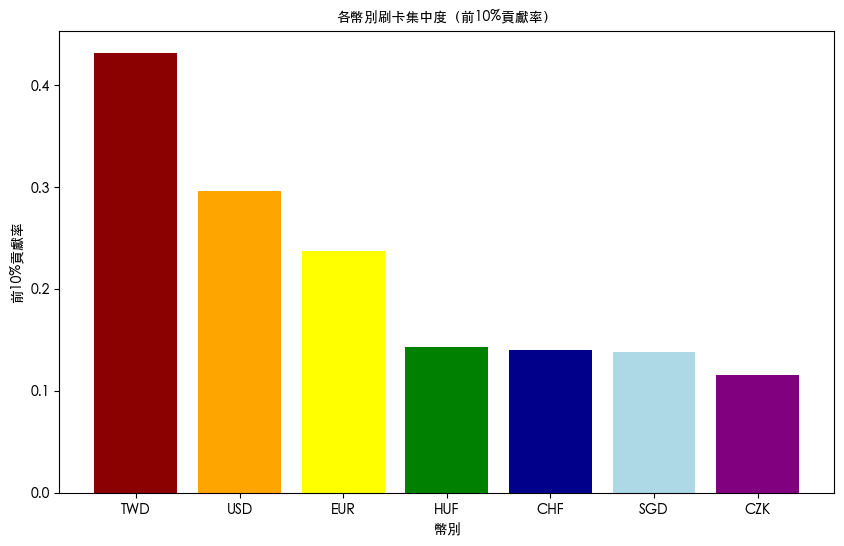

In [306]:
#final_datav3_curr.groupby("Âπ£Âà•")["Âà∑Âç°Á≠ÜÊï∏"].apply(lambda x: x.sort_values(ascending=False).head(int(0.1*len(x))).sum() / x.sum())


# ÂÆöÁæ©ÂáΩÂºèÔºöË®àÁÆóÈõÜ‰∏≠Â∫¶
def Âà∑Âç°ÈõÜ‰∏≠Â∫¶(df, Áæ§ÁµÑÊ¨Ñ="Âπ£Âà•", Êï∏ÂÄºÊ¨Ñ="Âà∑Âç°Á≠ÜÊï∏", ÂâçÊØî‰æã=0.1):
    ÁµêÊûú = []
    
    for ÂêçÁ®±, Â≠êÈõÜ in df.groupby(Áæ§ÁµÑÊ¨Ñ):
        Á∏ΩÊï∏ = Â≠êÈõÜ[Êï∏ÂÄºÊ¨Ñ].sum()
        Âπ≥Âùá = Â≠êÈõÜ[Êï∏ÂÄºÊ¨Ñ].mean()
        ‰∏≠‰ΩçÊï∏ = Â≠êÈõÜ[Êï∏ÂÄºÊ¨Ñ].median()
        
        # ÂâçÊØî‰æãÔºà‰æãÂ¶ÇÂâç10%ÔºâÂÆ¢Êà∂ÁöÑË≤¢ÁçªÁéá
        n_top = max(1, int(len(Â≠êÈõÜ) * ÂâçÊØî‰æã))
        ÂâçÂπæÂêçÁ∏ΩÂíå = Â≠êÈõÜ[Êï∏ÂÄºÊ¨Ñ].sort_values(ascending=False).head(n_top).sum()
        ÂâçÂπæÂêçÊØî‰æã = ÂâçÂπæÂêçÁ∏ΩÂíå / Á∏ΩÊï∏ if Á∏ΩÊï∏ > 0 else 0
        
        ÁµêÊûú.append({
            Áæ§ÁµÑÊ¨Ñ: ÂêçÁ®±,
            "‰∫§ÊòìÁ∏ΩÊï∏": Á∏ΩÊï∏,
            "Âπ≥Âùá": Âπ≥Âùá,
            "‰∏≠‰ΩçÊï∏": ‰∏≠‰ΩçÊï∏,
            "Âπ≥Âùá/‰∏≠‰ΩçÊï∏ÊØî": Âπ≥Âùá / ‰∏≠‰ΩçÊï∏ if ‰∏≠‰ΩçÊï∏ > 0 else None,
            f"Ââç{int(ÂâçÊØî‰æã*100)}%Ë≤¢ÁçªÁéá": ÂâçÂπæÂêçÊØî‰æã
        })
    
    return pd.DataFrame(ÁµêÊûú).sort_values(by="Ââç10%Ë≤¢ÁçªÁéá", ascending=False)


# === ‰ΩøÁî®ÁØÑ‰æã ===
summary = Âà∑Âç°ÈõÜ‰∏≠Â∫¶(final_datav3_curr, Áæ§ÁµÑÊ¨Ñ="Âπ£Âà•", Êï∏ÂÄºÊ¨Ñ="Âà∑Âç°Á≠ÜÊï∏", ÂâçÊØî‰æã=0.1)
print(summary)

# Áï´ÂúñÔºöÂâç10%Ë≤¢ÁçªÁéá
plt.figure(figsize=(10,6))
plt.bar(summary["Âπ£Âà•"], summary["Ââç10%Ë≤¢ÁçªÁéá"], 
        color=["darkred",'orange','yellow', 'green','darkblue','lightblue','purple'])
plt.ylabel("Ââç10%Ë≤¢ÁçªÁéá", fontproperties="Heiti TC")
plt.xlabel("Âπ£Âà•", fontproperties="Heiti TC")
plt.title("ÂêÑÂπ£Âà•Âà∑Âç°ÈõÜ‰∏≠Â∫¶ÔºàÂâç10%Ë≤¢ÁçªÁéáÔºâ", fontproperties="Heiti TC")
#plt.xticks(rotation=45, fontproperties="Heiti TC")
plt.yticks(fontproperties="Heiti TC")
plt.savefig("Âπ£Âà•Ë≤¢ÁçªÂ∫¶ËàáÈõÜ‰∏≠Â∫¶Èóú‰øÇ.png",bbox_inches = 'tight')
plt.show()


# <font color ='red'>**ÂèÉ„ÄÅÈ°ûÂà•ËÆäÊï∏Èóú‰øÇ**</font>

### <font color ='skyblue'>**ÂèÉ-1„ÄÅÈ°ûÂà•ËÆäÊï∏Èóú‰øÇ**</font>

In [133]:
print(final_datav3.shape)
final_datav3.info()

(117579, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117579 entries, 0 to 117578
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Ê∂àË≤ªË™™Êòé_WBBL           117577 non-null  object        
 1   Ê∂àË≤ªÊó•Êúü_WBBL           117579 non-null  datetime64[ns]
 2   ÊòüÊúüÂπæ                 117579 non-null  object        
 3   Ê∂àË≤ªÂ∫èËôü                117579 non-null  object        
 4   Â∏≥ÂñÆÊúà‰ªΩ_WBBL           117579 non-null  object        
 5   ‰ø°Áî®Âç°Ëôü                117579 non-null  object        
 6   ÂÆ¢Êà∂Á∑®Ëôü                117579 non-null  object        
 7   Âπ¥ÈΩ°Áæ§ÁµÑ                117579 non-null  object        
 8   Âπ¥ÈΩ°                  117579 non-null  int64         
 9   Gender              117579 non-null  object        
 10  ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±            117163 non-null  object        
 11  Ë™çÂàóÊ•≠Á∏æÂàÜË°åÂêçÁ®±            117579 non-n

In [218]:
'''
ÊéíÈô§Èõ¢Áæ§ÂÄº
'''
q_low = final_datav3['Âà∑Âç°Á≠ÜÊï∏'].quantile(q = 0.1)
q_high =final_datav3['Âà∑Âç°Á≠ÜÊï∏'].quantile(q = 0.9)
final_datav3_outlier = final_datav3[(final_datav3['Âà∑Âç°Á≠ÜÊï∏']>= q_low) & (final_datav3['Âà∑Âç°Á≠ÜÊï∏']<= q_high)]


In [305]:

def card_concentration(df, group_col="Âπ£Âà•", value_col="Âà∑Âç°Á≠ÜÊï∏", top_pct=0.1):
    results = []
    
    for name, group in df.groupby(group_col):
        total = group[value_col].sum()
        mean_val = group[value_col].mean()
        median_val = group[value_col].median()
        
        # Ââç top_pct ÊØî‰æãÂÆ¢Êà∂ÁöÑË≤¢ÁçªÁéá
        n_top = max(1, int(len(group) * top_pct))
        top_sum = group[value_col].sort_values(ascending=False).head(n_top).sum()
        top_ratio = top_sum / total if total > 0 else 0
        
        results.append({
            group_col: name,
            "‰∫§ÊòìÁ∏ΩÊï∏": total,
            "Âπ≥Âùá": mean_val,
            "‰∏≠‰ΩçÊï∏": median_val,
            "Âπ≥Âùá/‰∏≠‰ΩçÊï∏ÊØî": mean_val / median_val if median_val > 0 else None,
            f"Ââç{int(top_pct*100)}%Ë≤¢ÁçªÁéá": top_ratio
        })
    
    return pd.DataFrame(results).sort_values(by="‰∫§ÊòìÁ∏ΩÊï∏", ascending=False)

# ‰ΩøÁî®ÊñπÂºè
summary = card_concentration(final_datav3_curr, group_col="Âπ£Âà•", value_col="Âà∑Âç°Á≠ÜÊï∏", top_pct=0.1)
#summary.to_excel('Âà∑Âç°ÈõÜ‰∏≠Â∫¶.xlsx')
summary

Âπ£Âà•    ‰∫§ÊòìÁ∏ΩÊï∏         Âπ≥Âùá   ‰∏≠‰ΩçÊï∏   Âπ≥Âùá/‰∏≠‰ΩçÊï∏ÊØî   Ââç10%Ë≤¢ÁçªÁéá
5  TWD  123299  12.460738   6.0  2.076790  0.432193
6  USD   17821  13.349064  14.0  0.953505  0.296560
2  EUR    4036  26.906667  14.0  1.921905  0.237859
1  CZK     689  24.607143  25.0  0.984286  0.116110
4  SGD     203   7.518519  11.0  0.683502  0.137931
3  HUF      98  14.000000  14.0  1.000000  0.142857
0  CHF      93   8.454545  11.0  0.768595  0.139785

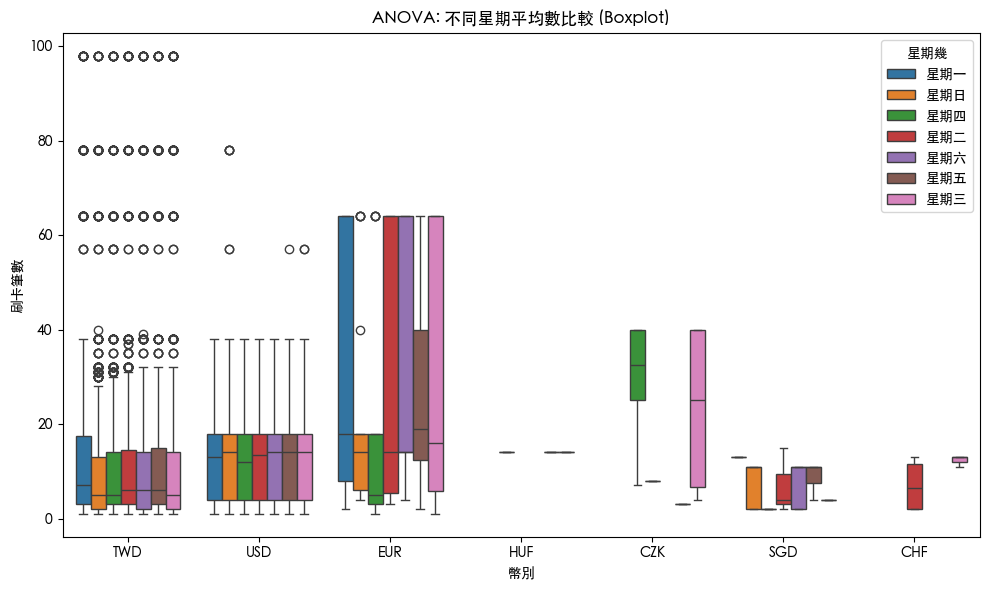

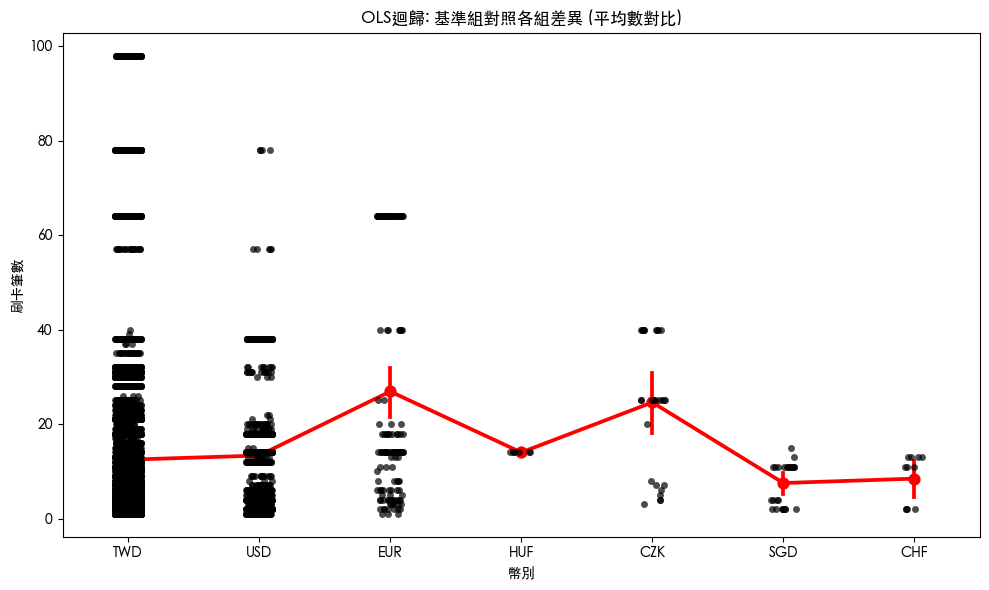

In [336]:
#plt.rcParams['font.family'] = 'Heiti TC'
# Áï´ Boxplot ‰æÜÂ∞çÊáâ ANOVA
currency = ['TWD','CZK','HUF','USD','EUR','CHF','SGD']
final_datav3_curr = final_datav3[final_datav3['Âπ£Âà•'].isin(currency)]
plt.figure(figsize=(10,6))
sns.boxplot(x= 'Âπ£Âà•', y="Âà∑Âç°Á≠ÜÊï∏", data = final_datav3_curr, hue = 'ÊòüÊúüÂπæ')
 
plt.title("ANOVA: ‰∏çÂêåÊòüÊúüÂπ≥ÂùáÊï∏ÊØîËºÉ (Boxplot)")
plt.xlabel("Âπ£Âà•")
#plt.xticks(rotation = 45)
plt.ylabel("Âà∑Âç°Á≠ÜÊï∏")
plt.tight_layout()
plt.savefig("‰∫§ÊòìÁ≠ÜÊï∏_currency.png",bbox_inches = 'tight')
plt.show()
# Áï´ Âπ≥ÂùáÊï∏ + ÈªûÂúñ ‰æÜÂ∞çÊáâ Ëø¥Ê≠∏
plt.figure(figsize=(10,6))
sns.pointplot(x = 'Âπ£Âà•', y = "Âà∑Âç°Á≠ÜÊï∏",data = final_datav3_curr, errorbar = ('ci', 99), color = "red")
sns.stripplot(x = 'Âπ£Âà•', y = "Âà∑Âç°Á≠ÜÊï∏", data = final_datav3_curr, color="black", alpha=0.7, jitter=True)
plt.title("OLSËø¥Ê≠∏: Âü∫Ê∫ñÁµÑÂ∞çÁÖßÂêÑÁµÑÂ∑ÆÁï∞ (Âπ≥ÂùáÊï∏Â∞çÊØî)")
plt.xlabel("Âπ£Âà•")


plt.ylabel("Âà∑Âç°Á≠ÜÊï∏")
plt.tight_layout()
#plt.savefig("/mnt/data/regression_means.png")
plt.show()

### <font color ='skyblue'>**ÂèÉ-2„ÄÅÈÄ£Á∫åËÆäÊï∏Èóú‰øÇ**</font>

In [849]:
corr_seqdata = final_datav3_2.loc[:,~final_datav3_2.columns.str.contains('ÂÆ¢Êà∂Êï∏|Âç°ÁâáÂºµÊï∏|Â§ñÂπ£Ê∂àË≤ªÈáëÈ°ç|Âà∑Âç°Á≠ÜÊï∏|Âç°ÁâáÁãÄÊÖã|‰ø°Áî®Âç°Ëôü|Ê∂àË≤ªÂ∫èËôü')].\
    corr(method='spearman',numeric_only = True)

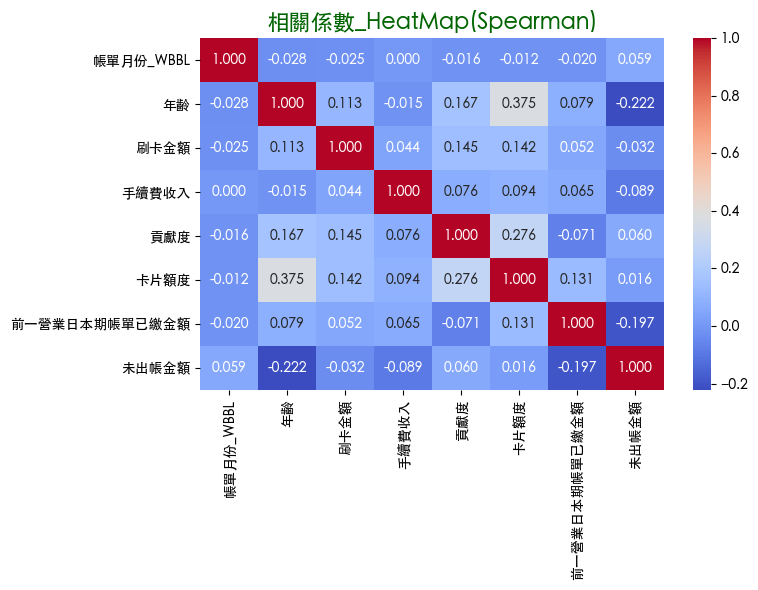

In [854]:
# ÁÜ±ÂäõÂúñ

plt.figure(figsize=(8,6))
sns.heatmap(data = corr_seqdata, annot = True, fmt = ".3f", cmap = "coolwarm")
plt.title("Áõ∏Èóú‰øÇÊï∏_HeatMap(Spearman)",fontdict = {'fontsize':'16', 'fontweight':'bold','color':'darkgreen'})
plt.xticks(rotation = 90)
plt.tight_layout()
#plt.savefig('Áõ∏Èóú‰øÇÊï∏_HeatMap(Spearman_nocreditcnt).png',bbox_inches='tight')
plt.show()

# <font color ='red'>**ËÇÜ„ÄÅÁâπÂæµÂ∑•Á®ãdummy„ÄÅÊ®ôÊ∫ñÂåñ„ÄÅËÆäÊï∏ÊåëÈÅ∏**</font>

### <font>**ËÇÜ-1„ÄÅÂç°ÊñπÊ™¢ÂÆö(Cramer's V)ÂíåANOVAÂñÆÂõ†Â≠êÊ™¢ÂÆö**</font>

In [335]:
table = pd.crosstab(final_datav3['ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±'], final_datav3['Âπ¥ÈΩ°Áæ§ÁµÑ'])
chi2, p, dof, expected = chi2_contingency(table)

#table.dtypes
#print(table)
print(f"Âç°ÊñπÂÄº: {chi2:.3f}")
print(f"p-value: {p:.20f}")
print(f'Ëá™Áî±Â∫¶:{dof}')
#print(f'ÁêÜË´ñÊúüÊúõÂá∫ÁèæÊ¨°Êï∏:{expected}')

Âç°ÊñπÂÄº: 75563.019
p-value: 0.00000000000000000000
Ëá™Áî±Â∫¶:280


In [330]:

def CramerV(df, x, y):
    confusion_matrix = pd.crosstab(df[x],df[y])
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

#Âª∫Á´ãÁ©∫Áü©Èô£
df = pd.DataFrame(
    np.zeros((len(binary_cols), len(binary_cols))),
    columns = binary_cols,
    index = binary_cols
)
    
for x in binary_cols:
    for y in binary_cols:
        value = CramerV(final_datav3,x,y)
        df.loc[x, y] = value
df

ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±  Ë™çÂàóÊ•≠Á∏æÂàÜË°åÂêçÁ®±  Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±        Âπ£Âà•      Âπ¥ÈΩ°Áæ§ÁµÑ     ‰ø°Áî®Âç°È°ûÂà•  \
ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±  1.000000  0.703796  0.172741  0.218913  0.283932  0.286598   
Ë™çÂàóÊ•≠Á∏æÂàÜË°åÂêçÁ®±  0.703796  1.000000  0.169813  0.218514  0.288230  0.277283   
Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±  0.172741  0.169813  1.000000  0.229919  0.148513  0.108680   
Âπ£Âà•        0.218913  0.218514  0.229919  1.000000  0.255749  0.156979   
Âπ¥ÈΩ°Áæ§ÁµÑ      0.283932  0.288230  0.148513  0.255749  1.000000  0.184290   
‰ø°Áî®Âç°È°ûÂà•     0.286598  0.277283  0.108680  0.156979  0.184290  1.000000   
ÂÄã‰∫∫Ë©ïÁ≠â      0.224217  0.207134  0.054924  0.102789  0.133525  0.186613   
ÂÆ¢Êà∂È¢®Èö™Á≠âÁ¥ö    0.330596  0.323538  0.127490  0.202380  0.220845  0.435799   
‰ø°Áî®Âç°Á≠âÁ¥ö     0.266822  0.280330  0.141602  0.152935  0.217717  0.909799   
ÂúãÂÖßÂ§ñÁµêÂ∏≥Âú∞Èªû   0.161357  0.188077  0.041238  0.998841  0.274468  0.057022   
ÈñãÂç°ÁãÄÊÖã      0.189514  0.204679  0.016948  0.039104  0.055470  0.043640   
Gender    0.352809  0.306778  0.154082  0.283369  0.072251  0.092754   
ÊòüÊúüÂπæ       0.031448  0.033890  0.019753  0.073720  0.018798  0.017298   

              ÂÄã‰∫∫Ë©ïÁ≠â    ÂÆ¢Êà∂È¢®Èö™Á≠âÁ¥ö     ‰ø°Áî®Âç°Á≠âÁ¥ö   ÂúãÂÖßÂ§ñÁµêÂ∏≥Âú∞Èªû      ÈñãÂç°ÁãÄÊÖã    Gender       ÊòüÊúüÂπæ  
ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±  0.224217  0.330596  0.266822  0.161357  0.189514  0.352809  0.031448  
Ë™çÂàóÊ•≠Á∏æÂàÜË°åÂêçÁ®±  0.207134  0.323538  0.280330  0.188077  0.204679  0.306778  0.033890  
Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±  0.054924  0.127490  0.141602  0.041238  0.016948  0.154082  0.019753  
Âπ£Âà•        0.102789  0.202380  0.152935  0.998841  0.039104  0.283369  0.073720  
Âπ¥ÈΩ°Áæ§ÁµÑ      0.133525  0.220845  0.217717  0.274468  0.055470  0.072251  0.018798  
‰ø°Áî®Âç°È°ûÂà•     0.186613  0.435799  0.909799  0.057022  0.043640  0.092754  0.017298  
ÂÄã‰∫∫Ë©ïÁ≠â      1.000000  0.280729  0.169683  0.029945  0.020743  0.103112  0.015622  
ÂÆ¢Êà∂È¢®Èö™Á≠âÁ¥ö    0.280729  1.000000  0.276318  0.038557  0.043172  0.141617  0.014902  
‰ø°Áî®Âç°Á≠âÁ¥ö     0.169683  0.276318  1.000000  0.020841  0.039695  0.019268  0.018115  
ÂúãÂÖßÂ§ñÁµêÂ∏≥Âú∞Èªû   0.029945  0.038557  0.020841  0.999841  0.011523  0.026781  0.010305  
ÈñãÂç°ÁãÄÊÖã      0.020743  0.043172  0.039695  0.011523  1.000000  0.068827  0.010925  
Gender    0.103112  0.141617  0.019268  0.026781  0.068827  0.999982  0.006562  
ÊòüÊúüÂπæ       0.015622  0.014902  0.018115  0.010305  0.010925  0.006562  1.000000

In [331]:
from typing import Literal
# Ë®àÁÆóÂñÆ‰∏ÄÂ∞çÊ¨Ñ‰ΩçÁöÑ Cram√©r's V
def cramers_v(df: pd.DataFrame, col1: str, col2: str) -> float:
    confusion_matrix = pd.crosstab(df[col1], df[col2])
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.to_numpy().sum()
    r, k = confusion_matrix.shape
    phi2 = chi2 / n
    return np.sqrt(phi2 / min(r - 1, k - 1))

# Âà§Êñ∑Âº∑Â∫¶ (‰æùËá™Áî±Â∫¶ df_degree + Êï∏ÂÄº v)
def judgment_cramerv(
    df_degree: int, 
    v: float
) -> Literal['Negligible','Small','Medium','Large']:
    if df_degree == 1:
        if v < 0.1: return 'Negligible'
        elif v < 0.3: return 'Small'
        elif v < 0.5: return 'Medium'
        else: return 'Large'
    elif df_degree == 2:
        if v < 0.07: return 'Negligible'
        elif v < 0.21: return 'Small'
        elif v < 0.35: return 'Medium'
        else: return 'Large'
    elif df_degree == 3:
        if v < 0.06: return 'Negligible'
        elif v < 0.17: return 'Small'
        elif v < 0.29: return 'Medium'
        else: return 'Large'
    elif df_degree == 4:
        if v < 0.05: return 'Negligible'
        elif v < 0.15: return 'Small'
        elif v < 0.25: return 'Medium'
        else: return 'Large'
    else:
        if v < 0.05: return 'Negligible'
        elif v < 0.13: return 'Small'
        elif v < 0.22: return 'Medium'
        else: return 'Large'

# Âª∫Á´ãÂàÜÈ°ûÁü©Èô£
def cramers_v_matrix(df: pd.DataFrame, cols: list[str]) -> pd.DataFrame:
    res = pd.DataFrame(index=cols, columns=cols, dtype=object)
    for c1 in cols:
        for c2 in cols:
            if c1 == c2:   # Â∞çËßíÁ∑ö ‚Üí ‰∏çË®àÁÆó
                res.loc[c1, c2] = np.nan
            else:
                v = cramers_v(df, c1, c2)
                r, k = pd.crosstab(df[c1], df[c2]).shape
                df_degree = min(r - 1, k - 1)
                res.loc[c1, c2] = judgment_cramerv(df_degree, v)
    return res
binary_cols = ['ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±', 'Ë™çÂàóÊ•≠Á∏æÂàÜË°åÂêçÁ®±', 'Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±', 'Âπ£Âà•', 'Âπ¥ÈΩ°Áæ§ÁµÑ','‰ø°Áî®Âç°È°ûÂà•','ÂÄã‰∫∫Ë©ïÁ≠â','ÂÆ¢Êà∂È¢®Èö™Á≠âÁ¥ö','‰ø°Áî®Âç°Á≠âÁ¥ö','ÂúãÂÖßÂ§ñÁµêÂ∏≥Âú∞Èªû'
              ,'ÈñãÂç°ÁãÄÊÖã','Gender','ÊòüÊúüÂπæ']
result = cramers_v_matrix(final_datav3, binary_cols)
#result.to_excel('È°ØËëóÈ°ûÂà•ËÆäÊï∏Èóú‰øÇ.xlsx')
result

ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±    Ë™çÂàóÊ•≠Á∏æÂàÜË°åÂêçÁ®±    Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±          Âπ£Âà•        Âπ¥ÈΩ°Áæ§ÁµÑ  \
ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±         NaN       Large      Medium      Medium       Large   
Ë™çÂàóÊ•≠Á∏æÂàÜË°åÂêçÁ®±       Large         NaN      Medium      Medium       Large   
Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±      Medium      Medium         NaN       Large      Medium   
Âπ£Âà•            Medium      Medium       Large         NaN       Large   
Âπ¥ÈΩ°Áæ§ÁµÑ           Large       Large      Medium       Large         NaN   
‰ø°Áî®Âç°È°ûÂà•          Large       Large       Small      Medium      Medium   
ÂÄã‰∫∫Ë©ïÁ≠â           Large      Medium       Small       Small      Medium   
ÂÆ¢Êà∂È¢®Èö™Á≠âÁ¥ö        Medium      Medium       Small       Small      Medium   
‰ø°Áî®Âç°Á≠âÁ¥ö         Medium      Medium       Small       Small      Medium   
ÂúãÂÖßÂ§ñÁµêÂ∏≥Âú∞Èªû        Small       Small  Negligible       Large       Small   
ÈñãÂç°ÁãÄÊÖã           Small       Small  Negligible  Negligible  Negligible   
Gender        Medium      Medium       Small       Small  Negligible   
ÊòüÊúüÂπæ       Negligible  Negligible  Negligible       Small  Negligible   

               ‰ø°Áî®Âç°È°ûÂà•        ÂÄã‰∫∫Ë©ïÁ≠â      ÂÆ¢Êà∂È¢®Èö™Á≠âÁ¥ö       ‰ø°Áî®Âç°Á≠âÁ¥ö     ÂúãÂÖßÂ§ñÁµêÂ∏≥Âú∞Èªû  \
ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±       Large       Large      Medium      Medium       Small   
Ë™çÂàóÊ•≠Á∏æÂàÜË°åÂêçÁ®±       Large      Medium      Medium      Medium       Small   
Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±       Small       Small       Small       Small  Negligible   
Âπ£Âà•            Medium       Small       Small       Small       Large   
Âπ¥ÈΩ°Áæ§ÁµÑ          Medium      Medium      Medium      Medium       Small   
‰ø°Áî®Âç°È°ûÂà•            NaN      Medium       Large       Large  Negligible   
ÂÄã‰∫∫Ë©ïÁ≠â          Medium         NaN      Medium       Small  Negligible   
ÂÆ¢Êà∂È¢®Èö™Á≠âÁ¥ö         Large      Medium         NaN      Medium  Negligible   
‰ø°Áî®Âç°Á≠âÁ¥ö          Large       Small      Medium         NaN  Negligible   
ÂúãÂÖßÂ§ñÁµêÂ∏≥Âú∞Èªû   Negligible  Negligible  Negligible  Negligible         NaN   
ÈñãÂç°ÁãÄÊÖã      Negligible  Negligible  Negligible  Negligible  Negligible   
Gender    Negligible       Small       Small  Negligible  Negligible   
ÊòüÊúüÂπæ       Negligible  Negligible  Negligible  Negligible  Negligible   

                ÈñãÂç°ÁãÄÊÖã      Gender         ÊòüÊúüÂπæ  
ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±       Small      Medium  Negligible  
Ë™çÂàóÊ•≠Á∏æÂàÜË°åÂêçÁ®±       Small      Medium  Negligible  
Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±  Negligible       Small  Negligible  
Âπ£Âà•        Negligible       Small       Small  
Âπ¥ÈΩ°Áæ§ÁµÑ      Negligible  Negligible  Negligible  
‰ø°Áî®Âç°È°ûÂà•     Negligible  Negligible  Negligible  
ÂÄã‰∫∫Ë©ïÁ≠â      Negligible       Small  Negligible  
ÂÆ¢Êà∂È¢®Èö™Á≠âÁ¥ö    Negligible       Small  Negligible  
‰ø°Áî®Âç°Á≠âÁ¥ö     Negligible  Negligible  Negligible  
ÂúãÂÖßÂ§ñÁµêÂ∏≥Âú∞Èªû   Negligible  Negligible  Negligible  
ÈñãÂç°ÁãÄÊÖã             NaN  Negligible  Negligible  
Gender    Negligible         NaN  Negligible  
ÊòüÊúüÂπæ       Negligible  Negligible         NaN

In [141]:
def judgment_etaSq(etaSq):
    if etaSq < .01:
        qual = 'Negligible'
    elif etaSq < .06:
        qual = 'Small'
    elif etaSq < .14:
        qual = 'Medium'
    else:
        qual = 'Large'
    return(qual)
judgment_etaSq(etaSq)

'Negligible'

In [329]:
# ‰ΩøÁî® pingouin Â•ó‰ª∂ ANOVAÂñÆÂõ†Â≠êÂàÜÊûê (Áî¢Âá∫)
cat_cols = ['ÊòüÊúüÂπæ','ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±','ÂúãÂÖßÂ§ñÁµêÂ∏≥Âú∞Èªû','Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±','Ë™çÂàóÊ•≠Á∏æÂàÜË°åÂêçÁ®±','Gender','Âπ¥ÈΩ°Áæ§ÁµÑ','ÈñãÂç°ÁãÄÊÖã','‰ø°Áî®Âç°Á≠âÁ¥ö','‰ø°Áî®Âç°È°ûÂà•','ÂÄã‰∫∫Ë©ïÁ≠â','ÂÆ¢Êà∂È¢®Èö™Á≠âÁ¥ö','Âπ£Âà•']
results = []
for i in cat_cols:
    aov = pg.anova(data = final_datav3, dv = 'Âà∑Âç°Á≠ÜÊï∏', between = i, detailed=True)
    row = aov.loc[0,['Source','SS','DF','MS','F','p-unc','np2']]
    results.append(row)

aov_sort = pd.DataFrame(results)
                     
ÂñÆÂõ†Â≠êÈ°ØËëóËÆäÊï∏_ANOVA = aov_sort.sort_values(by = 'np2', ascending = False).reset_index(drop = True)
ÂñÆÂõ†Â≠êÈ°ØËëóËÆäÊï∏_ANOVA.to_excel('ÂñÆÂõ†Â≠êÈ°ØËëóËÆäÊï∏_ANOVA.xlsx')
ÂñÆÂõ†Â≠êÈ°ØËëóËÆäÊï∏_ANOVA

Source            SS  DF             MS            F          p-unc  \
0   ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±  1.143611e+07  35  326745.943879  1583.688215   0.000000e+00   
1   Ë™çÂàóÊ•≠Á∏æÂàÜË°åÂêçÁ®±  1.004140e+07  34  295335.395108  1357.925817   0.000000e+00   
2   Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±  3.077886e+06  20  153894.294268   556.179600   0.000000e+00   
3         Âπ£Âà•  2.423580e+05  28    8655.643765    30.978871  5.768592e-159   
4       Âπ¥ÈΩ°Áæ§ÁµÑ  1.498802e+06   8  187350.303167   645.809085   0.000000e+00   
5      ‰ø°Áî®Âç°È°ûÂà•  5.378688e+05   6   89644.805583   300.549287   0.000000e+00   
6       ÂÄã‰∫∫Ë©ïÁ≠â  2.087346e+05   5   41746.912451   138.663304  3.755481e-147   
7     ÂÆ¢Êà∂È¢®Èö™Á≠âÁ¥ö  1.945614e+05   2   97280.715692   322.998989  1.280197e-140   
8      ‰ø°Áî®Âç°Á≠âÁ¥ö  1.556616e+05   2   77830.816793   258.014739  1.552315e-112   
9    ÂúãÂÖßÂ§ñÁµêÂ∏≥Âú∞Èªû  4.130694e+04   1   41306.936270   136.560656   1.566182e-31   
10      ÈñãÂç°ÁãÄÊÖã  3.789196e+04   2   18945.977797    62.628821   6.533206e-28   
11    Gender  6.913406e+03   1    6913.406493    22.833628   1.768605e-06   
12       ÊòüÊúüÂπæ  6.572815e+03   6    1095.469170     3.617932   1.368727e-03   

         np2  
0   0.321224  
1   0.282014  
2   0.086443  
3   0.062062  
4   0.042094  
5   0.015106  
6   0.005862  
7   0.005464  
8   0.004373  
9   0.001160  
10  0.001064  
11  0.000194  
12  0.000185

###    „ÄÇ‰ª• ANOVAËÆäÁï∞Êï∏ ‰æÜËßÄÂØü **```ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±```,```Ë™çÂàóÊ•≠Á∏æÂàÜË°åÂêçÁ®±```,```Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±```**ÔºåËß£ÈáãÂäõËºÉ‰Ω≥ (>0.14)
###    <font color = skyblue>„ÄÇSSÁÇ∫‰∏çÂêåÁµÑÂπ≥ÂùáÊï∏Â∑ÆÁï∞ÈÄ†ÊàêÁöÑËÆäÁï∞„ÄÅFË∂äÂ§ßÁµÑÈñìÂ∑ÆÁï∞Ë∂äÂèØËÉΩÈ°ØËëó„ÄÅnp2(effect size)Ë∂äÊé•Ëøë 1 ‚Üí ËÆäÊï∏Ëß£ÈáãÂäõË∂äÂ§ß„ÄÇ

In [262]:
final_datav3.groupby(['Âπ£Âà•']).agg({'Âà∑Âç°Á≠ÜÊï∏':'median','Âà∑Âç°ÈáëÈ°ç':'median'}).sort_values(['Âà∑Âç°Á≠ÜÊï∏','Âà∑Âç°ÈáëÈ°ç'], ascending = [False,False]).reset_index()
#final_datav3.describe() # Âà∑Âç°Á≠ÜÊï∏(median = 5 ,mean =11)„ÄÅÂà∑Âç°ÈáëÈ°ç(median = 500 ,mean =1830)
#CZK(25.0,830.5),HUF,(14.0,1227.0),USD(14,976),EUR(14.0,548.5),CHF(11.0,3812.0),SGD(11.0,641.0)

Âπ£Âà•  Âà∑Âç°Á≠ÜÊï∏     Âà∑Âç°ÈáëÈ°ç
0   CZK  25.0    830.5
1   CNY  16.0    104.0
2   HUF  14.0   1227.0
3   USD  14.0    976.0
4   EUR  14.0    548.5
5   CHF  11.0   3812.0
6   SGD  11.0    641.0
7   CAD  10.0    238.0
8   GTQ   9.0   2615.0
9   JPY   7.0    913.0
10  IDR   7.0    782.0
11  MYR   7.0    309.0
12  VND   6.0   1271.0
13  HKD   6.0    926.0
14  THB   6.0    633.0
15  PLN   6.0    373.5
16  QAR   6.0    361.0
17  TWD   6.0    300.0
18  MOP   5.0  11307.0
19  EGP   5.0   2012.0
20  AUD   4.0   1468.0
21  KRW   4.0    960.5
22  PHP   3.0   2851.0
23  NZD   3.0   2402.0
24  LKR   3.0    417.0
25  GBP   3.0    415.0
26  ISK   2.0    601.5
27  INR   2.0    387.5
28  TRY   2.0    110.0

### <font color ='skyblue'>**ÂèçÊáâËÆäÊï∏ÁÇ∫È°ûÂà•ËàáÈ°ûÂà•ËÆäÊï∏Èóú‰øÇ(ÂÉÖÊ∏¨Ë©¶category)**</font>

In [308]:
table = pd.crosstab(final_datav3['Âà∑Âç°Á≠ÜÊï∏'], final_datav3['Ê∂àË≤ª'])
chi2, p, dof, expected = chi2_contingency(table)

#table.dtypes
#print(table)
print(f"Âç°ÊñπÂÄº: {chi2:.3f}")
print(f"p-value: {p:.20f}")
print(f'Ëá™Áî±Â∫¶:{dof}')
#print(f'ÁêÜË´ñÊúüÊúõÂá∫ÁèæÊ¨°Êï∏:{expected}')

Âç°ÊñπÂÄº: 993.117
p-value: 0.00000000000000000000
Ëá™Áî±Â∫¶:264


In [127]:
import statsmodels.api as sm

In [372]:
for i, col in enumerate(X.columns):
    print(f'{i}:{col}')

0:const
1:ÊòüÊúüÂπæ_ÊòüÊúü‰∏â
2:ÊòüÊúüÂπæ_ÊòüÊúü‰∫å
3:ÊòüÊúüÂπæ_ÊòüÊúü‰∫î
4:ÊòüÊúüÂπæ_ÊòüÊúüÂÖ≠
5:ÊòüÊúüÂπæ_ÊòüÊúüÂõõ
6:ÊòüÊúüÂπæ_ÊòüÊúüÊó•
7:ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_‰∏âÊ∞ëÂàÜË°å
8:ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_‰∏≠ÂíåÂàÜË°å
9:ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_‰∏≠Â£¢ÂàÜË°å
10:ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_‰πùÂ¶ÇÂàÜË°å
11:ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÂâçÈáëÂàÜË°å
12:ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÂåóÈ´òÈõÑÂàÜË°å
13:ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÂçóÈ´òÈõÑÂàÜË°å
14:ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÂçöÊÑõÂàÜË°å
15:ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âè∞‰∏≠ÂàÜË°å
16:ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âè∞ÂåóÂàÜË°å
17:ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âè∞ÂçóÂàÜË°å
18:ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âè≥ÊòåÂàÜË°å
19:ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â§ßÁôºÂàÜË°å
20:ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â§ßÁõ¥ÂàÜË°å
21:ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â§ßÈáåÂàÜË°å
22:ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â∞èÊ∏ØÂàÜË°å
23:ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â±èÊù±ÂàÜË°å
24:ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â≤°Â±±Êú¨Ê¥≤ÂàÜË°å
25:ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â∑¶ÁáüÂàÜË°å
26:ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â∏ÇÂ∫úÂàÜË°å
27:ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âª∫

In [375]:
print("X dtypes:\n", X.dtypes)
print("y dtype:\n", y.dtype)

X dtypes:
 const      float64
ÊòüÊúüÂπæ_ÊòüÊúü‰∏â       bool
ÊòüÊúüÂπæ_ÊòüÊúü‰∫å       bool
ÊòüÊúüÂπæ_ÊòüÊúü‰∫î       bool
ÊòüÊúüÂπæ_ÊòüÊúüÂÖ≠       bool
            ...   
Âπ£Âà•_THB        bool
Âπ£Âà•_TRY        bool
Âπ£Âà•_TWD        bool
Âπ£Âà•_USD        bool
Âπ£Âà•_VND        bool
Length: 151, dtype: object
y dtype:
 int64


In [383]:
X = final_datav3[['ÊòüÊúüÂπæ','ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±','ÂúãÂÖßÂ§ñÁµêÂ∏≥Âú∞Èªû','Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±','Ë™çÂàóÊ•≠Á∏æÂàÜË°åÂêçÁ®±','Gender','Âπ¥ÈΩ°Áæ§ÁµÑ','ÈñãÂç°ÁãÄÊÖã','‰ø°Áî®Âç°Á≠âÁ¥ö','‰ø°Áî®Âç°È°ûÂà•','ÂÄã‰∫∫Ë©ïÁ≠â','ÂÆ¢Êà∂È¢®Èö™Á≠âÁ¥ö','Âπ£Âà•']]
X = pd.get_dummies(X, drop_first=True)   # ÂÖ®ÈÉ®È°ûÂà•ËΩâ dummy
X = X.apply(pd.to_numeric,errors = 'coerce')
y = final_datav3['Âà∑Âç°Á≠ÜÊï∏']
y = pd.to_numeric(y, errors = 'coerce')

df_clean = pd.concat([X, y], axis=1).dropna().astype(float)
X = df_clean.drop(columns=['Âà∑Âç°Á≠ÜÊï∏'])
y = df_clean['Âà∑Âç°Á≠ÜÊï∏']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit(cov_type = 'HC3')
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Âà∑Âç°Á≠ÜÊï∏   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     597.4
Date:                Wed, 03 Sep 2025   Prob (F-statistic):               0.00
Time:                        15:22:54   Log-Likelihood:            -4.6937e+05
No. Observations:              117579   AIC:                         9.390e+05
Df Residuals:                  117428   BIC:                         9.405e+05
Df Model:                         150                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   

In [1229]:
X = final_datav3_2[['ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±','Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±','Âπ¥ÈΩ°Áæ§ÁµÑ','Âπ£Âà•']]
X = pd.get_dummies(X, drop_first=True)   # ÂÖ®ÈÉ®È°ûÂà•ËΩâ dummy
#X = X.apply(pd.to_numeric,errors = 'coerce')
y = final_datav3_2['Âà∑Âç°Á≠ÜÊï∏']
#y = pd.to_numeric(y, errors = 'coerce')

df_clean = pd.concat([X, y], axis=1).dropna().astype(float) # Â∑¶Âè≥Âêà‰ΩµË≥áÊñô
X = df_clean.drop(columns=['Âà∑Âç°Á≠ÜÊï∏'])                      # ÂéªÊéâÂèçÊáâËÆäÊï∏
y = df_clean['Âà∑Âç°Á≠ÜÊï∏']                             

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Âà∑Âç°Á≠ÜÊï∏   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     1034.
Date:                Tue, 09 Sep 2025   Prob (F-statistic):               0.00
Time:                        00:10:37   Log-Likelihood:            -4.7386e+05
No. Observations:              117579   AIC:                         9.479e+05
Df Residuals:                  117506   BIC:                         9.486e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                33.5737  

In [1227]:
import statsmodels.formula.api as smf
#df_clean.rename(columns = {'Âà∑Âç°Á≠ÜÊï∏':'creditcnt','sales_bch':'salesbch','belonged_bch':'belongedbch'},inplace = True)

model_interation = smf.ols('Âà∑Âç°Á≠ÜÊï∏ ~ ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±*Ë™çÂàóÊ•≠Á∏æÂàÜË°åÂêçÁ®± + Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®± + Âπ¥ÈΩ°Áæ§ÁµÑ + Âπ£Âà•', data = final_datav3_2).fit()
print(model_interation.summary())

                            OLS Regression Results                            
Dep. Variable:                   Âà∑Âç°Á≠ÜÊï∏   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     324.6
Date:                Tue, 09 Sep 2025   Prob (F-statistic):               0.00
Time:                        00:09:11   Log-Likelihood:            -4.6271e+05
No. Observations:              117579   AIC:                         9.261e+05
Df Residuals:                  117226   BIC:                         9.295e+05
Df Model:                         352                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [407]:
resid

0         -4.240713
1        -30.859728
2         10.916027
3         -9.510633
4         12.524379
            ...    
117574   -20.881916
117575   -20.881916
117576     3.816393
117577    -6.090266
117578    -6.572017
Length: 117579, dtype: float64

# <font color ='jade'>**Èô∏„ÄÅÈÄ£Á∫åËÆäÊï∏Ê™¢Êü•Â∏∏ÊÖãÊÄß Shapiro-Wilk / KS test**</font>

In [493]:
final_datav3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117579 entries, 0 to 117578
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Ê∂àË≤ªË™™Êòé_WBBL           117577 non-null  object        
 1   Ê∂àË≤ªÊó•Êúü_WBBL           117579 non-null  datetime64[ns]
 2   ÊòüÊúüÂπæ                 117579 non-null  object        
 3   Ê∂àË≤ªÂ∫èËôü                117579 non-null  object        
 4   Â∏≥ÂñÆÊúà‰ªΩ_WBBL           117579 non-null  object        
 5   ‰ø°Áî®Âç°Ëôü                117579 non-null  object        
 6   ÂÆ¢Êà∂Á∑®Ëôü                117579 non-null  object        
 7   Âπ¥ÈΩ°Áæ§ÁµÑ                117579 non-null  object        
 8   Âπ¥ÈΩ°                  117579 non-null  int64         
 9   Gender              117579 non-null  object        
 10  ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±            117163 non-null  object        
 11  Ë™çÂàóÊ•≠Á∏æÂàÜË°åÂêçÁ®±            117579 non-null  object  

In [498]:
#corr_seqdata = final_datav3.loc[:,~final_datav3.columns.str.contains('ÂÆ¢Êà∂Êï∏|Âç°ÁâáÂºµÊï∏|Â§ñÂπ£Ê∂àË≤ªÈáëÈ°ç|Âà∑Âç°Á≠ÜÊï∏')].corr(method='spearman',numeric_only = True)
corr_seqdata.sort_values('Âà∑Âç°ÈáëÈ°ç', ascending = False)
corr_seqdata.to_excel('corr_contdata.xlsx')

In [447]:
y = final_datav3['Âà∑Âç°Á≠ÜÊï∏']
x = final_datav3[col].dropna()
x


0             0
1         17446
2             0
3          3079
4             0
          ...  
117574    13600
117575    13600
117576      785
117577     5774
117578     5774
Name: Êú™Âá∫Â∏≥ÈáëÈ°ç, Length: 117579, dtype: int64

In [481]:
# Â∏∏ÊÖãÊÄßshapiro, Èóú‰øÇ‰øÇÊï∏(spearman, pearson)Ê™¢ÂÆö

from scipy.stats import shapiro, spearmanr, pearsonr

y = final_datav3['Âà∑Âç°Á≠ÜÊï∏']  # ‰æùËÆäÊï∏
cont_cols = ['Âç°ÁâáÈ°çÂ∫¶', 'Âπ¥ÈΩ°', 'Âà∑Âç°ÈáëÈ°ç','ÊâãÁ∫åË≤ªÊî∂ÂÖ•','Ë≤¢ÁçªÂ∫¶','Ââç‰∏ÄÁáüÊ•≠Êó•Êú¨ÊúüÂ∏≥ÂñÆÂ∑≤Áπ≥ÈáëÈ°ç','Êú™Âá∫Â∏≥ÈáëÈ°ç']  # ÈÄ£Á∫åËÆäÊï∏Ê∏ÖÂñÆ

results = []
for col in cont_cols:
    x = final_datav3[col].dropna()
    n = len(x)
    # Â∏∏ÊÖãÊÄßÊ™¢Êü•
    if n > 5000:
        corr, pval = spearmanr(x, y.loc[x.index])
        method = 'Spearman'                          # Â§ßÊ®£Êú¨ ‚Üí Spearman
        
    else:
        stat, p_norm = shapiro(x)
        if p_norm > 0.05:
            corr, pval = pearsonr(x, y.loc[x.index])  # Â∏∏ÊÖã ‚Üí Pearson
            method = "Pearson"
           
        else:
            corr, pval = spearmanr(x, y.loc[x.index])  # ÈùûÂ∏∏ÊÖã ‚Üí Spearman
            method = "Spearman"
    results.append([col, method, corr, pval])

res_finaldatav3 = pd.DataFrame(results, columns=["ËÆäÊï∏", "ÊñπÊ≥ï", "Áõ∏Èóú‰øÇÊï∏", "pÂÄº"])
print(res_finaldatav3)

              ËÆäÊï∏        ÊñπÊ≥ï      Áõ∏Èóú‰øÇÊï∏             pÂÄº
0           Âç°ÁâáÈ°çÂ∫¶  Spearman  0.103568  1.032821e-277
1             Âπ¥ÈΩ°  Spearman -0.023994   1.892247e-16
2           Âà∑Âç°ÈáëÈ°ç  Spearman -0.190112   0.000000e+00
3          ÊâãÁ∫åË≤ªÊî∂ÂÖ•  Spearman  0.032085   3.635366e-28
4            Ë≤¢ÁçªÂ∫¶  Spearman -0.004907   9.247028e-02
5  Ââç‰∏ÄÁáüÊ•≠Êó•Êú¨ÊúüÂ∏≥ÂñÆÂ∑≤Áπ≥ÈáëÈ°ç  Spearman  0.271057   0.000000e+00
6          Êú™Âá∫Â∏≥ÈáëÈ°ç  Spearman  0.212179   0.000000e+00


In [483]:
res_finaldatav3

ËÆäÊï∏        ÊñπÊ≥ï      Áõ∏Èóú‰øÇÊï∏             pÂÄº
0           Âç°ÁâáÈ°çÂ∫¶  Spearman  0.103568  1.032821e-277
1             Âπ¥ÈΩ°  Spearman -0.023994   1.892247e-16
2           Âà∑Âç°ÈáëÈ°ç  Spearman -0.190112   0.000000e+00
3          ÊâãÁ∫åË≤ªÊî∂ÂÖ•  Spearman  0.032085   3.635366e-28
4            Ë≤¢ÁçªÂ∫¶  Spearman -0.004907   9.247028e-02
5  Ââç‰∏ÄÁáüÊ•≠Êó•Êú¨ÊúüÂ∏≥ÂñÆÂ∑≤Áπ≥ÈáëÈ°ç  Spearman  0.271057   0.000000e+00
6          Êú™Âá∫Â∏≥ÈáëÈ°ç  Spearman  0.212179   0.000000e+00

In [488]:
#res_finaldatav3['ÁµïÂ∞çÂÄº'] = res_finaldatav3['Áõ∏Èóú‰øÇÊï∏'].abs()
res_finaldatav3 = res_finaldatav3.sort_values(by = 'ÁµïÂ∞çÂÄº',ascending = False).reset_index(drop = True)
#res_finaldatav3.to_excel('ÈÄ£Á∫åËÆäÊï∏ËàáÂà∑Âç°Á≠ÜÊï∏_SpearmanÁõ∏Èóú‰øÇÊï∏.xlsx')
res_finaldatav3

ËÆäÊï∏        ÊñπÊ≥ï      Áõ∏Èóú‰øÇÊï∏             pÂÄº       ÁµïÂ∞çÂÄº
0  Ââç‰∏ÄÁáüÊ•≠Êó•Êú¨ÊúüÂ∏≥ÂñÆÂ∑≤Áπ≥ÈáëÈ°ç  Spearman  0.271057   0.000000e+00  0.271057
1          Êú™Âá∫Â∏≥ÈáëÈ°ç  Spearman  0.212179   0.000000e+00  0.212179
2           Âà∑Âç°ÈáëÈ°ç  Spearman -0.190112   0.000000e+00  0.190112
3           Âç°ÁâáÈ°çÂ∫¶  Spearman  0.103568  1.032821e-277  0.103568
4          ÊâãÁ∫åË≤ªÊî∂ÂÖ•  Spearman  0.032085   3.635366e-28  0.032085
5             Âπ¥ÈΩ°  Spearman -0.023994   1.892247e-16  0.023994
6            Ë≤¢ÁçªÂ∫¶  Spearman -0.004907   9.247028e-02  0.004907

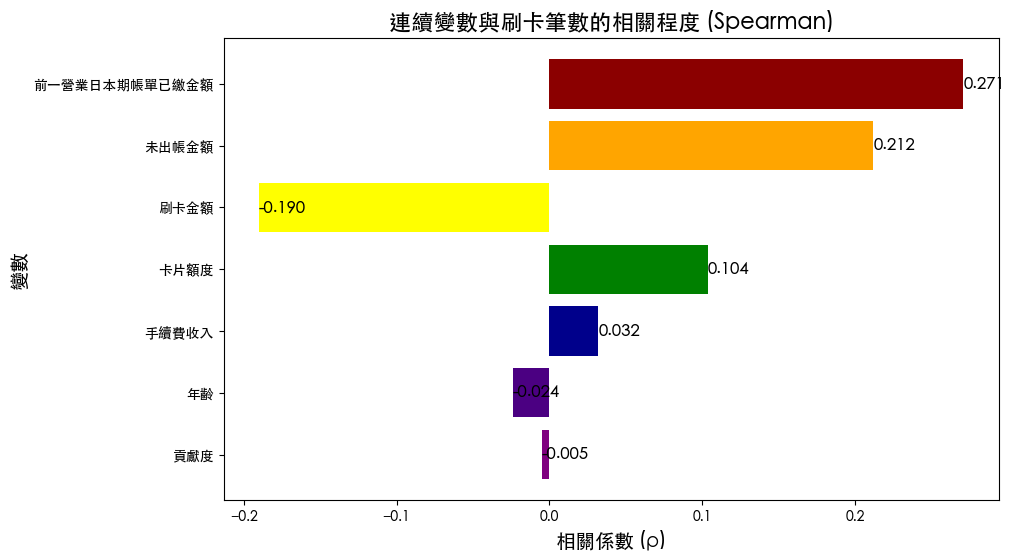

In [489]:
plt.figure(figsize=(10,6))
bars = plt.barh(res_finaldatav3["ËÆäÊï∏"], res_finaldatav3["Áõ∏Èóú‰øÇÊï∏"], color = ['darkred','orange','yellow','green','darkblue','indigo','purple'])

# Âä†‰∏äÊï∏Â≠óÊ®ôË®ª
for bar in bars:
    plt.text(bar.get_width(), 
             bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.3f}",
             va='center', ha='left', fontsize=12)

plt.xlabel("Áõ∏Èóú‰øÇÊï∏ (œÅ)", fontsize=14)
plt.ylabel("ËÆäÊï∏", fontsize=14)
plt.title("ÈÄ£Á∫åËÆäÊï∏ËàáÂà∑Âç°Á≠ÜÊï∏ÁöÑÁõ∏ÈóúÁ®ãÂ∫¶ (Spearman)", fontsize=16, fontweight="bold")
plt.gca().invert_yaxis()  # ËÆìÊúÄÂ§ßÂÄºÊéíÊúÄ‰∏äÈù¢
plt.savefig('ÈÄ£Á∫åËÆäÊï∏ËàáÂà∑Âç°Á≠ÜÊï∏_SpearmanÁõ∏Èóú‰øÇÊï∏.png',bbox_inches= 'tight')
plt.show()


### <font color = 'skyblue'>**ËÇÜ-2„ÄÅÊ®ôÊ∫ñÂåñËôïÁêÜ(ÈáùÂ∞çÈÄ£Á∫åËÆäÊï∏)**</font>

In [509]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
final_datav3[['Ââç‰∏ÄÁáüÊ•≠Êó•Êú¨ÊúüÂ∏≥ÂñÆÂ∑≤Áπ≥ÈáëÈ°ç', 'Êú™Âá∫Â∏≥ÈáëÈ°ç', 'Âà∑Âç°ÈáëÈ°ç','Âç°ÁâáÈ°çÂ∫¶']] = scaler.fit_transform(final_datav3[['Ââç‰∏ÄÁáüÊ•≠Êó•Êú¨ÊúüÂ∏≥ÂñÆÂ∑≤Áπ≥ÈáëÈ°ç', 'Êú™Âá∫Â∏≥ÈáëÈ°ç', 'Âà∑Âç°ÈáëÈ°ç','Âç°ÁâáÈ°çÂ∫¶']])
final_datav3[['Ââç‰∏ÄÁáüÊ•≠Êó•Êú¨ÊúüÂ∏≥ÂñÆÂ∑≤Áπ≥ÈáëÈ°ç', 'Êú™Âá∫Â∏≥ÈáëÈ°ç', 'Âà∑Âç°ÈáëÈ°ç','Âç°ÁâáÈ°çÂ∫¶']] 

Ââç‰∏ÄÁáüÊ•≠Êó•Êú¨ÊúüÂ∏≥ÂñÆÂ∑≤Áπ≥ÈáëÈ°ç     Êú™Âá∫Â∏≥ÈáëÈ°ç      Âà∑Âç°ÈáëÈ°ç      Âç°ÁâáÈ°çÂ∫¶
0           -0.240175 -0.388962 -0.089122  0.630508
1           -0.363943  0.264386  0.235012 -0.586708
2           -0.071860 -0.388962 -0.207154 -0.330452
3            0.497102 -0.273654  0.019531  0.310188
4           -0.071860 -0.388962 -0.230735 -0.330452
...               ...       ...       ...       ...
117574      -0.363943  0.120354 -0.071925 -0.330452
117575      -0.363943  0.120354 -0.219010 -0.330452
117576      -0.205988 -0.359564 -0.107752 -0.650772
117577      -0.363943 -0.172727  1.422763 -0.330452
117578      -0.363943 -0.172727 -0.029975 -0.330452

[117579 rows x 4 columns]

In [1234]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Âà∑Âç°Á≠ÜÊï∏   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     1034.
Date:                Tue, 09 Sep 2025   Prob (F-statistic):               0.00
Time:                        00:12:44   Log-Likelihood:            -4.7386e+05
No. Observations:              117579   AIC:                         9.479e+05
Df Residuals:                  117506   BIC:                         9.486e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                33.5737  

In [1257]:
fitted.max()

64.05403084016709

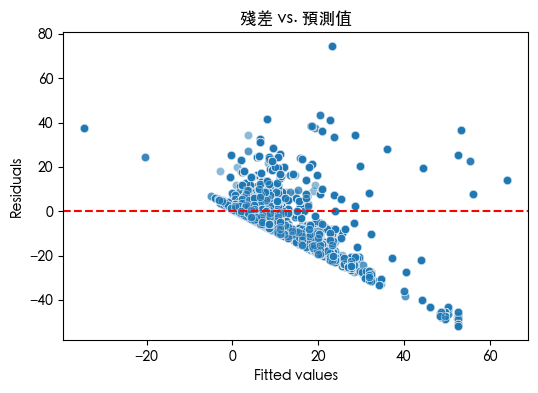

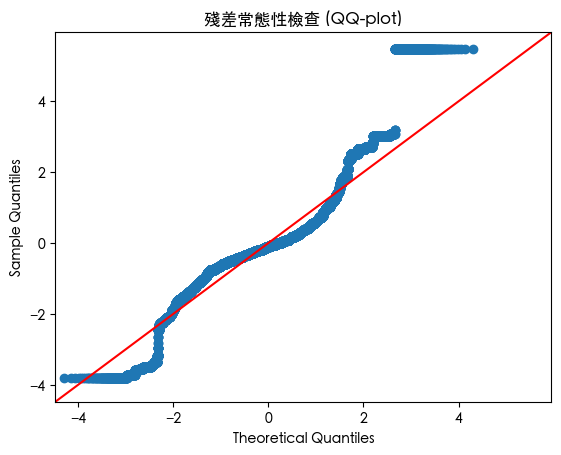

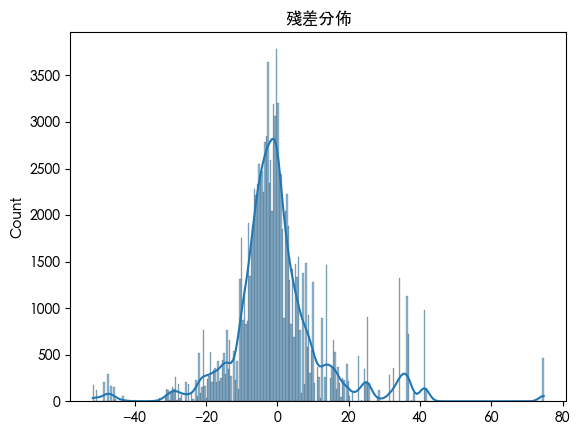

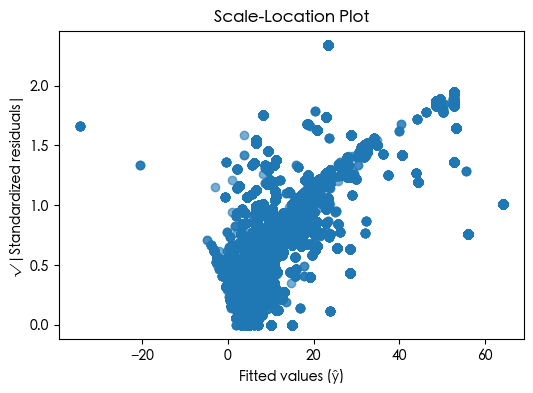

Durbin-Watson: 0.967
ÊÆòÂ∑ÆÂùáÂÄº: 0.000000


In [1258]:
'''
Ê™¢ÂÆöÊÆòÂ∑ÆÈ†ÖÊòØÂê¶Á¨¶Âêà(1)Â∏∏ÊÖãÂàÜÂ∏É(2)ÂêåË≥™ËÆäÁï∞(3)Áç®Á´ãÊÄß
'''

#import statsmodels.api as sm
# ÂÅáË®≠Ê®°ÂûãÊòØ model

resid = model.resid      #ÊÆòÂ∑Æ
fitted = model.fittedvalues  # ‰øÇÊï∏

# (A) ÊÆòÂ∑Æ vs. È†êÊ∏¨ÂÄº
plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted, y=resid, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("ÊÆòÂ∑Æ vs. È†êÊ∏¨ÂÄº")
plt.savefig('ÊÆòÂ∑Æ vs. È†êÊ∏¨ÂÄº.png',format = 'png')
plt.show()

# (B) QQ-plot Ê™¢Êü•Â∏∏ÊÖãÊÄß

sm.qqplot(resid, line='45', fit=True)
plt.title("ÊÆòÂ∑ÆÂ∏∏ÊÖãÊÄßÊ™¢Êü• (QQ-plot)")
plt.savefig('ÊÆòÂ∑ÆÂ∏∏ÊÖãÊÄßÊ™¢Êü•(QQ-plot).png',format = 'png')
plt.show()

# (C) ÊÆòÂ∑ÆÁõ¥ÊñπÂúñ
sns.histplot(resid, kde=True)
plt.title("ÊÆòÂ∑ÆÂàÜ‰Ωà")
plt.savefig('ÊÆòÂ∑ÆÂàÜÂ∏É.png',format = 'png')
plt.show()

# Scale-Location Plot (sqrt standardized residuals vs fitted)
standardized_resid = resid / np.std(resid)
plt.figure(figsize=(6,4))
plt.scatter(fitted, np.sqrt(np.abs(standardized_resid)), alpha=0.6 , cmap = '')
plt.xlabel("Fitted values (≈∑)")
plt.ylabel("‚àö|Standardized residuals|")
plt.title("Scale-Location Plot")
plt.savefig
plt.show()

# (D) Durbin-Watson Ê™¢ÂÆö (Ëá™Áõ∏ÈóúÊ™¢Êü•)
dw = sm.stats.stattools.durbin_watson(resid)
print(f"Durbin-Watson: {dw:.3f}")

# (E) ÊÆòÂ∑ÆÂùáÂÄºÊ™¢Êü• (ÊáâÊé•Ëøë 0)
print(f"ÊÆòÂ∑ÆÂùáÂÄº: {np.mean(resid):.6f}")

### <font color = 'skyblue'>**‰ºç-1„ÄÅÊ≠£ÂâáÂåñÂª∫Ê®°(Lasso,Rideg)**</font>

In [1067]:
# from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
# y = ÁõÆÊ®ôËÆäÊï∏
y = final_datav3_2['Âà∑Âç°Á≠ÜÊï∏']

# X = ÈÄ£Á∫åËÆäÊï∏ + È°ûÂà•ËÆäÊï∏
cont_cols = ['Ââç‰∏ÄÁáüÊ•≠Êó•Êú¨ÊúüÂ∏≥ÂñÆÂ∑≤Áπ≥ÈáëÈ°ç', 'Êú™Âá∫Â∏≥ÈáëÈ°ç', 'Âà∑Âç°ÈáëÈ°ç','Âç°ÁâáÈ°çÂ∫¶']  # ÈÄ£Á∫åËÆäÊï∏
cat_cols  = ['ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±', 'Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±', 'Âπ£Âà•', 'Âπ¥ÈΩ°Áæ§ÁµÑ']  # È°ûÂà•ËÆäÊï∏

# È°ûÂà•ËÆäÊï∏ one-hot encoding
X = pd.get_dummies(final_datav3_2[cont_cols + cat_cols], drop_first = False)

# --- Ê®ôÊ∫ñÂåñ (Âè™ÈáùÂ∞çÈÄ£Á∫åËÆäÊï∏) ---
scaler = StandardScaler()
X[cont_cols] = scaler.fit_transform(X[cont_cols])

# ÂàáÂàÜË®ìÁ∑¥/Ê∏¨Ë©¶ÈõÜ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- LassoCV ---
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# --- RidgeCV ---
alphas = np.logspace(-3, 3, 100)
ridge = RidgeCV(alphas=alphas, cv=5).fit(X_train, y_train)

# --- ElasticNetCV ---
elastic = ElasticNetCV(
    l1_ratio=[.1, .3, .5, .7, .9, .95, 1],
    alphas=np.logspace(-3, 2, 100),
    cv=5,
    random_state=42
).fit(X_train, y_train)

# --- Âª∫Á´ãÊØîËºÉË°® ---
results = pd.DataFrame({
    "Ê®°Âûã": ["Lasso", "Ridge", "ElasticNet"],
    "ÊúÄ‰Ω≥ alpha": [lasso.alpha_, ridge.alpha_, elastic.alpha_],
    "ÊúÄ‰Ω≥ l1_ratio": [1, 0, elastic.l1_ratio_],
    "Ë®ìÁ∑¥ÈõÜ R¬≤": [lasso.score(X_train, y_train),
               ridge.score(X_train, y_train),
               elastic.score(X_train, y_train)],
    # Â¢ûÂä†Ë™øÊï¥Âæå Adj R¬≤
    "Ë®ìÁ∑¥ÈõÜ Adj R¬≤": [(1-(1-lasso.score(X_train, y_train)))*((len(final_datav3)-1)/(len(final_datav3)-8-1)),
                   (1-(1-ridge.score(X_train, y_train)))*((len(final_datav3)-1)/(len(final_datav3)-8-1)),
                   (1-(1-elastic.score(X_train, y_train)))*((len(final_datav3)-1)/(len(final_datav3)-8-1))],
    
    "Ê∏¨Ë©¶ÈõÜ R¬≤": [lasso.score(X_test, y_test),
              ridge.score(X_test, y_test),
              elastic.score(X_test, y_test)],
    # Â¢ûÂä†Ë™øÊï¥Âæå Adj R¬≤
    "Ê∏¨Ë©¶ÈõÜ Adj R¬≤": [(1-(1-lasso.score(X_test, y_test)))*((len(final_datav3)-1)/(len(final_datav3)-8-1)),
                   (1-(1-ridge.score(X_test, y_test)))*((len(final_datav3)-1)/(len(final_datav3)-8-1)),
                   (1-(1-elastic.score(X_test, y_test)))*((len(final_datav3)-1)/(len(final_datav3)-8-1))]
        
})

print(results)

# --- ÂêÑÊ®°Âûã‰øÇÊï∏ (ÂèØÈ°çÂ§ñÊ™¢Êü•ÁâπÂæµÈáçË¶ÅÊÄß) ---

coef_lasso = pd.Series(lasso.coef_, index=X.columns, name="Lasso")
coef_ridge = pd.Series(ridge.coef_, index=X.columns, name="Ridge")
coef_elastic = pd.Series(elastic.coef_, index=X.columns, name="ElasticNet")

intercept_ridge = pd.Series(ridge.intercept_, index = X.columns, name = 'Ridge')
coef_df = pd.concat([coef_lasso, intercept_ridge,coef_ridge, coef_elastic], axis=1)
coef_df
  # È°ØÁ§∫Ââç 15 ÂÄãÁâπÂæµ

           Ê®°Âûã  ÊúÄ‰Ω≥ alpha  ÊúÄ‰Ω≥ l1_ratio    Ë®ìÁ∑¥ÈõÜ R¬≤  Ë®ìÁ∑¥ÈõÜ Adj R¬≤    Ê∏¨Ë©¶ÈõÜ R¬≤  \
0       Lasso  0.004686          1.0  0.441437    0.441468  0.427324   
1       Ridge  1.072267          0.0  0.442380    0.442410  0.428641   
2  ElasticNet  0.001000          1.0  0.442294    0.442324  0.428514   

   Ê∏¨Ë©¶ÈõÜ Adj R¬≤  
0    0.427354  
1    0.428670  
2    0.428543  


In [1259]:
coef_ridge

Ââç‰∏ÄÁáüÊ•≠Êó•Êú¨ÊúüÂ∏≥ÂñÆÂ∑≤Áπ≥ÈáëÈ°ç    2.644095
Êú™Âá∫Â∏≥ÈáëÈ°ç           -1.671819
Âà∑Âç°ÈáëÈ°ç            -1.170721
Âç°ÁâáÈ°çÂ∫¶             4.402222
ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_‰∏âÊ∞ëÂàÜË°å   -3.561753
                   ...   
Âπ¥ÈΩ°Áæ§ÁµÑ_56-65Ê≠≤      4.399276
Âπ¥ÈΩ°Áæ§ÁµÑ_66-75Ê≠≤      0.197376
Âπ¥ÈΩ°Áæ§ÁµÑ_76-85Ê≠≤      3.452478
Âπ¥ÈΩ°Áæ§ÁµÑ_86-95Ê≠≤      5.415592
Âπ¥ÈΩ°Áæ§ÁµÑ_96Ê≠≤‰ª•‰∏ä       2.063758
Name: Ridge, Length: 76, dtype: float64

In [1261]:
def print_sorted_regression_equation(model, feature_names, top_n):
    intercept = model.intercept_
    coefs = model.coef_

    # Âª∫Á´ã (ÁâπÂæµ, ‰øÇÊï∏, ÁµïÂ∞çÂÄº) Ë≥áÊñô
    coef_list = [(f, c, abs(c)) for f, c in zip(feature_names, coefs)]
    # ‰æùÁµïÂ∞çÂÄºÁî±Â§ßÂà∞Â∞èÊéíÂ∫è
    coef_list.sort(key=lambda x: x[2], reverse=True)

    #Â¶ÇÊûúÊúâË®≠ÂÆö top_nÔºåÂ∞±Âè™‰øùÁïôÂâç N ÂÄã
    if top_n is not None:
        coef_list = coef_list[:top_n]
    # ÁµÑÂêàÊñπÁ®ãÂºè
    terms = [f"{c:.4f} * {f}" for f, c, _ in coef_list]
    equation = " +\n".join(terms)
    full_eq = f"≈∂ = {intercept:.4f} +\n{equation}"

    print("‰æùÁµïÂ∞çÂÄºÊéíÂ∫èÁöÑËø¥Ê≠∏ÊñπÁ®ãÂºè (Ââç {}ÂÄãÁâπÂæµÔºö ".format(top_n if top_n else 'ÂÖ®ÈÉ®'))
    print(full_eq)
    

# ‰ΩøÁî®ÁØÑ‰æãÔºöRidge
print_sorted_regression_equation(lasso, X_train_selected.columns, 20)


‰æùÁµïÂ∞çÂÄºÊéíÂ∫èÁöÑËø¥Ê≠∏ÊñπÁ®ãÂºè (Ââç 20ÂÄãÁâπÂæµÔºö 
≈∂ = 7.0731 +
37.3390 * cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âª∫ÂúãÂàÜË°å +
35.2601 * cat__Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Âæ∑Âúã +
17.4380 * cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Êú™Áü•ÂàÜË°å +
15.9006 * cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Ê°ÉÂúíÂàÜË°å +
15.5759 * cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÂâçÈáëÂàÜË°å +
14.3429 * cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â∞èÊ∏ØÂàÜË°å +
12.0112 * cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Êñ∞ËéäÂàÜË°å +
11.8473 * cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Ê°ÇÊûóÂàÜË°å +
11.2213 * cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âè≥ÊòåÂàÜË°å +
9.9418 * cat__Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_ÊÑõÁàæËò≠ +
-7.7557 * cat__Âπ£Âà•_USD +
-7.4977 * cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÊàêÂ§ßÂàÜË°å +
6.9807 * cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Ê©ãÈ†≠ÁßëÂ≠∏ÂúíÂçÄÂàÜË°å +
6.0373 * cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÁáüÊ•≠ÈÉ® +
4.3906 * num__Âç°ÁâáÈ°çÂ∫¶ +
-3.4522 * cat__Âπ¥ÈΩ°Áæ§ÁµÑ_66-75Ê≠≤ +
3.1452 * cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÈºìÂ±±ÂàÜË°å +
-2.7920 * cat__Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Âè∞ÁÅ£ +
2.6388 * num__Ââç

In [1058]:
coef_df[['Lasso','Ridge','ElasticNet']].sort_values(by='Ridge', ascending=False).reset_index()

index      Lasso      Ridge  ElasticNet
0       Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_‰∏≠Âúã  35.326389  37.044522   36.904533
1   ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â≤°Â±±Êú¨Ê¥≤ÂàÜË°å  37.436558  34.091118   37.762799
2            Âπ£Âà•_CNY  21.941525  20.030522   23.820291
3     ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Êñ∞Á´πÂàÜË°å  17.319445  13.919127   17.587731
4     ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÊùøÊ©ãÂàÜË°å  16.088217  13.486378   17.007467
..              ...        ...        ...         ...
75     Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Êñ∞Âä†Âù°  -7.586913  -6.884988   -6.877896
76    Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Êæ≥Â§ßÂà©‰∫û  -0.000000  -9.431881   -6.663169
77    ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â∑¶ÁáüÂàÜË°å  -7.673204 -11.534769   -7.780643
78    Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_ÊñØÈáåËò≠Âç°  -0.000000 -12.102294   -9.111820
79      Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Ëç∑Ëò≠ -28.688299 -33.161695  -32.479918

[80 rows x 4 columns]

In [1066]:
# ÈáùÂ∞ç Lasso Âíå Ridge ÁöÑ‰øÇÊï∏ÊéíÂ∫è (ÂèñÁµïÂ∞çÂÄº)
coef_sorted = (
    coef_df[['Lasso', 'Ridge']]
    .assign(Lasso_abs = coef_df['Lasso'].abs(),
            Ridge_abs = coef_df['Ridge'].abs())
    .sort_values(by='Ridge_abs', ascending=False).reset_index()   # ‰Ω†‰πüÂèØ‰ª•ÊèõÊàê 'Lasso_abs'
)

# È°ØÁ§∫Ââç 20 ÂÄãÁâπÂæµ
coef_sorted.head(30)

index      Lasso      Ridge  Lasso_abs  Ridge_abs
0         Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_‰∏≠Âúã  35.326389  37.044522  35.326389  37.044522
1     ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â≤°Â±±Êú¨Ê¥≤ÂàÜË°å  37.436558  34.091118  37.436558  34.091118
2         Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Ëç∑Ëò≠ -28.688299 -33.161695  28.688299  33.161695
3              Âπ£Âà•_CNY  21.941525  20.030522  21.941525  20.030522
4       ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Êñ∞Á´πÂàÜË°å  17.319445  13.919127  17.319445  13.919127
5       ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÊùøÊ©ãÂàÜË°å  16.088217  13.486378  16.088217  13.486378
6       ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_‰πùÂ¶ÇÂàÜË°å  15.715753  12.152903  15.715753  12.152903
7       Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_ÊñØÈáåËò≠Âç°  -0.000000 -12.102294   0.000000  12.102294
8       ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â∑¶ÁáüÂàÜË°å  -7.673204 -11.534769   7.673204  11.534769
9         Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_‰ºäÊúó   9.857677  11.219484   9.857677  11.219484
10      ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â§ßÁôºÂàÜË°å  13.690118  10.399053  13.690118  10.399053
11        Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Ëã±Âúã   7.315405   9.582993   7.315405   9.582993
12      ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Êú™Áü•ÂàÜË°å  11.795532   9.579810  11.795532   9.579810
13      Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Êæ≥Â§ßÂà©‰∫û  -0.000000  -9.431881   0.000000   9.431881
14      ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âª∫ÂúãÂàÜË°å  11.919036   8.598829  11.919036   8.598829
15             Âπ£Âà•_EUR   8.293845   8.537680   8.293845   8.537680
16      ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âè∞ÂåóÂàÜË°å  11.187675   7.968731  11.187675   7.968731
17       Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Êñ∞Âä†Âù°  -7.586913  -6.884988   7.586913   6.884988
18      ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÈºìÂ±±ÂàÜË°å  -2.799308  -6.493658   2.799308   6.493658
19      ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â§ßÁõ¥ÂàÜË°å  -2.170175  -6.444370   2.170175   6.444370
20      ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_‰∏≠ÂíåÂàÜË°å  -0.000000  -6.398102   0.000000   6.398102
21      ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â±èÊù±ÂàÜË°å  -1.998762  -6.043895   1.998762   6.043895
22             Âπ£Âà•_JPY  -1.649093  -6.001379   1.649093   6.001379
23           Âπ£Âà•_Other  -1.326207  -5.834407   1.326207   5.834407
24      ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ËçâË°ôÂàÜË°å  -1.647711  -5.440955   1.647711   5.440955
25      ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÊàêÂ§ßÂàÜË°å  -0.947327  -5.186613   0.947327   5.186613
26  ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Ê©ãÈ†≠ÁßëÂ≠∏ÂúíÂçÄÂàÜË°å  -1.417709  -5.167620   1.417709   5.167620
27      ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_È≥≥Â±±ÂàÜË°å  -1.370215  -5.111177   1.370215   5.111177
28             Âπ£Âà•_HKD  -0.000000  -4.782100   0.000000   4.782100
29      ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_‰∏âÊ∞ëÂàÜË°å  -1.076662  -4.760487   1.076662   4.760487

In [1176]:
# print("Lasso ÁâπÂæµÊï∏:", len(selected_features))
# print("X_train_selected columns:", X_train_selected.columns[:10])  # Ââç 10 ÂÄã
# print("Lasso coef Êï∏:", len(lasso.coef_))
print("‰øÇÊï∏Êï∏Èáè:", len(lasso.coef_))
print("Ê¨Ñ‰ΩçÊï∏:", X_train.shape[1])
len(lasso.coef_)
#df_coef.head(10).to_excel('LassoËø¥Ê≠∏Ê®°Âûã.xlsx',index = False)

‰øÇÊï∏Êï∏Èáè: 80
Ê¨Ñ‰ΩçÊï∏: 50


80

In [1126]:

# Â∞áÊ®°Âûã‰øÇÊï∏ËΩâÊàê DataFrame
def coef_to_df(model, feature_names):
    coef = model.coef_
    df = pd.DataFrame({
        "feature": feature_names,
        "coef": coef,
        "abs_coef": np.abs(coef)
    }).sort_values("abs_coef", ascending=False)
    return df

# Ëº∏Âá∫ÂõûÊ≠∏ÊñπÁ®ãÂºè
def print_equation(model, feature_names, top_n=None):
    intercept = model.intercept_
    df = coef_to_df(model, feature_names)  # ËΩâÊàê DataFrame

    if top_n:  # Â¶ÇÊûúÊúâÊåáÂÆö top_nÔºåÂ∞±Âè™ÂèñÂâçÂπæÂÄãÈáçË¶ÅËÆäÊï∏
        df = df.head(top_n)

    terms = [f"{row.coef:.4f} * {row.feature}" for _, row in df.iterrows()]
    equation = " +\n".join(terms)  # ÊèõË°åËº∏Âá∫
    full_eq = f"Y^ = {intercept:.4f} +\n{equation}"

    print("ÂõûÊ≠∏ÊñπÁ®ãÂºè:")
    print(full_eq)
    return full_eq  # ‰πüÂèØ‰ª•ÂõûÂÇ≥ÔºåÊñπ‰æøÂæåÁ∫åÂØ´ÂÖ•Ê™îÊ°à


In [1131]:
coef_to_df(ridge,X_train_selected.columns)

feature       coef   abs_coef
18    cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â≤°Â±±Êú¨Ê¥≤ÂàÜË°å  37.238449  37.238449
47             cat__Âπ£Âà•_CNY  19.492941  19.492941
6       cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_‰πùÂ¶ÇÂàÜË°å  18.919032  18.919032
23      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Êñ∞Á´πÂàÜË°å  16.326362  16.326362
27      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÊùøÊ©ãÂàÜË°å  16.015026  16.015026
42      cat__Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_ÊñØÈáåËò≠Âç° -14.627448  14.627448
14      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â§ßÁôºÂàÜË°å  12.551110  12.551110
26      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Êú™Áü•ÂàÜË°å  12.203188  12.203188
21      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âª∫ÂúãÂàÜË°å  11.316577  11.316577
11      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âè∞ÂåóÂàÜË°å  10.899613  10.899613
37        cat__Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_‰ºäÊúó   9.629615   9.629615
45        cat__Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Ëã±Âúã   8.131514   8.131514
19      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â∑¶ÁáüÂàÜË°å  -7.909082   7.909082
28      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÊûóÂè£ÂàÜË°å   6.709706   6.709706
30      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Ê°ÉÂúíÂàÜË°å   5.383221   5.383221
41        cat__Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Êç∑ÂÖã  -4.671549   4.671549
52        cat__Âπ¥ÈΩ°Áæ§ÁµÑ_46-55Ê≠≤  -4.460886   4.460886
40       cat__Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Â•ßÂú∞Âà©  -3.953593   3.953593
5       cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_‰∏≠ÂíåÂàÜË°å  -3.921320   3.921320
48             cat__Âπ£Âà•_JPY  -3.904859   3.904859
44       cat__Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Áæ©Â§ßÂà©  -3.870421   3.870421
38     cat__Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_ÂÖãÁæÖÂüÉË•ø‰∫û  -3.859434   3.859434
36      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÈºìÂ±±ÂàÜË°å  -3.742735   3.742735
34      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ËçâË°ôÂàÜË°å  -3.676825   3.676825
3                num__Âç°ÁâáÈ°çÂ∫¶   3.552802   3.552802
15      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â§ßÁõ¥ÂàÜË°å  -3.462358   3.462358
17      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â±èÊù±ÂàÜË°å  -3.086948   3.086948
31  cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Ê©ãÈ†≠ÁßëÂ≠∏ÂúíÂçÄÂàÜË°å  -3.011083   3.011083
55        cat__Âπ¥ÈΩ°Áæ§ÁµÑ_86-95Ê≠≤   3.007877   3.007877
39       cat__Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Âä†ÊãøÂ§ß   2.992351   2.992351
22      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÊàêÂ§ßÂàÜË°å  -2.669963   2.669963
4       cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_‰∏âÊ∞ëÂàÜË°å  -2.612877   2.612877
49             cat__Âπ£Âà•_KRW  -2.550896   2.550896
46        cat__Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_È¶ôÊ∏Ø   2.458903   2.458903
0       num__Ââç‰∏ÄÁáüÊ•≠Êó•Êú¨ÊúüÂ∏≥ÂñÆÂ∑≤Áπ≥ÈáëÈ°ç   2.447966   2.447966
43        cat__Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Ê≥ïÂúã   2.248988   2.248988
25   cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÊóóÊ¥•Á∞°ÊòìÂûãÂàÜË°å  -2.210353   2.210353
35      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_È≥≥Â±±ÂàÜË°å  -2.174639   2.174639
33       cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÁáüÊ•≠ÈÉ®   2.160884   2.160884
32      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÁÅ£ÂÖßÂàÜË°å  -2.104313   2.104313
13      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âè≥ÊòåÂàÜË°å  -1.924716   1.924716
24      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Êñ∞ËéäÂàÜË°å  -1.826237   1.826237
50             cat__Âπ£Âà•_TWD  -1.402608   1.402608
29      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Ê°ÇÊûóÂàÜË°å  -1.317986   1.317986
2                num__Âà∑Âç°ÈáëÈ°ç  -1.272442   1.272442
53        cat__Âπ¥ÈΩ°Áæ§ÁµÑ_56-65Ê≠≤   1.239101   1.239101
20      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â∏ÇÂ∫úÂàÜË°å  -1.212739   1.212739
16      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â§ßÈáåÂàÜË°å  -1.207857   1.207857
10      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âè∞‰∏≠ÂàÜË°å  -1.207455   1.207455
7       cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÂâçÈáëÂàÜË°å   1.144160   1.144160
1               num__Êú™Âá∫Â∏≥ÈáëÈ°ç  -1.020156   1.020156
56         cat__Âπ¥ÈΩ°Áæ§ÁµÑ_96Ê≠≤‰ª•‰∏ä  -0.929108   0.929108
51        cat__Âπ¥ÈΩ°Áæ§ÁµÑ_26-35Ê≠≤  -0.867151   0.867151
12      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âè∞ÂçóÂàÜË°å   0.753259   0.753259
9       cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÂçöÊÑõÂàÜË°å  -0.519987   0.519987
8      cat__ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÂåóÈ´òÈõÑÂàÜË°å  -0.184167   0.184167
54        cat__Âπ¥ÈΩ°Áæ§ÁµÑ_76-85Ê≠≤  -0.102615   0.102615

In [540]:
print(final_datav3[cat_cols].isna().sum())
len(final_datav3)

Ââç‰∏ÄÁáüÊ•≠Êó•Êú¨ÊúüÂ∏≥ÂñÆÂ∑≤Áπ≥ÈáëÈ°ç    0
Êú™Âá∫Â∏≥ÈáëÈ°ç            0
Âà∑Âç°ÈáëÈ°ç             0
Âç°ÁâáÈ°çÂ∫¶             0
dtype: int64


117579

In [642]:
# ============ËôïÁêÜ‰ª•‰∏ãÈ°ØËëóËÆäÊï∏ÁÇ∫Nan, ‰ª•‰æøÂæåÁ∫åÂÅö ÂÖ±Á∑öÊÄßÈπºÊæÑ (VIF)=============

#final_datav3['ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±'] = final_datav3['ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±'].fillna('Êú™Áü•ÂàÜË°å')
#final_datav3['Âπ£Âà•'] = final_datav3['Âπ£Âà•'].fillna('TWD')

#  -----Â∞á‰ΩéÊñºÔº´Ôº®Ôº§(68Ê¨°) ‰ª•ÂæåÁöÑÂπ£Âà•Âêà‰Ωµ------

#rare_currency = (final_datav3.groupby(['Âπ£Âà•'])['Âπ£Âà•'].size().sort_values(ascending = False)< final_datav3.groupby(['Âπ£Âà•'])['Âπ£Âà•'].size().quantile(0.75)).tail(21)
#final_datav3['Âπ£Âà•'] = final_datav3['Âπ£Âà•'].replace(rare_currency.index, 'Other')
final_datav3[(final_datav3['Âπ£Âà•']=='Other')&(final_datav3['ÂúãÂÖßÂ§ñÁµêÂ∏≥Âú∞Èªû']=='ÂúãÂÖß')][['Âπ£Âà•','Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±','ÂúãÂÖßÂ§ñÁµêÂ∏≥Âú∞Èªû']]

Âπ£Âà• Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®± ÂúãÂÖßÂ§ñÁµêÂ∏≥Âú∞Èªû
12191  Other       Âè∞ÁÅ£      ÂúãÂÖß
12192  Other       Âæ∑Âúã      ÂúãÂÖß

In [645]:
#final_datav3.groupby(['Âπ£Âà•'])['Âπ£Âà•'].size().quantile(0.75)
print(final_datav3.groupby(['Âπ£Âà•'])['Âπ£Âà•'].count().sort_values(ascending = False))
final_datav3.groupby(['Âπ£Âà•'])['Âπ£Âà•'].size().describe()
#final_datav3.groupby(['Âπ£Âà•'])['Âπ£Âà•'].size().describe().to_excel('currency_statis.xlsx')
#final_datav3.groupby(['Âπ£Âà•'])['Âπ£Âà•'].count().sort_values(ascending = False).to_excel('currency_data.xlsx')

Âπ£Âà•
TWD      114336
USD        1335
JPY         488
CNY         436
Other       412
AUD         210
EUR         150
KRW         144
HKD          68
Name: Âπ£Âà•, dtype: int64


count         9.000000
mean      13064.333333
std       37978.779957
min          68.000000
25%         150.000000
50%         412.000000
75%         488.000000
max      114336.000000
Name: Âπ£Âà•, dtype: float64

### <font color = 'skyblue'>**‰ºç-2„ÄÅÁ¥çÂÖ•OLSÂª∫Ê®°(Oringi Least Squres,Lasso,Rideg,Elastic)**</font>

In [1162]:

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# y = ÁõÆÊ®ôËÆäÊï∏
y = final_datav3_2['Âà∑Âç°Á≠ÜÊï∏']

# X = ÈÄ£Á∫åËÆäÊï∏ + È°ûÂà•ËÆäÊï∏
cont_cols = ['Ââç‰∏ÄÁáüÊ•≠Êó•Êú¨ÊúüÂ∏≥ÂñÆÂ∑≤Áπ≥ÈáëÈ°ç', 'Êú™Âá∫Â∏≥ÈáëÈ°ç', 'Âà∑Âç°ÈáëÈ°ç','Âç°ÁâáÈ°çÂ∫¶']  # ÈÄ£Á∫åËÆäÊï∏
cat_cols  = ['ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±', 'Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±', 'Âπ£Âà•', 'Âπ¥ÈΩ°Áæ§ÁµÑ']  # È°ûÂà•ËÆäÊï∏

# È°ûÂà•ËÆäÊï∏ one-hot encoding
X = pd.get_dummies(final_datav3_2[cont_cols + cat_cols], drop_first=True)

# --- Ê®ôÊ∫ñÂåñ (Âè™ÈáùÂ∞çÈÄ£Á∫åËÆäÊï∏) ---
scaler = StandardScaler()
X[cont_cols] = scaler.fit_transform(X[cont_cols])

# ÂàáÂàÜË®ìÁ∑¥/Ê∏¨Ë©¶ÈõÜ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===== OLS =====
ols = LinearRegression().fit(X_train, y_train)
ols_score = ols.score(X_test, y_test)
ols_coef = pd.Series(ols.coef_, index=X.columns)

# --- LassoCV ---
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# --- RidgeCV ---
alphas = np.logspace(-3, 3, 100)
ridge = RidgeCV(alphas=alphas, cv=5).fit(X_train, y_train)

# --- ElasticNetCV ---
elastic = ElasticNetCV(
    l1_ratio = [.1, .3, .5, .7, .9, .95, 1],
    alphas = np.logspace(-3, 2, 100),
    cv = 5,
    random_state=42
).fit(X_train, y_train)

# --- Âª∫Á´ãÊØîËºÉË°® ---
results = pd.DataFrame({
    "Ê®°Âûã": ["Linear","Lasso", "Ridge", "ElasticNet"],
    "ÊúÄ‰Ω≥ alpha": [None,lasso.alpha_, ridge.alpha_, elastic.alpha_],
    "ÊúÄ‰Ω≥ l1_ratio": [None,1, 0, elastic.l1_ratio_],
    "Ë®ìÁ∑¥ÈõÜ R¬≤": [ols.score(X_train, y_train),
               lasso.score(X_train, y_train),
               ridge.score(X_train, y_train),
               elastic.score(X_train, y_train)],
    # Â¢ûÂä†Ë™øÊï¥Âæå Adj R¬≤
    "Ë®ìÁ∑¥ÈõÜ Adj R¬≤": [(1-(1-ols.score(X_train, y_train)))*((len(final_datav3)-1)/(len(final_datav3)-8-1)),
                    (1-(1-lasso.score(X_train, y_train)))*((len(final_datav3)-1)/(len(final_datav3)-8-1)),
                   (1-(1-ridge.score(X_train, y_train)))*((len(final_datav3)-1)/(len(final_datav3)-8-1)),
                   (1-(1-elastic.score(X_train, y_train)))*((len(final_datav3)-1)/(len(final_datav3)-8-1))],
    
    "Ê∏¨Ë©¶ÈõÜ R¬≤": [ols.score(X_test, y_test),
                lasso.score(X_test, y_test),
              ridge.score(X_test, y_test),
              elastic.score(X_test, y_test)],
    # Â¢ûÂä†Ë™øÊï¥Âæå Adj R¬≤
    "Ê∏¨Ë©¶ÈõÜ Adj R¬≤": [(1-(1-ols.score(X_test, y_test)))*((len(final_datav3)-1)/(len(final_datav3)-8-1)),
                    (1-(1-lasso.score(X_test, y_test)))*((len(final_datav3)-1)/(len(final_datav3)-8-1)),
                   (1-(1-ridge.score(X_test, y_test)))*((len(final_datav3)-1)/(len(final_datav3)-8-1)),
                   (1-(1-elastic.score(X_test, y_test)))*((len(final_datav3)-1)/(len(final_datav3)-8-1))]
})

print(results)

# --- ÂêÑÊ®°Âûã‰øÇÊï∏ (ÂèØÈ°çÂ§ñÊ™¢Êü•ÁâπÂæµÈáçË¶ÅÊÄß) ---
coef_ols = pd.Series(ols.coef_, index = X.columns, name = "Linear")
coef_lasso = pd.Series(lasso.coef_, index=X.columns, name="Lasso")
coef_ridge = pd.Series(ridge.coef_, index=X.columns, name="Ridge")
coef_elastic = pd.Series(elastic.coef_, index=X.columns, name="ElasticNet")

coef_df = pd.concat([coef_ols, coef_lasso, coef_ridge, coef_elastic], axis=1)
coef_df.head(15)  # È°ØÁ§∫Ââç 15 ÂÄãÁâπÂæµ

           Ê®°Âûã  ÊúÄ‰Ω≥ alpha  ÊúÄ‰Ω≥ l1_ratio    Ë®ìÁ∑¥ÈõÜ R¬≤  Ë®ìÁ∑¥ÈõÜ Adj R¬≤    Ê∏¨Ë©¶ÈõÜ R¬≤  \
0      Linear       NaN          NaN  0.442284    0.442314  0.422266   
1       Lasso  0.004702          1.0  0.436000    0.436030  0.415684   
2       Ridge  0.114976          0.0  0.442283    0.442313  0.422270   
3  ElasticNet  0.001000          1.0  0.441838    0.441868  0.421964   

   Ê∏¨Ë©¶ÈõÜ Adj R¬≤  
0    0.422295  
1    0.415713  
2    0.422299  
3    0.421993  


Linear      Lasso      Ridge  ElasticNet
Ââç‰∏ÄÁáüÊ•≠Êó•Êú¨ÊúüÂ∏≥ÂñÆÂ∑≤Áπ≥ÈáëÈ°ç    2.644706   2.621702   2.644095    2.631536
Êú™Âá∫Â∏≥ÈáëÈ°ç           -1.672217  -1.616947  -1.671819   -1.661149
Âà∑Âç°ÈáëÈ°ç            -1.170090  -1.212332  -1.170721   -1.183955
Âç°ÁâáÈ°çÂ∫¶             4.402799   4.315519   4.402222    4.385804
ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_‰∏âÊ∞ëÂàÜË°å   -3.560639  -2.488232  -3.561753   -3.254870
ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_‰∏≠ÂíåÂàÜË°å   -5.208583  -1.183066  -5.205326   -4.260580
ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_‰∏≠Â£¢ÂàÜË°å   -1.230387  -0.000000  -1.230717   -0.841476
ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_‰πùÂ¶ÇÂàÜË°å   13.156299  15.813252  13.174900   13.847943
ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÂâçÈáëÂàÜË°å   -0.311903   0.537331  -0.312461   -0.000000
ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÂåóÈ´òÈõÑÂàÜË°å  -2.574052  -1.083567  -2.570108   -2.153791
ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÂçóÈ´òÈõÑÂàÜË°å  -2.256972  -1.092791  -2.257821   -1.909051
ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÂçöÊÑõÂàÜË°å   -3.107088  -1.692655  -3.108164   -2.706466
ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âè∞‰∏≠ÂàÜË°å   -3.537117  -1.498328  -3.536362   -3.003692
ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âè∞ÂåóÂàÜË°å    9.169402   9.782228   9.167768    9.399610
ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âè∞ÂçóÂàÜË°å   -0.534037   0.334449  -0.532778   -0.174916

### <font color = 'jade'>**Èô∏„ÄÅÂÖ±Á∑öÊÄßÈÅéÈ´òËôïÁêÜ(Âêà‰ΩµÂà∑Âç°Á≠ÜÊï∏‰πãÂàÜË°åÔºåÂÉÖÂèñÈ´òÊñº0.5ÁôæÂàÜ‰ΩçÊï∏Ë≥áÊñô)**</font>

In [675]:
#ÊïòËø∞ÊÄßÁµ±Ë®àÊ™¢Ë¶ñÂêÑÈ†ÖÊï∏Êìö
print(final_datav3.groupby(['ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±'])['ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±'].size().describe(),'\n')
print(final_datav3['ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±'].value_counts()) #print(final_datav3.groupby(['ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±'])['ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±'].size().sort_values(ascending = False))

count       37.000000
mean      3177.810811
std       3186.064194
min        182.000000
25%       1200.000000
50%       2480.000000
75%       4405.000000
max      18304.000000
Name: ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±, dtype: float64 

ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±
ÁáüÊ•≠ÈÉ®         18304
Âª∫ÂúãÂàÜË°å         7416
ÁÅ£ÂÖßÂàÜË°å         6939
‰∏âÂ§öÂàÜË°å         6163
‰πùÂ¶ÇÂàÜË°å         5171
ÂâçÈáëÂàÜË°å         5027
Âè∞ÂçóÂàÜË°å         4719
Â∏ÇÂ∫úÂàÜË°å         4560
‰∏âÊ∞ëÂàÜË°å         4410
ÂåóÈ´òÈõÑÂàÜË°å        4405
ÂçóÈ´òÈõÑÂàÜË°å        4244
ÈºìÂ±±ÂàÜË°å         3719
Â≤°Â±±Êú¨Ê¥≤ÂàÜË°å       3619
Ê°ÇÊûóÂàÜË°å         3467
Âè≥ÊòåÂàÜË°å         3307
Â§ßÁôºÂàÜË°å         3014
Êñ∞Á´πÂàÜË°å         2990
È≥≥Â±±ÂàÜË°å         2624
Ê©ãÈ†≠ÁßëÂ≠∏ÂúíÂçÄÂàÜË°å     2480
Â∞èÊ∏ØÂàÜË°å         2307
Â∑¶ÁáüÂàÜË°å         1889
ËçâË°ôÂàÜË°å         1746
Âè∞ÂåóÂàÜË°å         1701
ÊóóÊ¥•Á∞°ÊòìÂûãÂàÜË°å      1571
ÊûóÂè£ÂàÜË°å         1519
Êñ∞ËéäÂàÜË°å         1394
‰∏≠Â£¢ÂàÜË°å         1380
Â±èÊù±ÂàÜË°å         1200
Ê°

In [5]:
#final_datav3.to_excel('final_datav3_2.xlsx',index = False)
#final_datav3_2 = pd.read_excel('/Users/sky/Documents/GitHub/ML100Days/homework/final_datav3_2.xlsx')
final_datav3_2 = pd.read_excel(r'D:\Êï∏ÊìöÂàÜÊûêÁßë\ÊØèÊúàÂàÜÊûêÂ†±Âëä\202508\final_datav3_2.xlsx')
final_datav3_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117579 entries, 0 to 117578
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Ê∂àË≤ªË™™Êòé_WBBL           117577 non-null  object        
 1   Ê∂àË≤ªÊó•Êúü_WBBL           117579 non-null  datetime64[ns]
 2   ÊòüÊúüÂπæ                 117579 non-null  object        
 3   Ê∂àË≤ªÂ∫èËôü                117579 non-null  int64         
 4   Â∏≥ÂñÆÊúà‰ªΩ_WBBL           117579 non-null  int64         
 5   ‰ø°Áî®Âç°Ëôü                117579 non-null  int64         
 6   ÂÆ¢Êà∂Á∑®Ëôü                117579 non-null  object        
 7   Âπ¥ÈΩ°Áæ§ÁµÑ                117579 non-null  object        
 8   Âπ¥ÈΩ°                  117579 non-null  int64         
 9   Gender              117579 non-null  object        
 10  ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±            117579 non-null  object        
 11  Ë™çÂàóÊ•≠Á∏æÂàÜË°åÂêçÁ®±            117579 non-null  object  

Ë®ìÁ∑¥ÈõÜË≥áÊñô: 88184
È©óË≠âÈõÜË≥áÊñô: 17637
Ê∏¨Ë©¶ÈõÜË≥áÊñô: 11758


In [4]:
'''
============================================================================================================================================

-----------       Âõ†ÁÇ∫ÂÖ±Á∑öÊÄßÈÅéÂ§ß(>10)‰∏îÂ§öÊï∏ÁÇ∫ÂçóÈÉ®ÂàÜË°å(25ÂÆ∂), ÊïÖ‰ª•ÊïòËø∞ÊÄßÁµ±Ë®àÂá∫ÁôºÔºåÂÉÖÁïô‰∏ãË∂ÖÈÅémedianÁöÑÂàÜË°åÊ®£Êú¨Êï∏ÔºåÂÖ∂È§òÂàÜÈ°ûÊàê ÂÖ∂ÂÆÉ/Êú™Áü•ÂàÜË°å     ----------

============================================================================================================================================
'''

def group_branches(df, col_name="ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±"):
    """
    Ê†πÊìöÂàÜË°åÊ®£Êú¨Êï∏ÁöÑ median ÈÄ≤Ë°åÂàÜÁµÑÔºö
    - ‰øùÁïô >= median ÁöÑÂàÜË°åÔºåÂñÆÁç®‰øùÁïô
    - ÂÖ∂È§òÂàÜË°å (Âê´ NaN) Âêà‰ΩµÁÇ∫ 'ÂÖ∂‰ªñ/Êú™Áü•ÂàÜË°å'
    
    df: DataFrame
    col_name: Ê¨Ñ‰ΩçÂêçÁ®±ÔºåÈ†êË®≠ 'ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±'
    """
    
    # Ë®àÁÆóÂàÜË°åÊ®£Êú¨Êï∏
    branch_counts = df[col_name].value_counts()
    median_val = branch_counts.median()
    
    # ÊâæÂá∫Â§ßÂàÜË°å
    big_branches = branch_counts[branch_counts >= median_val].index
    
    # ÈáçÊñ∞Ê®ôË®ò
    df[col_name + "_ÂàÜÁµÑ"] = df[col_name].apply(
        lambda x: x if x in big_branches else "ÂÖ∂‰ªñ/Êú™Áü•ÂàÜË°å"
    )
    
    print(f"Median Ê®£Êú¨Êï∏ = {median_val:,.0f}",'\n')
    print(f"‰øùÁïôÁöÑÂ§ßÂàÜË°åÊï∏Èáè: {len(big_branches)}",'\n')
    #print(f"ÂÖ∂‰ªñÂàÜË°åÂêà‰ΩµÁÇ∫: 'ÂÖ∂‰ªñ/Êú™Áü•ÂàÜË°å'")
    
    return df, big_branches


In [5]:
print(X.columns)
X.head()

NameError: name 'X' is not defined

In [6]:
print(group_branches(final_datav3_2))

Median Ê®£Êú¨Êï∏ = 2,480 

‰øùÁïôÁöÑÂ§ßÂàÜË°åÊï∏Èáè: 19 

(                     Ê∂àË≤ªË™™Êòé_WBBL  Ê∂àË≤ªÊó•Êúü_WBBL  ÊòüÊúüÂπæ  Ê∂àË≤ªÂ∫èËôü  Â∏≥ÂñÆÊúà‰ªΩ_WBBL  \
0                          NaN 2025-04-30  ÊòüÊúü‰∏â    14     202505   
1                          NaN 2025-05-06  ÊòüÊúü‰∫å    23     202505   
2        2CO.COM*CYBERLINK.COM 2024-07-01  ÊòüÊúü‰∏Ä     9     202407   
3       2CO.COM!CYBERLINK CORP 2024-11-10  ÊòüÊúüÊó•     8     202411   
4                      ÈÄ£Âä†Ôºä‰ªäÂ§©ÂêÉÈ∫µ 2024-07-04  ÊòüÊúüÂõõ    10     202407   
...                        ...        ...  ...   ...        ...   
117574            ËßÄÊòáÊúâÁ∑öÈõªË¶ñËÇ°‰ªΩÊúâÈôêÂÖ¨Âè∏ 2025-01-28  ÊòüÊúü‰∫å     7     202502   
117575            ËßÄÊòáÊúâÁ∑öÈõªË¶ñËÇ°‰ªΩÊúâÈôêÂÖ¨Âè∏ 2025-01-28  ÊòüÊúü‰∫å     8     202502   
117576                  ËßÄÈü≥Â±±Âä†Ê≤πÁ´ô 2024-07-17  ÊòüÊúü‰∏â    10     202407   
117577            ËßÄÈúß‰ºëÈñíÂ±±ËéäËÇ°‰ªΩÊúâÈôêÂÖ¨Âè∏ 2025-01-25  ÊòüÊúüÂÖ≠    10     202502   
117578        

In [7]:
def plot_branch_distribution(df, col_name = "ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±"):
    """
    Áπ™Ë£ΩÂàÜË°åÊ®£Êú¨Êï∏ÂàÜÂ∏ÉÔºå‰∏¶Ê®ôË®ò median ÈñÄÊ™ª
    """
    
    # Ë®àÁÆóÊ®£Êú¨Êï∏
    branch_counts = df[col_name].value_counts()
    median_val = branch_counts.median()
    
    # ÊéíÂ∫è
    branch_counts = branch_counts.sort_values(ascending=False)
    
    # Áπ™Âúñ
    plt.figure(figsize=(14,6))
    bx = sns.barplot(data  = branch_counts, color="steelblue")
    plt.axhline(median_val, color="white", linestyle="--", label = f"Median = {median_val:,.0f}")

    # Âä†‰∏äÊï∏Â≠óÊ®ôË®ª
    for p in bx.patches:                      #ÊØèÂÄãÈï∑Ê¢ùÁâ©‰ª∂
        bx.annotate(                          #ÊääÊï∏Â≠óÊîæÂú®Èï∑Ê¢ùÈ†ÇÁ´ØÔºåÊóãËΩâ 90¬∞ ÈÅøÂÖçÊñáÂ≠óÈáçÁñä
            #f'{int(p.get_height()):,.of}'),  # Ê®ôË®òÊï∏Â≠ó
            f'{int(p.get_height()):,.0f}',   
            (p.get_x() + p.get_width()/2. , p.get_height()),  # ‰ΩçÁΩÆÔºöÈï∑Ê¢ùÈ†ÇÁ´Ø       Èï∑Ê¢ùÂ∑¶ÈÇäÁïå : p.get_x()/ Èï∑Ê¢ùÂè≥ÈÇäÁïå:p.get_width()
            ha='center', va='top', fontsize=10, color="black",fontweight = 'heavy')
    
    # ‰øÆÊîπ Xtick label È°èËâ≤ 
    biggermedian_brch = {'ÁáüÊ•≠ÈÉ®','Âª∫ÂúãÂàÜË°å','ÁÅ£ÂÖßÂàÜË°å','‰∏âÂ§öÂàÜË°å','‰πùÂ¶ÇÂàÜË°å','ÂâçÈáëÂàÜË°å','Âè∞ÂçóÂàÜË°å','Â∏ÇÂ∫úÂàÜË°å','‰∏âÊ∞ëÂàÜË°å','ÂåóÈ´òÈõÑÂàÜË°å','ÂçóÈ´òÈõÑÂàÜË°å',\
                         'ÈºìÂ±±ÂàÜË°å','Â≤°Â±±Êú¨Ê¥≤ÂàÜË°å','Ê°ÇÊûóÂàÜË°å','Âè≥ÊòåÂàÜË°å','Â§ßÁôºÂàÜË°å','Êñ∞Á´πÂàÜË°å','È≥≥Â±±ÂàÜË°å','Ê©ãÈ†≠ÁßëÂ≠∏ÂúíÂçÄÂàÜË°å'}
    for label in bx.get_xticklabels():
        if label.get_text() in biggermedian_brch:
            label.set_color('indigo')  # ÊåáÂÆöÊñáÂ≠óÁ¥ÖËâ≤
        else:
            label.set_color('black')  # ÂÖ∂‰ªñ‰øùÊåÅÈªëËâ≤ÔºàÂèØÁúÅÁï•Ôºâ
    
    plt.title("ÂêÑÂàÜË°åÊ®£Êú¨Êï∏ÂàÜÂ∏É", fontsize=14)
    plt.ylabel("Ê®£Êú¨Êï∏", fontsize=12)
    plt.xlabel("ÂàÜË°åÂêçÁ®±", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    
    # x, y Ëª∏ÂàªÂ∫¶Ê®ôÁ±§ÊúùÂÖß
    bx.tick_params(axis = 'x', direction = 'out')
    bx.tick_params(axis = 'y', direction = 'in')
    plt.legend()
    plt.tight_layout()
    #plt.savefig('ÂêÑÂàÜË°åÊ®£Êú¨Êï∏.png',format = 'png')
    plt.show()


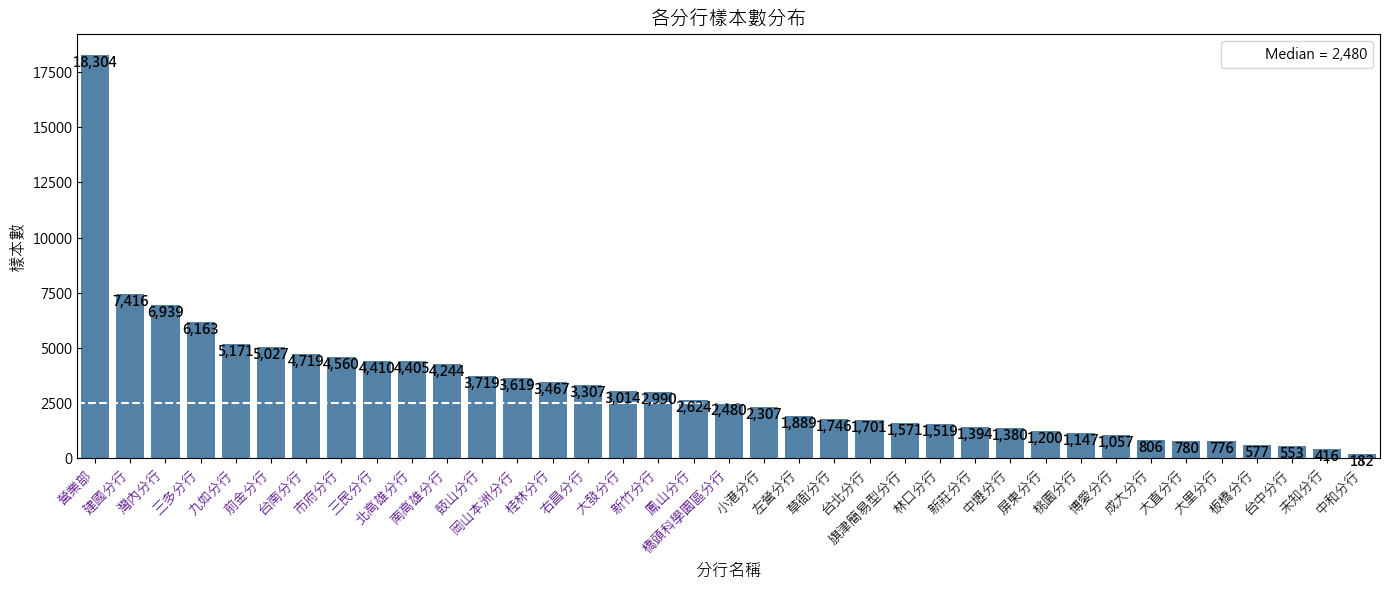

In [8]:
plot_branch_distribution(final_datav3_2)

## <font color = 'jade'>**Êüí„ÄÅÂè¶Â§ñ‰ΩøÁî®Scikit-LearnÂ•ó‰ª∂ ËôïÁêÜÂÖ±Á∑öÊÄß**</font>

#### ‰ΩøÁî® Scikit-Learn È†êÊ∏¨Âô®ÁöÑÊ®ôÊ∫ñÊ≠•È©ü

1. Ê∫ñÂÇôÊ¨≤Ë®ìÁ∑¥È†êÊ∏¨ÁöÑÁâπÂæµÁü©Èô£ $X$  ËàáÁõÆÊ®ôÈô£Âàó $y$
2. ÂàáÂâ≤Ë®ìÁ∑¥ËàáÈ©óË≠âË≥áÊñô„ÄÇ
3. Âª∫Á´ãÈ†êÊ∏¨Âô®È°ûÂà•ÁöÑÁâ©‰ª∂„ÄÇ
4. Â∞áË®ìÁ∑¥ÁâπÂæµÁü©Èô£ $X^{train}$ ËàáÁõÆÊ®ôÈô£Âàó $y^{train}$ Ëº∏ÂÖ• `predictor.fit()`
5. Â∞áÈ©óË≠âÁâπÂæµÁü©Èô£ $X^{valid}$ Ëº∏ÂÖ• `predictor.predict()` Áç≤Âæó $\hat{y}^{valid}$
6. ÊØîÂ∞ç $\hat{y}^{valid}$ Ëàá $y^{valid}$ ‰πãÈñìÁöÑÂ∑ÆÁï∞„ÄÇ

In [15]:
# ==============================
# Step 0. Â•ó‰ª∂ËºâÂÖ•
# ==============================
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures  #PolynomialFeatures ÁîüÊàê‰∏ÄÂÄãÊåáÂÆöÊ¨°ÊñπÊï∏ÁöÑÁâπÂæµÂ§öÈ†ÖÂºèÁü©Èô£
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer                      #ËôïÁêÜNaN
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LassoCV, RidgeCV
import matplotlib.pyplot as plt

In [10]:
X_train_transformed
print(len(selected_features))
print(selected_features[:20])

NameError: name 'X_train_transformed' is not defined

(117579, 49)

In [12]:
''' 
====================================================================

        ------   sparse matrix Ëàá dense matrix ÊØîËºÉ   --------

====================================================================
'''

X_train_pred = preprocessor.transform(X_train)
print(type(X_train_pred))
print(f"sparse shape: {X_train_pred.shape}")
print(f"sparse memory: {X_train_pred.data.nbytes} bytes")

X_train_dense = X_train_pred.toarray()
print(type(X_train_dense))
print(f"dense shape: {X_train_dense.shape}")
print(f"dense memory: {X_train_dense.nbytes} bytes")

NameError: name 'preprocessor' is not defined

In [21]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler

from sklearn.compose import TransformedTargetRegressor #sklearn ÊúÉËá™ÂãïÂπ´‰Ω†Âú® fit ÊôÇËΩâ logÔºåÂú® predict ÊôÇÂèçËΩâÂõûÂéüÂßãÂ∞∫Â∫¶
# ==============================
# Step 1. ÂàáÂàÜË®ìÁ∑¥ / Ê∏¨Ë©¶Ë≥áÊñô
# ==============================

X = final_datav3_2_sorted.drop(columns=["Âà∑Âç°Á≠ÜÊï∏"])  # Ëá™ËÆäÊï∏
y = np.log1p(final_datav3_2_sorted["Âà∑Âç°Á≠ÜÊï∏"])               # ÂèçÊáâËÆäÊï∏
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ==============================
# Step 2. ÂÆöÁæ©Ê¨Ñ‰Ωç / ColumnTransformer
# ==============================

cont_cols =['Ââç‰∏ÄÁáüÊ•≠Êó•Êú¨ÊúüÂ∏≥ÂñÆÂ∑≤Áπ≥ÈáëÈ°ç','Êú™Âá∫Â∏≥ÈáëÈ°ç','Âà∑Âç°ÈáëÈ°ç','Âç°ÁâáÈ°çÂ∫¶']
cat_cols = ["ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±", "Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±", "Âπ£Âà•", "Âπ¥ÈΩ°Áæ§ÁµÑ"]

preprocessor = ColumnTransformer(
    transformers=[
         # Êï∏ÂÄºËÆäÊï∏ ‚Üí Ê®ôÊ∫ñÂåñ
        ("num", StandardScaler(), cont_cols),                 
        # È°ûÂà•ËÆäÊï∏ ‚Üí OneHot  /handle_unknown="ignore"Áï∂ÈÅáÂà∞Ê≤íË¶ãÈÅéÁöÑÈ°ûÂà•ÔºåÂÆÉÊúÉËá™ÂãïÂøΩÁï•Ë©≤È°ûÂà•Ôºå‰∏¶Âú®ÊâÄÊúâ dummy Ê¨Ñ‰ΩçÂ°´ 0
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)  
    ])


# Áî®ÂÆåÊï¥Ë≥áÊñô fit
preprocessor.fit(final_datav3_2)
# ===============================

# Steo 3.ÂâçËôïÁêÜ +Lasso 
# ===============================
X_train_pred = preprocessor.transform(X_train)
X_test_pred  = preprocessor.transform(X_test)

# step 4: ÊãøÂà∞ÁâπÂæµÂêçÁ®± 
features_name = preprocessor.get_feature_names_out()

# ===============================
#Step 5: Âª∫Á´ã LassoCV Ê®°Âûã
# ===============================
lasso = LassoCV(cv=5, random_state=42, max_iter=5000)
lasso.fit(X_train_pred, y_train)


# ====================================================================
# Áî¢ÁîüËΩâÊèõÂæåÁöÑË®ìÁ∑¥Ë≥áÊñôÔºàÂíå lasso.fit ÊôÇ‰∏ÄËá¥ÁÇ∫80ÂÄãÊ¨Ñ‰ΩçÔºâ,Âõ†ÁÇ∫Ê≤íÊúâË®≠ÂÆödrop =False 
# ====================================================================
X_train_transformed = pd.DataFrame(
    preprocessor.transform(X_train).toarray(),
    columns=features_name
)

# Âõ†ÁÇ∫ yÂèñ log ÊïÖÈ†àÊúâÂêåÊ®£ÁöÑÁâπÂæµÈï∑Â∫¶ÔºåX_train Âíå X_test ÁöÑÊ¨Ñ‰ΩçÈ†ÜÂ∫è‰∏ÄÊ®£ÔºåÁº∫ÁöÑË£ú 0ÔºåÂ§öÁöÑ‰∏üÊéâ
X_test_transformed = pd.DataFrame(
    preprocessor.transform(X_test).toarray(),
    columns=features_name
).reindex(columns=X_train_transformed.columns, fill_value=0)




#pipeline Áî®Ê≥ï
lasso = Pipeline(steps= [("preprocessor",preprocessor),
                         ("model",LassoCV(cv=5, random_state=42, max_iter=5000))])
lasso.fit(X_train,y_train)


# ===============================
# step 6: ÂèñÂæó Lasso ÁØ©ÈÅ∏Âá∫ÁöÑÁâπÂæµ
# ===============================

lasso_model = lasso.named_steps['model']
lasso_features = lasso.named_steps['preprocessor']

selected_features = [f for f, c in zip(features_name,lasso_model.coef_) if c!= 0]
print(len(selected_features))
selected_features[:20]

n = len(final_datav3_2)        # Ê®£Êú¨Êï∏
p = X_train_selected.shape[1]  # ‰ΩøÁî®ÁöÑÁâπÂæµÊï∏
# ===============================
# step 7: LassoË©ï‰º∞
# ===============================

print("LassoÊúÄ‰Ω≥ alpha:", lasso.alpha_)
print("Ë®ìÁ∑¥ÈõÜ R¬≤", lasso.score(X_train_pred, y_train))
print("Ê∏¨Ë©¶ÈõÜ R¬≤:", lasso.score(X_test_pred, y_test))
# Â¢ûÂä†Ë™øÊï¥Âæå Adj R¬≤
print("Ë®ìÁ∑¥ÈõÜ Adj R¬≤",(1-(1-lasso.score(X_train_pred, y_train)))*((n-1)/(n-p-1)))
print("Ê∏¨Ë©¶ÈõÜ Adj R¬≤",(1-(1-lasso.score(X_test_pred, y_test)))*((n-1)/(n-p-1)))
                   
# ===============================
# step 8: ÂâçËôïÁêÜ + Ridge
# ===============================
X_train_selected = pd.DataFrame(X_train_pred.toarray(), columns = features_name)[selected_features]
X_test_selected = pd.DataFrame(X_test_pred.toarray(), columns = features_name)[selected_features]

# Â•óÁî® lassoÂâ©‰∏ãÁöÑÁâπÂæµÔºåÈï∑Â∫¶ÊâçÊúÉ‰∏ÄËá¥ÊÄß
X_train_selected= X_train_selected[selected_features]
X_test_selected = X_test_selected[selected_features]

#Step 9: Âª∫Á´ã RidgeCV Ê®°Âûã
ridge = RidgeCV(alphas = np.logspace(-3, 3, 100),cv = 5)#np.logspace(start:‰ª£Ë°®Âæû 10^(-3) = ÈñãÂßã, stop:‰ª£Ë°®Âæû 10^(-3) = ÁµêÊùü, num = Âú®ÈÄôÂÄãÁØÑÂúçÁîüÊàê 100 ÂÄãÁ≠âÊØîÊï∏ÂàóÁöÑÊï∏Â≠ó)
ridge.fit(X_train_selected,y_train)

# ===============================
# step 10: RidgeË©ï‰º∞
# ===============================

print("RidgeÊúÄ‰Ω≥ alpha:", ridge.alpha_)
print("Ë®ìÁ∑¥ÈõÜ R¬≤", ridge.score(X_train_selected, y_train))
print("Ê∏¨Ë©¶ÈõÜ R¬≤:", ridge.score(X_test_selected, y_test))
# Â¢ûÂä†Ë™øÊï¥Âæå Adj R¬≤
print("Ë®ìÁ∑¥ÈõÜ Adj R¬≤",(1-(1-ridge.score(X_train_selected, y_train)))*((n-1)/(n-p-1)))
print("Ê∏¨Ë©¶ÈõÜ Adj R¬≤",(1-(1-ridge.score(X_test_selected, y_test)))*((n-1)/(n-p-1)))

65


NameError: name 'X_train_selected' is not defined

In [1266]:
X_train_selected.shape

(94063, 59)

In [1017]:
np.logspace(-3, 3, 5)

array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03])

≈∂ = 1.9433 +
1.7102 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_‰∏≠Âúã +
-1.4209 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Ëç∑Ëò≠ +
1.3402 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Êú™Áü•ÂàÜË°å +
1.2488 * Âπ£Âà•_CNY +
1.2012 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÊùøÊ©ãÂàÜË°å +
1.0409 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â≤°Â±±Êú¨Ê¥≤ÂàÜË°å +
0.9355 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âè∞ÂåóÂàÜË°å +
0.7133 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âª∫ÂúãÂàÜË°å +
0.6577 * Âπ£Âà•_EUR +
0.6113 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Êñ∞Á´πÂàÜË°å +
0.5732 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_‰ºäÊúó +
-0.5493 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â§ßÁõ¥ÂàÜË°å +
0.5304 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Ëã±Âúã +
-0.5267 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_ÊÑõÁàæËò≠ +
0.4634 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_‰πùÂ¶ÇÂàÜË°å


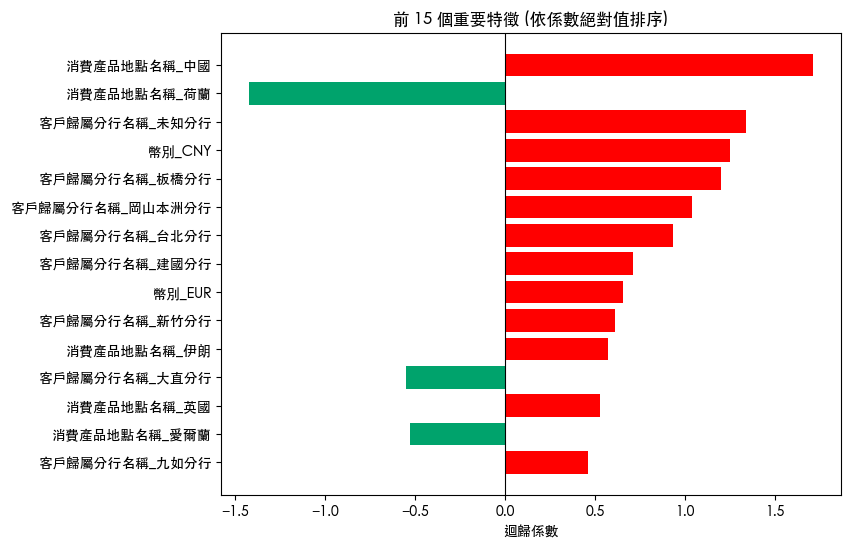

In [1419]:
'''
Ê®°ÂûãËº∏Âá∫Ëá≥Ë°®Ê†º‰∏îÁπ™Âúñ (Lasso)
'''

def coef_to_df(model, X):
    """ÊääÊ®°Âûã‰øÇÊï∏ËΩâÊàê DataFrameÔºå‰øùË≠âÁâπÂæµÊï∏Âíå‰øÇÊï∏Êï∏‰∏ÄËá¥"""
    features = X.columns
    
    
    if len(features) != len(model.coef_):
        raise ValueError(f"ÁâπÂæµÊï∏ {len(features)} Âíå ‰øÇÊï∏Êï∏ {len(model.coef_)} ‰∏ç‰∏ÄËá¥ÔºåË´ãÁ¢∫Ë™çÂâçËôïÁêÜÊñπÂºè‰∏ÄËá¥ÔºÅ")

    # ÂéªÊéâ ColumnTransformer Âä†‰∏äÁöÑÂâçÁ∂¥
    clean_features = [f.replace("num__", "").replace("cat__", "") for f in features]
    
    df_coef = pd.DataFrame({
        "feature": clean_features,
        "coef": model.coef_
    })
    df_coef["abs_coef"] = df_coef["coef"].abs()
    df_coef = df_coef.sort_values("abs_coef", ascending=False).reset_index(drop=True)
    return df_coef

def print_equation(model, X, top_n=None):
    """Ëº∏Âá∫ÂõûÊ≠∏ÊñπÁ®ãÂºè"""
    intercept = model.intercept_
    df_coef = coef_to_df(model, X)
    if top_n:
        df_coef = df_coef.head(top_n)

    terms = [f"{row.coef:.4f} * {row.feature}" for _, row in df_coef.iterrows()]
    equation = " +\n".join(terms)
    full_eq = f"≈∂ = {intercept:.4f} +\n{equation}"
    print(full_eq)
    return full_eq

def plot_top_features(model, X, top_n):
    """Áπ™Ë£ΩÂâç N ÂÄãÈáçË¶ÅÁâπÂæµÁöÑÊ¢ùÁãÄÂúñ"""
    df_coef = coef_to_df(model, X).head(top_n)
    plt.figure(figsize=(8, 6))

    #Âà§Êñ∑‰øÇÊï∏È°èËâ≤
    colors  = df_coef['coef'].apply(lambda x:'red' if x>0 else '#00A36C')
    plt.barh(df_coef["feature"], df_coef["coef"],color = colors)
    plt.axvline(0, color="black", linewidth=0.8)
    plt.title(f"Ââç {top_n} ÂÄãÈáçË¶ÅÁâπÂæµ (‰æù‰øÇÊï∏ÁµïÂ∞çÂÄºÊéíÂ∫è)")
    plt.xlabel("Ëø¥Ê≠∏‰øÇÊï∏")
    plt.gca().invert_yaxis()
    plt.savefig('lasso.png',format = 'png',bbox_inches = 'tight')
    plt.show()

# ‚úÖ ‰ΩøÁî®ÊñπÂºè
df_coef = coef_to_df(ridge, X_train_selected)  # Áõ¥Êé•Áî® X_train_transformed

# Ëº∏Âá∫ÂÆåÊï¥ÂõûÊ≠∏ÊñπÁ®ãÂºèÔºàÂâç 20 ÂÄãÔºâ
print_equation(ridge, X_train_selected, top_n=15)

# Áï´ÂúñÔºàÂâç 20 ÂÄãÈáçË¶ÅÁâπÂæµÔºâ
plot_top_features(ridge, X_train_selected, top_n=15)


In [1435]:
from sklearn.metrics import mean_squared_error

# ‚úÖ Ê∏¨Ë©¶ÊôÇ‰πüË¶ÅÂ•óÁî®Áõ∏ÂêåÁöÑÁâπÂæµÂ≠êÈõÜ
X_test_selected = pd.DataFrame(
    X_test_transformed, 
    columns=features_name
)[X_train_selected.columns]  # Â∞çÈΩäÊ¨Ñ‰Ωç

y_pred = np.expm1(ridge.predict(X_test_selected))  # Êää log È†êÊ∏¨ÂÄºÈÇÑÂéü
mse = mean_squared_error(y_test, y_pred)
print(mse)

np.var(y, ddof=1)  

85.28956273591272


0.9811006020767723

In [1262]:
df_coef

feature       coef   abs_coef
0   ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â≤°Â±±Êú¨Ê¥≤ÂàÜË°å  37.339015  37.339015
1       Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_‰∏≠Âúã  35.260060  35.260060
2       Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Ëç∑Ëò≠ -29.984495  29.984495
3            Âπ£Âà•_CNY  21.463679  21.463679
4     ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Êñ∞Á´πÂàÜË°å  17.438047  17.438047
..              ...        ...        ...
75    Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Â°ûÊôÆË∑ØÊñØ  -0.000000   0.000000
76     Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Âä†ÊãøÂ§ß   0.000000   0.000000
77   Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_ÂÖãÁæÖÂüÉË•ø‰∫û  -0.000000   0.000000
78    ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â§ßÈáåÂàÜË°å  -0.000000   0.000000
79       Âπ¥ÈΩ°Áæ§ÁµÑ_96Ê≠≤‰ª•‰∏ä  -0.000000   0.000000

[80 rows x 3 columns]

In [1327]:
def plot_top_features(model, X, top_n):
    """Áπ™Ë£ΩÂâç N ÂÄãÈáçË¶ÅÁâπÂæµÁöÑÊ¢ùÁãÄÂúñ"""
    df_coef = coef_to_df(model, X).head(top_n)
    plt.figure(figsize=(8, 6))

    #Âà§Êñ∑‰øÇÊï∏È°èËâ≤
    colors  = df_coef['coef'].apply(lambda x:'red' if x>0 else '#00A36C')
    plt.barh(df_coef["feature"], df_coef["coef"],color = colors)
    plt.axvline(0, color="black", linewidth=0.8)
    plt.title(f"Ââç {top_n} ÂÄãÈáçË¶ÅÁâπÂæµ (‰æù‰øÇÊï∏ÁµïÂ∞çÂÄºÊéíÂ∫è)")
    plt.xlabel("Ëø¥Ê≠∏‰øÇÊï∏")
    plt.gca().invert_yaxis()
    plt.savefig('lasso_and_ridge_features.png',format = 'png',bbox_inches = 'tight')
    plt.show()



def compare_models(lasso, ridge, X_train_transformed, X_train_selected, top_n=15):
    """
    ÂêåÊôÇËº∏Âá∫ Lasso Ëàá Ridge ÁöÑ‰øÇÊï∏ & ÊñπÁ®ãÂºè & Top ÁâπÂæµ
    """
    results = {}

    # --- Lasso (ÂÖ®ÁâπÂæµ) ---
    df_lasso = coef_to_df(lasso, X_train_transformed)
    eq_lasso = print_equation(lasso, X_train_transformed, top_n=top_n)
    print("\nüìå Lasso Top Features")
    plot_top_features(lasso, X_train_transformed, top_n=top_n)

    results["Lasso"] = {"coef": df_lasso, "equation": eq_lasso}

    # --- Ridge (Lasso ÁØ©ÈÅ∏ÂæåÁöÑÁâπÂæµ) ---
    df_ridge = coef_to_df(ridge, X_train_selected)
    eq_ridge = print_equation(ridge, X_train_selected, top_n=top_n)
    print("\nüìå Ridge Top Features")
    plot_top_features(ridge, X_train_selected, top_n=top_n)

    results["Ridge"] = {"coef": df_ridge, "equation": eq_ridge}
    
    return results


≈∂ = 7.0731 +
37.3390 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â≤°Â±±Êú¨Ê¥≤ÂàÜË°å +
35.2601 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_‰∏≠Âúã +
-29.9845 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Ëç∑Ëò≠ +
21.4637 * Âπ£Âà•_CNY +
17.4380 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Êñ∞Á´πÂàÜË°å +
15.9006 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÊùøÊ©ãÂàÜË°å +
15.5759 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_‰πùÂ¶ÇÂàÜË°å +
14.3429 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â§ßÁôºÂàÜË°å +
12.0112 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âª∫ÂúãÂàÜË°å +
11.8473 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Êú™Áü•ÂàÜË°å +
11.2213 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âè∞ÂåóÂàÜË°å +
9.9418 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_‰ºäÊúó +
7.9548 * Âπ£Âà•_EUR +
-7.7557 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Êñ∞Âä†Âù° +
-7.4977 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â∑¶ÁáüÂàÜË°å

üìå Lasso Top Features


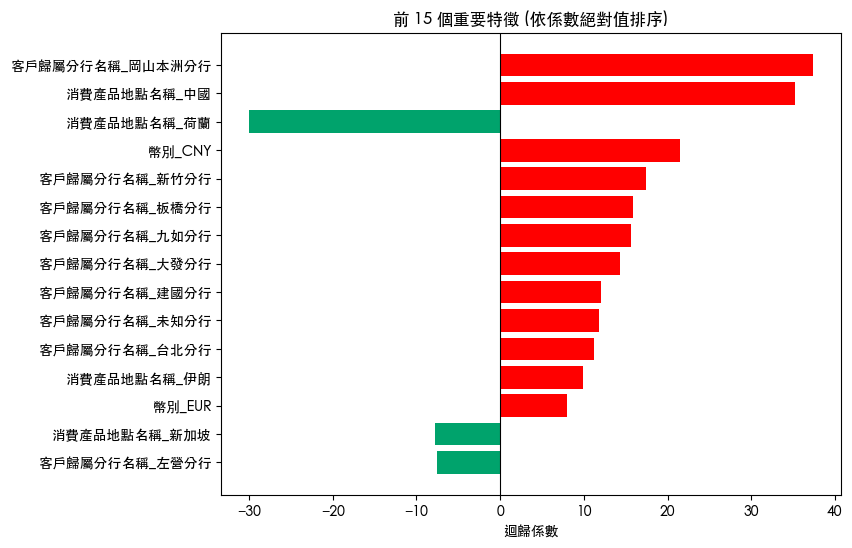

≈∂ = 5.2569 +
37.8387 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â≤°Â±±Êú¨Ê¥≤ÂàÜË°å +
37.3943 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_‰∏≠Âúã +
-34.3741 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Ëç∑Ëò≠ +
22.8400 * Âπ£Âà•_CNY +
17.8712 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Êñ∞Á´πÂàÜË°å +
17.1363 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÊùøÊ©ãÂàÜË°å +
15.8386 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_‰πùÂ¶ÇÂàÜË°å +
14.8870 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â§ßÁôºÂàÜË°å +
13.4786 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Êú™Áü•ÂàÜË°å +
12.3785 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âª∫ÂúãÂàÜË°å +
11.8396 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âè∞ÂåóÂàÜË°å +
11.6761 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_‰ºäÊúó +
11.4959 * Âπ£Âà•_EUR +
10.1190 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Ëã±Âúã +
7.6272 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÊûóÂè£ÂàÜË°å

üìå Ridge Top Features


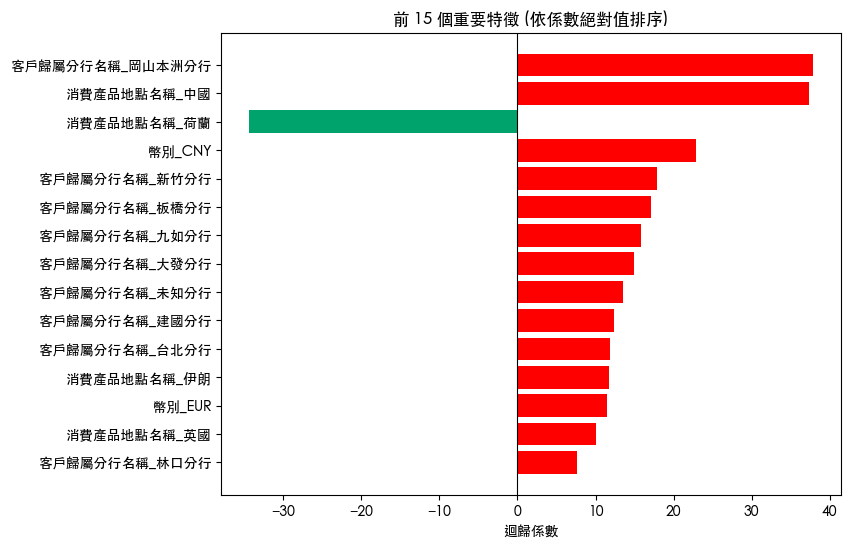

{'Lasso': {'coef':             feature       coef   abs_coef
  0   ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â≤°Â±±Êú¨Ê¥≤ÂàÜË°å  37.339015  37.339015
  1       Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_‰∏≠Âúã  35.260060  35.260060
  2       Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Ëç∑Ëò≠ -29.984495  29.984495
  3            Âπ£Âà•_CNY  21.463679  21.463679
  4     ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Êñ∞Á´πÂàÜË°å  17.438047  17.438047
  ..              ...        ...        ...
  75    Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Â°ûÊôÆË∑ØÊñØ  -0.000000   0.000000
  76     Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Âä†ÊãøÂ§ß   0.000000   0.000000
  77   Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_ÂÖãÁæÖÂüÉË•ø‰∫û  -0.000000   0.000000
  78    ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â§ßÈáåÂàÜË°å  -0.000000   0.000000
  79       Âπ¥ÈΩ°Áæ§ÁµÑ_96Ê≠≤‰ª•‰∏ä  -0.000000   0.000000
  
  [80 rows x 3 columns],
  'equation': '≈∂ = 7.0731 +\n37.3390 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â≤°Â±±Êú¨Ê¥≤ÂàÜË°å +\n35.2601 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_‰∏≠Âúã +\n-29.9845 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Ëç∑Ëò≠ +\n21.4637 * Âπ£Âà•_CNY +\n17.4380 * ÂÆ¢Êà∂Ê≠∏

In [1328]:
compare_models(lasso, ridge,X_train_transformed, X_train_selected)

In [4]:
def compare_top_features_side_by_side(lasso, ridge, X_lasso, X_ridge, top_n=15):
    # ÂèñÂâç N ÁâπÂæµ
    df_lasso = coef_to_df(lasso, X_lasso).sort_values("abs_coef",ascending=False).head(top_n)
    df_ridge = coef_to_df(ridge, X_ridge).sort_values('abs_coef',ascending = False).head(top_n)

     # ÁÇ∫‰∫Ü barh Âæû‰∏äÂà∞‰∏ãÁï´ÔºåÊääÈ†ÜÂ∫èÂèçËΩâ
    df_lasso = df_lasso.iloc[::-1]
    df_ridge = df_ridge.iloc[::-1]

    # ÊâæÂá∫Â∑ÆÁï∞ÁâπÂæµ
    diff_features = set(df_lasso["feature"]) ^ set(df_ridge["feature"])

    fig, axes = plt.subplots(1, 2, figsize=(40, 15), sharey= False)

    for ax, df, title in zip(axes, [df_lasso, df_ridge], ["Lasso", "Ridge"]):
        if df.empty:
            ax.set_title(f"{title} Ê≤íÊúâÂèØÁî®ÁâπÂæµ")
            continue
        plt.fontsize = 16
        colors = ['red' if c > 0 else '#00A36C' for c in df["coef"]]
        ax.barh(df["feature"], df["coef"], color=colors)

        # ÊääÂ∑ÆÁï∞ÁâπÂæµÁöÑ y Ëª∏ÊñáÂ≠óÊîπÁ¥ÖËâ≤ + Á≤óÈ´î
        yticks = ax.get_yticklabels()
        xticks = ax.get_xticklabels()
        
        # ÂÖàÂÖ®ÈÉ®ÊîæÂ§ßÂ≠óÈ´î
        for tick in yticks:
            tick.set_fontsize(25)  
        for tick in xticks:
            tick.set_fontsize(25)  

        #‰∏çÂêåÁâπÂæµ Ê®ôË®òÁ¥ÖËâ≤
        for tick, feature in zip(yticks, df["feature"]):
            if feature in diff_features:
                tick.set_color("red")
                tick.set_fontweight("bold")
                tick.set_fontsize(19)

        ax.axvline(0, color="black", linewidth=0.8)
        ax.set_title(f"{title} Ââç {top_n} ÁâπÂæµ",fontsize = 22)
        
    plt.suptitle("Lasso vs Ridge Ââç 15 ÁâπÂæµÊØîËºÉ", fontsize=25,fontweight = 'bold')
    plt.tight_layout()
    plt.savefig('Lasso vs Ridge Ââç 15 ÁâπÂæµÊØîËºÉ',bbox_inches = 'tight')
    plt.show()


In [5]:
compare_top_features_side_by_side(lasso, ridge, X_train_transformed, X_train_selected)

NameError: name 'lasso' is not defined

In [1294]:
def compare_models(lasso, ridge, 
                   X_train_transformed, X_train_selected, 
                   top_n=20):
    """
    Ëº∏Âá∫ Lasso & Ridge ÁöÑÂõûÊ≠∏ÊñπÁ®ãÂºèÂíå Top ÁâπÂæµ
    """
    results = {}

    # --- Lasso (ÂÆåÊï¥ÁâπÂæµ) ---
    print("\n===== Lasso =====")
    df_lasso = coef_to_df(lasso, X_train_transformed)
    eq_lasso = print_equation(lasso, X_train_transformed, top_n=top_n)
    plot_top_features(lasso, X_train_transformed, top_n=top_n)
    results["Lasso"] = {"coef": df_lasso, "equation": eq_lasso}

    # --- Ridge (Lasso ÁØ©ÂæåÁâπÂæµ) ---
    print("\n===== Ridge =====")
    df_ridge = coef_to_df(ridge, X_train_selected)
    eq_ridge = print_equation(ridge, X_train_selected, top_n=top_n)
    plot_top_features(ridge, X_train_selected, top_n=top_n)
    results["Ridge"] = {"coef": df_ridge, "equation": eq_ridge}

    return results



===== Lasso =====
≈∂ = 7.0731 +
37.3390 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â≤°Â±±Êú¨Ê¥≤ÂàÜË°å +
35.2601 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_‰∏≠Âúã +
-29.9845 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Ëç∑Ëò≠ +
21.4637 * Âπ£Âà•_CNY +
17.4380 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Êñ∞Á´πÂàÜË°å +
15.9006 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÊùøÊ©ãÂàÜË°å +
15.5759 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_‰πùÂ¶ÇÂàÜË°å +
14.3429 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â§ßÁôºÂàÜË°å +
12.0112 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âª∫ÂúãÂàÜË°å +
11.8473 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Êú™Áü•ÂàÜË°å +
11.2213 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âè∞ÂåóÂàÜË°å +
9.9418 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_‰ºäÊúó +
7.9548 * Âπ£Âà•_EUR +
-7.7557 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Êñ∞Âä†Âù° +
-7.4977 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â∑¶ÁáüÂàÜË°å +
7.4664 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Ëã±Âúã +
6.9807 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÊûóÂè£ÂàÜË°å +
6.0373 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Ê°ÉÂúíÂàÜË°å +
4.3906 * Âç°ÁâáÈ°çÂ∫¶ +
-3.9587 * Âπ¥ÈΩ°Áæ§ÁµÑ_46-55Ê≠≤


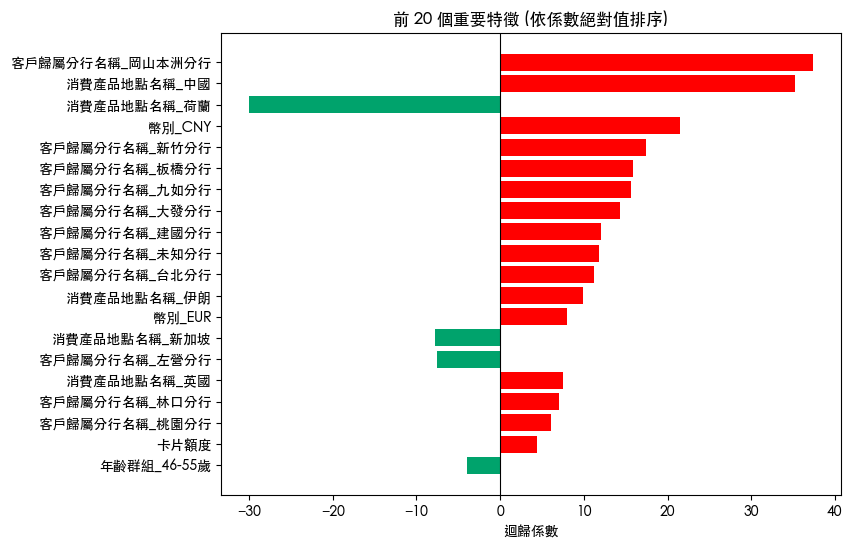


===== Ridge =====
≈∂ = 5.2569 +
37.8387 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â≤°Â±±Êú¨Ê¥≤ÂàÜË°å +
37.3943 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_‰∏≠Âúã +
-34.3741 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Ëç∑Ëò≠ +
22.8400 * Âπ£Âà•_CNY +
17.8712 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Êñ∞Á´πÂàÜË°å +
17.1363 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÊùøÊ©ãÂàÜË°å +
15.8386 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_‰πùÂ¶ÇÂàÜË°å +
14.8870 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â§ßÁôºÂàÜË°å +
13.4786 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Êú™Áü•ÂàÜË°å +
12.3785 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âª∫ÂúãÂàÜË°å +
11.8396 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Âè∞ÂåóÂàÜË°å +
11.6761 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_‰ºäÊúó +
11.4959 * Âπ£Âà•_EUR +
10.1190 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Ëã±Âúã +
7.6272 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_ÊûóÂè£ÂàÜË°å +
-7.5411 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â∑¶ÁáüÂàÜË°å +
6.8100 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Ê°ÉÂúíÂàÜË°å +
-6.7656 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Êñ∞Âä†Âù° +
4.4118 * Âç°ÁâáÈ°çÂ∫¶ +
4.1179 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Âæ∑Âúã


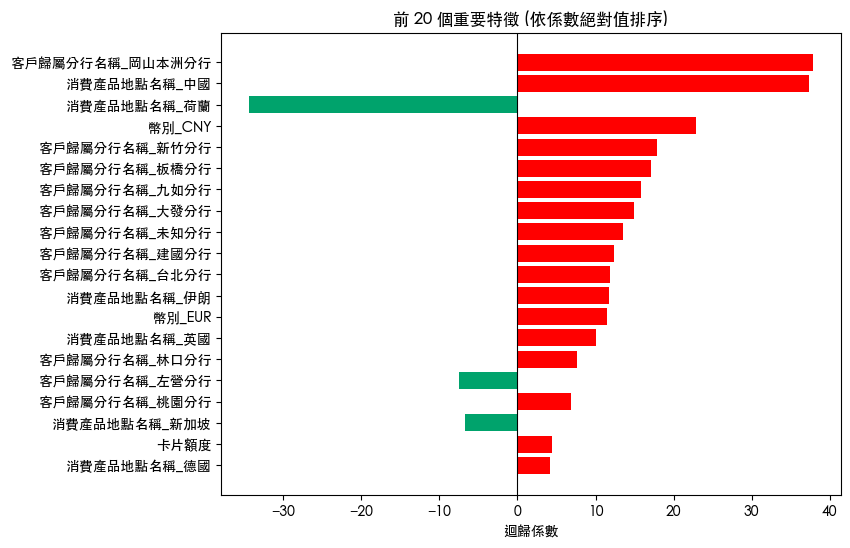

{'Lasso': {'coef':             feature       coef   abs_coef
  0   ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â≤°Â±±Êú¨Ê¥≤ÂàÜË°å  37.339015  37.339015
  1       Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_‰∏≠Âúã  35.260060  35.260060
  2       Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Ëç∑Ëò≠ -29.984495  29.984495
  3            Âπ£Âà•_CNY  21.463679  21.463679
  4     ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Êñ∞Á´πÂàÜË°å  17.438047  17.438047
  ..              ...        ...        ...
  75    Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Â°ûÊôÆË∑ØÊñØ  -0.000000   0.000000
  76     Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Âä†ÊãøÂ§ß   0.000000   0.000000
  77   Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_ÂÖãÁæÖÂüÉË•ø‰∫û  -0.000000   0.000000
  78    ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â§ßÈáåÂàÜË°å  -0.000000   0.000000
  79       Âπ¥ÈΩ°Áæ§ÁµÑ_96Ê≠≤‰ª•‰∏ä  -0.000000   0.000000
  
  [80 rows x 3 columns],
  'equation': '≈∂ = 7.0731 +\n37.3390 * ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±_Â≤°Â±±Êú¨Ê¥≤ÂàÜË°å +\n35.2601 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_‰∏≠Âúã +\n-29.9845 * Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±_Ëç∑Ëò≠ +\n21.4637 * Âπ£Âà•_CNY +\n17.4380 * ÂÆ¢Êà∂Ê≠∏

In [1295]:
compare_models(lasso, ridge, X_train_transformed, X_train_selected)

In [965]:
# Ëä¨ÊÅ©Áâπ
# ÁîüÊàê‰∏ÄÂÄãÊåáÂÆöÊ¨°ÊñπÁöÑÁâπÂæµÂ§öÈ†ÖÂºèÁü©Èô£
polynomial_features = PolynomialFeatures()
y_transform = polynomial_features.fit_transform(y)
y_transform[:5,:]

# Ê®ôÊ∫ñÂåñËÆäÊï∏
cont_cols =['Ââç‰∏ÄÁáüÊ•≠Êó•Êú¨ÊúüÂ∏≥ÂñÆÂ∑≤Áπ≥ÈáëÈ°ç','Êú™Âá∫Â∏≥ÈáëÈ°ç','Âà∑Âç°ÈáëÈ°ç','Âç°ÁâáÈ°çÂ∫¶']
cat_cols = ["ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±", "Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±", "Âπ£Âà•", "Âπ¥ÈΩ°Áæ§ÁµÑ"]
X =final_datav3_2[cont_cols  + cat_cols]
y = final_datav3_2['Âà∑Âç°Á≠ÜÊï∏']
standard_scaler = StandardScaler()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# Lasso 
lasso = LassoCV(cv=5, random_state=42, max_iter=5000)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(y_test)
m = y_test.size
m

ValueError: Expected 2D array, got 1D array instead:
array=[ 1  3 21 ...  5  2  2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

WLS summary
                            WLS Regression Results                            
Dep. Variable:                   Âà∑Âç°Á≠ÜÊï∏   R-squared:                       0.999
Model:                            WLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.972e+07
Date:                Tue, 09 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:39:38   Log-Likelihood:            -3.8987e+05
No. Observations:              117579   AIC:                         7.797e+05
Df Residuals:                  117574   BIC:                         7.798e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.7730  

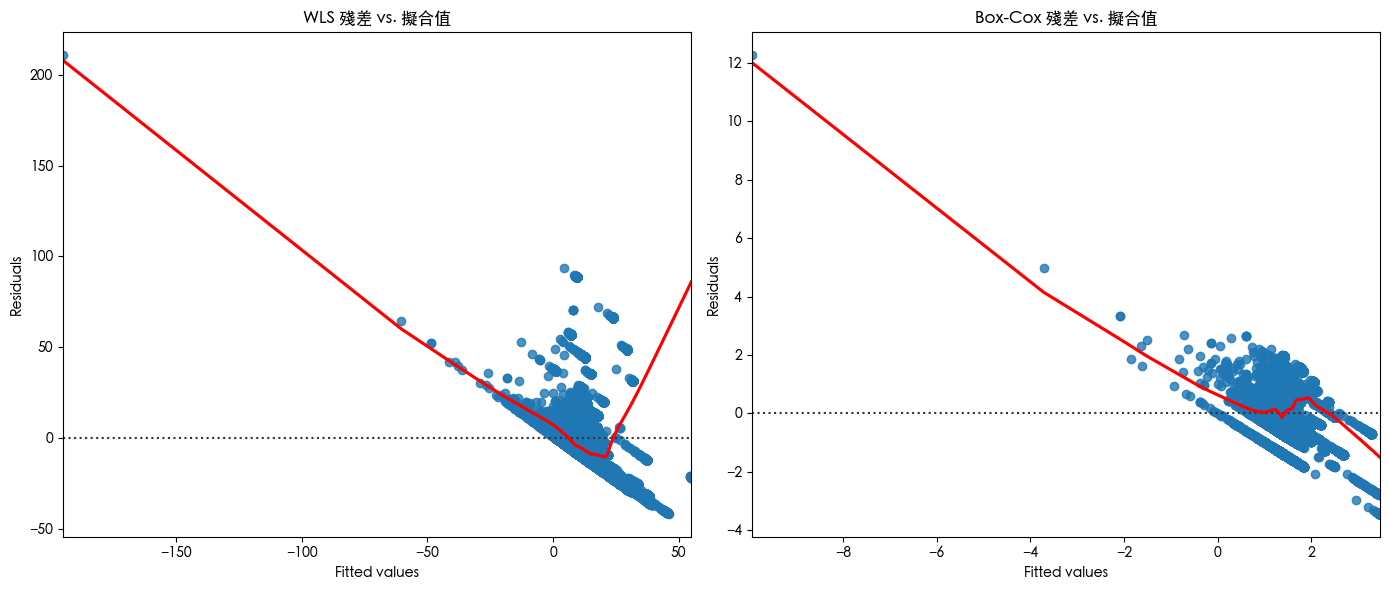

In [1436]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.regression.linear_model import WLS

from statsmodels.tools import add_constant
from statsmodels.formula.api import ols
from scipy import stats

# ==============================
# Step 1: Ë®≠ÂÆö y, X
# ==============================
# ÂÅáË®≠‰Ω†ÁöÑË≥áÊñô
y = final_datav3_2["Âà∑Âç°Á≠ÜÊï∏"]
X = final_datav3_2[["Âà∑Âç°ÈáëÈ°ç","Âç°ÁâáÈ°çÂ∫¶","Ââç‰∏ÄÁáüÊ•≠Êó•Êú¨ÊúüÂ∏≥ÂñÆÂ∑≤Áπ≥ÈáëÈ°ç","Êú™Âá∫Â∏≥ÈáëÈ°ç"]]
X = add_constant(X)

# ==============================
# Step 2: WLS Ê®°Âûã
# ==============================
# ÂÖàÁî® OLS È†ê‰º∞‰∏ÄÈÅçÔºåÊäìÊÆòÂ∑ÆÁï∂‰ΩúÊ¨äÈáç
ols_model = sm.OLS(y, X).fit()
weights = 1 / (ols_model.resid ** 2)   # Â∏∏Ë¶ãË®≠Ê≥ïÔºöÊÆòÂ∑ÆÂπ≥ÊñπÁöÑÂÄíÊï∏

wls_model = WLS(y, X, weights=weights).fit()
print("WLS summary")
print(wls_model.summary())

# ==============================
# Step 3: Box-Cox ËΩâÊèõ
# ==============================
# Box-Cox Âè™ËÉΩËôïÁêÜ y > 0
y_pos = y[y > 0]
X_pos = X.loc[y_pos.index]

bc_model = sm.OLS(y_pos, X_pos).fit()
y_bc, lambda_bc = stats.boxcox(y_pos)  # ÊâæÂà∞ÊúÄ‰Ω≥ Œª
bc_model = sm.OLS(y_bc, X_pos).fit()
print(f"\nBox-Cox Œª = {lambda_bc:.4f}")
print("Box-Cox summary")
print(bc_model.summary())

# ==============================
# Step 4: ÊÆòÂ∑ÆÊ™¢Ë¶ñ (ÊØîËºÉ WLS vs Box-Cox)
# ==============================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# WLS ÊÆòÂ∑Æ
sns.residplot(x=wls_model.fittedvalues, y=wls_model.resid, lowess=True, ax=axes[0],
              line_kws={"color": "red"})
axes[0].set_title("WLS ÊÆòÂ∑Æ vs. Êì¨ÂêàÂÄº")
axes[0].set_xlabel("Fitted values")
axes[0].set_ylabel("Residuals")

# Box-Cox ÊÆòÂ∑Æ
sns.residplot(x=bc_model.fittedvalues, y=bc_model.resid, lowess=True, ax=axes[1],
              line_kws={"color": "red"})
axes[1].set_title("Box-Cox ÊÆòÂ∑Æ vs. Êì¨ÂêàÂÄº")
axes[1].set_xlabel("Fitted values")
axes[1].set_ylabel("Residuals")

plt.tight_layout()
plt.show()


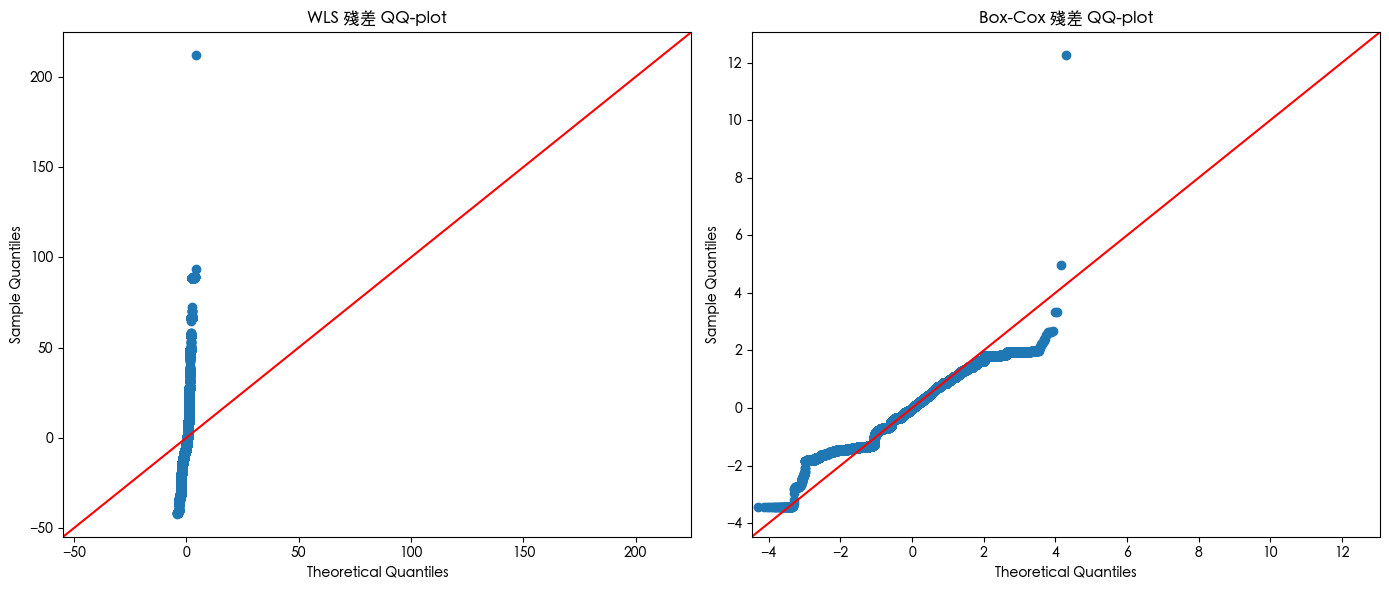

In [1437]:
import statsmodels.api as sm

# ==============================
# Step 5: QQ-plot ÊÆòÂ∑ÆÂ∏∏ÊÖãÊÄßÊØîËºÉ
# ==============================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# WLS QQ-plot
sm.qqplot(wls_model.resid, line="45", ax=axes[0])
axes[0].set_title("WLS ÊÆòÂ∑Æ QQ-plot")

# Box-Cox QQ-plot
sm.qqplot(bc_model.resid, line="45", ax=axes[1])
axes[1].set_title("Box-Cox ÊÆòÂ∑Æ QQ-plot")

plt.tight_layout()
plt.show()


## <font color = 'jade'>**Êçå„ÄÅÂª∫Á´ãÊ®πÊ®°ÂûãXGBClassifier**</font>

In [1]:
import numpy as np
import pandas as pd
import math 
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
print(os.getcwd())
from scipy import stats
from scipy.stats import chi2_contingency #Âç°ÊñπÊ™¢ÂÆö & Crames'v
import statistics
from IPython.display import display  #Âú®jupyter notebook ‰ΩøÁî®È†êË¶ΩÁï´Èù¢
import sklearn
print(sklearn.__version__)
#Â¶ÇÊûúÂè™Êúâ 0.19 Ë®òÂæóË¶ÅÊõ¥Êñ∞Ëá≥ ÊúÄÊñ∞ÁâàÊú¨
%matplotlib inline
# ÁâπÂæµÈÅ∏ÂèñÊúÉÁî®Âà∞ÁöÑÂáΩÊï∏
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing

import pingouin as pg  # ANOVA ÂñÆÂõ†Â≠êÂèäËÆäÊï∏È°ØËëóÊÄßÂàÜÊûê (https://pingouin-stats.org/build/html/index.html)
import researchpy      #Cram√©r's VÔºàÂÖãÊãâÊ¢ÖV‰øÇÊï∏Ôºâ
plt.rcParams['font.family'] = 'Microsoft JhengHei' #È°ØÁ§∫‰∏≠ÊñáÂ≠ó(Windows)
#plt.rcParams['font.family'] = 'Heiti TC' #È°ØÁ§∫‰∏≠ÊñáÂ≠ó(Mac OS)


D:\Python3.9
1.5.1


In [2]:
final_datav3_2 = pd.read_excel(r'D:\Êï∏ÊìöÂàÜÊûêÁßë\ÊØèÊúàÂàÜÊûêÂ†±Âëä\202508\final_datav3_2.xlsx')
final_datav3_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117579 entries, 0 to 117578
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Ê∂àË≤ªË™™Êòé_WBBL           117577 non-null  object        
 1   Ê∂àË≤ªÊó•Êúü_WBBL           117579 non-null  datetime64[ns]
 2   ÊòüÊúüÂπæ                 117579 non-null  object        
 3   Ê∂àË≤ªÂ∫èËôü                117579 non-null  int64         
 4   Â∏≥ÂñÆÊúà‰ªΩ_WBBL           117579 non-null  int64         
 5   ‰ø°Áî®Âç°Ëôü                117579 non-null  int64         
 6   ÂÆ¢Êà∂Á∑®Ëôü                117579 non-null  object        
 7   Âπ¥ÈΩ°Áæ§ÁµÑ                117579 non-null  object        
 8   Âπ¥ÈΩ°                  117579 non-null  int64         
 9   Gender              117579 non-null  object        
 10  ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±            117579 non-null  object        
 11  Ë™çÂàóÊ•≠Á∏æÂàÜË°åÂêçÁ®±            117579 non-null  object  

In [3]:
final_datav3_2_sorted = final_datav3_2.sort_values(by = ['ÂÆ¢Êà∂Á∑®Ëôü','Ê∂àË≤ªÊó•Êúü_WBBL'],ascending = [True,True])

In [4]:
final_datav3_2_sorted['Ê∂àË≤ªÂ∫èËôü'] = final_datav3_2_sorted['Ê∂àË≤ªÂ∫èËôü'].astype(str).str.zfill(5)

In [6]:
final_datav3_2_sorted.head()

Ê∂àË≤ªË™™Êòé_WBBL  Ê∂àË≤ªÊó•Êúü_WBBL  ÊòüÊúüÂπæ   Ê∂àË≤ªÂ∫èËôü  Â∏≥ÂñÆÊúà‰ªΩ_WBBL              ‰ø°Áî®Âç°Ëôü  \
0  ‰∏≠Ê≤π‚ÄìÊñ∞Â∫óÂåóÊñ∞Ë∑ØÁ´ôÔºàÔº§ÔºíÔºëÔºï 2024-07-04  ÊòüÊúüÂõõ  00011     202407  5239809000653110   
1        ÈùúÊÄùÊõ∏ËªíÊñ∞Â∫óÔºëÂ∫ó 2024-07-04  ÊòüÊúüÂõõ  00012     202407  5239809000653110   
2     ÂæóÊÅ©Â†ÇÁúºÈè°‚ÄìÊñ∞Â∫óÂåóÊñ∞Â∫ó 2024-07-05  ÊòüÊúü‰∫î  00013     202407  5239809000653110   
3  APPLE.COM/BILL 2024-07-06  ÊòüÊúüÂÖ≠  00014     202407  5239809000653110   
4  ‰∏≠Ê≤π‚ÄìÊñ∞Â∫óÂåóÊñ∞Ë∑ØÁ´ôÔºàÔº§ÔºíÔºëÔºï 2024-07-23  ÊòüÊúü‰∫å  00006     202408  5239809000653110   

            ÂÆ¢Êà∂Á∑®Ëôü    Âπ¥ÈΩ°Áæ§ÁµÑ  Âπ¥ÈΩ° Gender  ... Âç°ÁâáÂºµÊï∏   Âπ£Âà• Âà∑Âç°Á≠ÜÊï∏      Âà∑Âç°ÈáëÈ°ç Â§ñÂπ£Ê∂àË≤ªÈáëÈ°ç  \
0  A100612823-00  66-75Ê≠≤  73      M  ...    1  TWD    1 -0.058637      0   
1  A100612823-00  66-75Ê≠≤  73      M  ...    1  TWD    1  0.074508      0   
2  A100612823-00  66-75Ê≠≤  73      M  ...    1  TWD    1  0.803809      0   
3  A100612823-00  66-75Ê≠≤  73      M  ...    1  TWD    1 -0.234513     30   
4  A100612823-00  66-75Ê≠≤  73      M  ...    1  TWD    1 -0.079742      0   

  ÊâãÁ∫åË≤ªÊî∂ÂÖ•  Ë≤¢ÁçªÂ∫¶      Âç°ÁâáÈ°çÂ∫¶ Ââç‰∏ÄÁáüÊ•≠Êó•Êú¨ÊúüÂ∏≥ÂñÆÂ∑≤Áπ≥ÈáëÈ°ç     Êú™Âá∫Â∏≥ÈáëÈ°ç  
0     0 -541 -0.010132     -0.363943 -0.073036  
1     0 -541 -0.010132     -0.363943 -0.073036  
2     0 -541 -0.010132     -0.363943 -0.073036  
3     0 -541 -0.010132     -0.363943 -0.073036  
4     0 -541 -0.010132     -0.363943 -0.073036  

[5 rows x 49 columns]

In [ ]:
sample = final_datav3_2_sorted[(final_datav3_2_sorted['ÂÆ¢Êà∂Á∑®Ëôü']=='Y220521208-00')]
# & (final_datav3_2_sorted['Ê∂àË≤ªÊó•Êúü_WBBL']=='2024-07-4')

final_datav3_2_sorted[['ÂÆ¢Êà∂Á∑®Ëôü','Â∏≥ÂñÆÊúà‰ªΩ_WBBL']]

In [7]:
final_datav3_2_sorted.groupby(['ÂÆ¢Êà∂Á∑®Ëôü','Â∏≥ÂñÆÊúà‰ªΩ_WBBL'])['Âà∑Âç°Á≠ÜÊï∏'].count().reset_index()

ÂÆ¢Êà∂Á∑®Ëôü  Â∏≥ÂñÆÊúà‰ªΩ_WBBL  Âà∑Âç°Á≠ÜÊï∏
0      A100612823-00     202407     4
1      A100612823-00     202408     5
2      A100612823-00     202409     3
3      A100612823-00     202410     5
4      A100612823-00     202411     8
...              ...        ...   ...
14871  Y220515335-00     202504     2
14872  Y220515335-00     202505     2
14873  Y220515335-00     202506     2
14874  Y220521208-00     202506     8
14875  Y220521208-00     202507    15

[14876 rows x 3 columns]

In [5]:
total_row = len(final_datav3_2_sorted)

# ÊåâÊØî‰æãÂàáÂàÜ
train_ratio = 0.75
valid_ratio = 0.15
test_ratio = 0.10

train_set = int(total_row * train_ratio)
valid_set = int(total_row * (train_ratio+valid_ratio))

test_set = int(total_row*test_ratio)
print(train_set)
print(valid_set)
print(test_set)
print(train_set+(valid_set-train_set+1)+test_set)

88184
105821
11757
117579


In [6]:
### ÊôÇÈñìÂ∫èÂàóË≥áÊñôÊ≠£Á¢∫ÂàáÂâ≤ÊñπÂºè
train_data = final_datav3_2_sorted[:train_set]
valid_data = final_datav3_2_sorted[train_set:valid_set]
test_data  = final_datav3_2_sorted[valid_set:]
print('Ë®ìÁ∑¥ÈõÜË≥áÊñô:',len(train_data))
print('È©óË≠âÈõÜË≥áÊñô:',len(valid_data))
print('Ê∏¨Ë©¶ÈõÜË≥áÊñô:',len(test_data))


Ë®ìÁ∑¥ÈõÜË≥áÊñô: 88184
È©óË≠âÈõÜË≥áÊñô: 17637
Ê∏¨Ë©¶ÈõÜË≥áÊñô: 11758


In [7]:
X_train_data = train_data.drop(columns = 'Âà∑Âç°Á≠ÜÊï∏')
X_valid_data = valid_data.drop(columns = 'Âà∑Âç°Á≠ÜÊï∏')
X_test_data = test_data.drop(columns = 'Âà∑Âç°Á≠ÜÊï∏')
y_train_data = train_data['Âà∑Âç°Á≠ÜÊï∏']
y_valid_data = valid_data['Âà∑Âç°Á≠ÜÊï∏']
y_test_data = test_data['Âà∑Âç°Á≠ÜÊï∏']

In [8]:

print(X_train_data.shape)
print(y_train_data.shape)
print(X_valid_data.shape)
print(y_valid_data.shape)
print(X_test_data.shape)
print(y_test_data.shape)

print('\n',X_train_data.shape[1])
print('\n',y_train_data.head())

(88184, 48)
(88184,)
(17637, 48)
(17637,)
(11758, 48)
(11758,)

 48

 0    1
1    1
2    1
3    1
4    1
Name: Âà∑Âç°Á≠ÜÊï∏, dtype: int64


In [9]:
import sklearn
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost.callback import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,log_loss

In [19]:
#ËôïÁêÜÈ°ûÂà•ËÆäÊï∏ LabelEncoder

from sklearn.preprocessing import LabelEncoder

X_train_encoded = X_train_data.copy()
X_valid_encoded = X_valid_data.copy()
X_test_encoded = X_test_data.copy()

# Â∞çÊØèÂÄã object Ê¨Ñ‰ΩçÂÅöÁ∑®Á¢º
object_cols = X_train_data.select_dtypes(include='object').columns

for col in object_cols:
    le = LabelEncoder()

# Âêà‰ΩµÊâÄÊúâÂèØËÉΩÁöÑÂÄº
all_values = pd.concat([
X_train_data[col],
X_valid_data[col],
X_test_data[col]
]).astype(str)

le.fit(all_values)
# ËΩâÊèõ
X_train_encoded[col] = le.transform(X_train_data[col].astype(str))
X_valid_encoded[col] = le.transform(X_valid_data[col].astype(str))
X_test_encoded[col] = le.transform(X_test_data[col].astype(str))


print('Á∑®Á¢ºÂÆåÊàêÔºÅ')


Á∑®Á¢ºÂÆåÊàêÔºÅ


In [35]:
X_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88184 entries, 0 to 88183
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Ê∂àË≤ªË™™Êòé_WBBL           88182 non-null  object        
 1   Ê∂àË≤ªÊó•Êúü_WBBL           88184 non-null  datetime64[ns]
 2   ÊòüÊúüÂπæ                 88184 non-null  object        
 3   Ê∂àË≤ªÂ∫èËôü                88184 non-null  object        
 4   Â∏≥ÂñÆÊúà‰ªΩ_WBBL           88184 non-null  int64         
 5   ‰ø°Áî®Âç°Ëôü                88184 non-null  int64         
 6   ÂÆ¢Êà∂Á∑®Ëôü                88184 non-null  object        
 7   Âπ¥ÈΩ°Áæ§ÁµÑ                88184 non-null  object        
 8   Âπ¥ÈΩ°                  88184 non-null  int64         
 9   Gender              88184 non-null  object        
 10  ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±            88184 non-null  object        
 11  Ë™çÂàóÊ•≠Á∏æÂàÜË°åÂêçÁ®±            88184 non-null  object        
 12  Ê∂àË

In [32]:
X_train_encoded.

Ê∂àË≤ªË™™Êòé_WBBL  Ê∂àË≤ªÊó•Êúü_WBBL  ÊòüÊúüÂπæ   Ê∂àË≤ªÂ∫èËôü  Â∏≥ÂñÆÊúà‰ªΩ_WBBL              ‰ø°Áî®Âç°Ëôü  \
0      ‰∏≠Ê≤π‚ÄìÊñ∞Â∫óÂåóÊñ∞Ë∑ØÁ´ôÔºàÔº§ÔºíÔºëÔºï 2024-07-04  ÊòüÊúüÂõõ  00011     202407  5239809000653110   
1            ÈùúÊÄùÊõ∏ËªíÊñ∞Â∫óÔºëÂ∫ó 2024-07-04  ÊòüÊúüÂõõ  00012     202407  5239809000653110   
2         ÂæóÊÅ©Â†ÇÁúºÈè°‚ÄìÊñ∞Â∫óÂåóÊñ∞Â∫ó 2024-07-05  ÊòüÊúü‰∫î  00013     202407  5239809000653110   
3      APPLE.COM/BILL 2024-07-06  ÊòüÊúüÂÖ≠  00014     202407  5239809000653110   
4      ‰∏≠Ê≤π‚ÄìÊñ∞Â∫óÂåóÊñ∞Ë∑ØÁ´ôÔºàÔº§ÔºíÔºëÔºï 2024-07-23  ÊòüÊúü‰∫å  00006     202408  5239809000653110   
...               ...        ...  ...    ...        ...               ...   
88179  APPLE.COM/BILL 2024-07-05  ÊòüÊúü‰∫î  00011     202407  5239800001915100   
88180  APPLE.COM/BILL 2024-07-19  ÊòüÊúü‰∫î  00009     202408  5239800001915100   
88181  APPLE.COM/BILL 2024-08-05  ÊòüÊúü‰∏Ä  00010     202408  5239800001915100   
88182        ‰∫ûÊüèÂÖ´Âç¶ÂØÆÂä†Ê≤πÁ´ô 2024-08-15  ÊòüÊúüÂõõ  00008     202409  5239800001915100   
88183        ‰∫ûÊüèÂÖ´Âç¶ÂØÆÂä†Ê≤πÁ´ô 2024-08-18  ÊòüÊúüÊó•  00009     202409  5239800001915100   

                ÂÆ¢Êà∂Á∑®Ëôü    Âπ¥ÈΩ°Áæ§ÁµÑ  Âπ¥ÈΩ° Gender  ... ÂÆ¢Êà∂Êï∏ Âç°ÁâáÂºµÊï∏ Âπ£Âà•      Âà∑Âç°ÈáëÈ°ç Â§ñÂπ£Ê∂àË≤ªÈáëÈ°ç  \
0      A100612823-00  66-75Ê≠≤  73      M  ...   1    1  7 -0.058637      0   
1      A100612823-00  66-75Ê≠≤  73      M  ...   1    1  7  0.074508      0   
2      A100612823-00  66-75Ê≠≤  73      M  ...   1    1  7  0.803809      0   
3      A100612823-00  66-75Ê≠≤  73      M  ...   1    1  7 -0.234513     30   
4      A100612823-00  66-75Ê≠≤  73      M  ...   1    1  7 -0.079742      0   
...              ...     ...  ..    ...  ...  ..  ... ..       ...    ...   
88179  S121528876-00  56-65Ê≠≤  57      M  ...   1    1  7 -0.234513     30   
88180  S121528876-00  56-65Ê≠≤  57      M  ...   1    1  7 -0.227999     80   
88181  S121528876-00  56-65Ê≠≤  57      M  ...   1    1  7 -0.234513     30   
88182  S121528876-00  56-65Ê≠≤  57      M  ...   1    1  7 -0.035317      0   
88183  S121528876-00  56-65Ê≠≤  57      M  ...   1    1  7 -0.043003      0   

      ÊâãÁ∫åË≤ªÊî∂ÂÖ•  Ë≤¢ÁçªÂ∫¶      Âç°ÁâáÈ°çÂ∫¶ Ââç‰∏ÄÁáüÊ•≠Êó•Êú¨ÊúüÂ∏≥ÂñÆÂ∑≤Áπ≥ÈáëÈ°ç     Êú™Âá∫Â∏≥ÈáëÈ°ç  
0         0 -541 -0.010132     -0.363943 -0.073036  
1         0 -541 -0.010132     -0.363943 -0.073036  
2         0 -541 -0.010132     -0.363943 -0.073036  
3         0 -541 -0.010132     -0.363943 -0.073036  
4         0 -541 -0.010132     -0.363943 -0.073036  
...     ...  ...       ...           ...       ...  
88179     0  105  0.310188     -0.363943 -0.388962  
88180     0  105  0.310188     -0.363943 -0.388962  
88181     0  105  0.310188     -0.363943 -0.388962  
88182     0  105  0.310188     -0.363943 -0.388962  
88183     0  105  0.310188     -0.363943 -0.388962  

[88184 rows x 48 columns]

In [24]:
# ËΩâÊèõ
for col in object_cols:
    le = LabelEncoder()

In [25]:
# Âª∫Á´ãÊ®πÂõûÊ≠∏Ê®°Âûã
xgb_regressor_model = XGBRegressor(max_depth = 3,
                                   learning_rate = 0.05,    #learning_rate
                                   n_estimators = 300,
                                   subsample = 0.5,
                                   colsample_bytree = 0.5,
                                   reg_alpha = 50,
                                   reg_lambda = 0,
                                   verbose = False,   # ‰∏çÈ†àËº∏Âá∫Ë≥áË®ä
                                   eval_metric = 'rmse',
                                   random_state = 42,
                                   n_jobs = -1
                                    )

In [27]:
xgb_regressor_model

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.5, eta=0.05,
             eval_metric='rmse', gamma=None, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=3,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=-1, num_parallel_tree=None,
             random_state=42, reg_alpha=50, reg_lambda=0, scale_pos_weight=None,
             subsample=0.5, tree_method=None, validate_parameters=None,
             verbose=False, verbosity=None)

In [38]:
!pip uninstall xgboost -y
!pip install xgboost==2.0.3

Found existing installation: xgboost 3.0.5
Uninstalling xgboost-3.0.5:
  Successfully uninstalled xgboost-3.0.5


You can safely remove it manually.


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
     - -------------------------------------- 4.7/99.8 MB 23.7 MB/s eta 0:00:05
     --- ------------------------------------ 7.6/99.8 MB 19.6 MB/s eta 0:00:05
     ---- ---------------------------------- 10.5/99.8 MB 17.2 MB/s eta 0:00:06
     ----- --------------------------------- 13.6/99.8 MB 16.4 MB/s eta 0:00:06
     ------ -------------------------------- 16.5/99.8 MB 16.0 MB/s eta 0:00:06
     ------- ------------------------------- 19.4/99.8 MB 15.7 MB/s eta 0:00:06
     -------- ------------------------------ 22.3/99.8 MB 15.3 MB/s eta 0:00:06
     --------- ----------------------------- 25.2/99.8 MB 15.3 MB/s eta 0:00:05
     ---------- ---------------------------- 28.0/99.8 MB 15.1 MB/s eta 0:00:05
     ----------- --------------------------- 30.7/99.8 MB 14.9 MB/s eta 0:00:05
     ------------- ------------------------- 33.6/99.8 MB 14.8 MB/s

In [12]:
print(xgb.__version__)
print('EarlyStoppingÂ≠òÂú®',hasattr(xgb.callback,'EarlyStopping'))
print('ÂèØÁî®ÁöÑcallbacks:',dir(xgb.callback))

2.0.3
EarlyStoppingÂ≠òÂú® True
ÂèØÁî®ÁöÑcallbacks: ['ABC', 'Any', 'Booster', 'Callable', 'CallbackContainer', 'DMatrix', 'Dict', 'EarlyStopping', 'EvaluationMonitor', 'LearningRateScheduler', 'List', 'Optional', 'Sequence', 'TrainingCallback', 'TrainingCheckPoint', 'Tuple', 'TypeVar', 'Union', 'XGBoostError', '_ART', '_Model', '_Score', '_ScoreList', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_aggcv', '_allreduce_metric', '_parse_eval_str', 'cast', 'collections', 'collective', 'numpy', 'os', 'pickle']


In [30]:
# Ê®°ÂûãË®ìÁ∑¥ ‰∏¶Áî®È©óË≠âÈõÜÁõ£Êéß
xgb_regressor_model.fit(X_train_encoded, y_train_data,
                        eval_set = [(X_valid_encoded,y_valid_data)],
                        #early_stopping_rounds = 50,
                        callbacks = [EarlyStopping(rounds = 50,save_best = True)],
                        verbose = True)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Ê∂àË≤ªË™™Êòé_WBBL: object, Ê∂àË≤ªÊó•Êúü_WBBL: datetime64[ns], ÊòüÊúüÂπæ: object, Ê∂àË≤ªÂ∫èËôü: object, ÂÆ¢Êà∂Á∑®Ëôü: object, Âπ¥ÈΩ°Áæ§ÁµÑ: object, Gender: object, ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±: object, Ë™çÂàóÊ•≠Á∏æÂàÜË°åÂêçÁ®±: object, Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±: object, ÂúãÂÖßÂ§ñÁµêÂ∏≥Âú∞Èªû: object, ÊòØÂê¶ÁÇ∫ÊúâÊïàÂç°: object, ÈñãÂç°ÁãÄÊÖã: object, ‰ø°Áî®Âç°Á≠âÁ¥ö: object, Ê≠£ÂâØÂç°È°ûÂà•: object, Prod Name M: object, ‰ø°Áî®Âç°È°ûÂà•: object, ÂÄã‰∫∫Ë©ïÁ≠â: object, ÂÆ¢Êà∂È¢®Èö™Á≠âÁ¥ö: object, ‰øùÈö™Ê•≠ÂãôË®ªË®ò: object, ‰ø°Áî®Âç°Ê•≠ÂãôË®ªË®ò: object, ‰ø°Ë®óÊ•≠ÂãôË®ªË®ò: object, Â§ñÂåØÊ•≠ÂãôË®ªË®ò: object, Â≠òÂåØÊ•≠ÂãôË®ªË®ò: object, ÂÆ¢Êà∂Áî≥Ë´ãÂÄãË≥áÂÅúÊ≠¢ËíêÈõÜ„ÄÅËôïÁêÜ„ÄÅÂà©Áî®Ë®ªË®ò: object, ÊâÄÊúâÊ•≠ÂãôÁÑ°ÂæÄ‰æÜË®ªË®ò: object, ÊäïË≥áÁêÜË≤°Ê•≠ÂãôË®ªË®ò: object, Êéà‰ø°Ê•≠ÂãôË®ªË®ò: object, ÊòØÂê¶ÈÄ≤Ë°åkycË®ªË®ò: object, Ë°åÂì°Ë®ªË®ò: object, Ëñ™ËΩâÊà∂Ë®ªË®ò: object, ÈªëÂêçÂñÆË®ªË®ò: object, Ë≠¶Á§∫Êà∂Ë®ªË®ò: object, Ë≤°ÁÆ°ÂÆ¢Êà∂Ë®ªË®ò: object

In [17]:
import xgboost as xgb
print(xgb.__file__)
print(xgb.__version__)

C:\Users\b003087\AppData\Local\anaconda3\Lib\site-packages\xgboost\__init__.py
2.0.3


In [43]:
# ========== Ê≠•È©ü 1ÔºöÊ™¢Êü•ÂéüÂßãË≥áÊñô ==========
print('===== X_train_data ÂéüÂßãË≥áÊñôÂûãÊÖã =====')
print(X_train_data.dtypes)
print(f'\nÁ∏ΩÂÖ± {len(X_train_data.columns)} ÂÄãÊ¨Ñ‰Ωç')

# ÊâæÂá∫ÊâÄÊúâ object Ê¨Ñ‰Ωç
object_cols = X_train_data.select_dtypes(include='object').columns
print(f'\nÊúâ {len(object_cols)} ÂÄã object Ê¨Ñ‰Ωç:')
print(object_cols.tolist())

# ========== Ê≠•È©ü 2ÔºöË§áË£ΩË≥áÊñôÔºàÈáçË¶ÅÔºÅÔºâ==========
X_train_encoded = X_train_data.copy()
X_valid_encoded = X_valid_data.copy()
X_test_encoded = X_test_data.copy()

print('\nÈñãÂßãÁ∑®Á¢º...')

# ========== Ê≠•È©ü 3ÔºöÂ∞çÊØèÂÄã object Ê¨Ñ‰ΩçÁ∑®Á¢º ==========
for i, col in enumerate(object_cols, 1):
    print(f'[{i}/{len(object_cols)}] ËôïÁêÜÊ¨Ñ‰Ωç: {col}')

try:
    le = LabelEncoder()

# Âêà‰ΩµÊâÄÊúâÂÄº
    all_values = pd.concat([
X_train_data[col],
X_valid_data[col],
X_test_data[col]
]).astype(str)

# Ë®ìÁ∑¥ LabelEncoder
    le.fit(all_values)

# ËΩâÊèõ‰∏âÂÄãË≥áÊñôÈõÜ
    X_train_encoded[col] = le.transform(X_train_data[col].astype(str))
    X_valid_encoded[col] = le.transform(X_valid_data[col].astype(str))
    X_test_encoded[col] = le.transform(X_test_data[col].astype(str))

    print(f' ‚úì ÊàêÂäüÁ∑®Á¢º: {col}')

except Exception as e:
    print(f' ‚úó Á∑®Á¢ºÂ§±Êïó: {col}, ÈåØË™§: {e}')

    print('\nÁ∑®Á¢ºÂÆåÊàêÔºÅ')

===== X_train_data ÂéüÂßãË≥áÊñôÂûãÊÖã =====
Ê∂àË≤ªË™™Êòé_WBBL                     object
Ê∂àË≤ªÊó•Êúü_WBBL             datetime64[ns]
ÊòüÊúüÂπæ                           object
Ê∂àË≤ªÂ∫èËôü                          object
Â∏≥ÂñÆÊúà‰ªΩ_WBBL                      int64
‰ø°Áî®Âç°Ëôü                           int64
ÂÆ¢Êà∂Á∑®Ëôü                          object
Âπ¥ÈΩ°Áæ§ÁµÑ                          object
Âπ¥ÈΩ°                             int64
Gender                        object
ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±                      object
Ë™çÂàóÊ•≠Á∏æÂàÜË°åÂêçÁ®±                      object
Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±                      object
ÂúãÂÖßÂ§ñÁµêÂ∏≥Âú∞Èªû                       object
ÊòØÂê¶ÁÇ∫ÊúâÊïàÂç°                        object
ÈñãÂç°ÁãÄÊÖã                          object
Âç°ÁâáÁãÄÊÖã                           int64
‰ø°Áî®Âç°Á≠âÁ¥ö                         object
Ê≠£ÂâØÂç°È°ûÂà•                         object
Prod Name M                   object
‰ø°Áî®Âç°È°ûÂà•                         

In [44]:

# ========== Ê≠•È©ü 4ÔºöÊ™¢Êü•Á∑®Á¢ºÂæåÁöÑË≥áÊñô ==========
print('\n===== X_train_encoded Á∑®Á¢ºÂæåË≥áÊñôÂûãÊÖã =====')
print(X_train_encoded.dtypes)

# Ê™¢Êü•ÊòØÂê¶ÈÇÑÊúâ object Ê¨Ñ‰Ωç
remaining_objects = X_train_encoded.select_dtypes(include='object').columns
if len(remaining_objects) > 0:
    print(f'\n‚ö†Ô∏è Ë≠¶ÂëäÔºöÈÇÑÊúâ {len(remaining_objects)} ÂÄã object Ê¨Ñ‰Ωç:')
    print(remaining_objects.tolist())
else:
    print('\n‚úÖ ÊâÄÊúâ object Ê¨Ñ‰ΩçÈÉΩÂ∑≤Á∑®Á¢ºÔºÅ')

# ========== Ê≠•È©ü 5ÔºöË®ìÁ∑¥Ê®°ÂûãÔºàÁî®Á∑®Á¢ºÂæåÁöÑË≥áÊñôÔºâ==========
print('\nÈñãÂßãË®ìÁ∑¥Ê®°Âûã...')

model = xgb.XGBRegressor(
max_depth=3,
learning_rate=0.05,
n_estimators=500,
random_state=42
)

# ‚≠ê ÈáçÈªûÔºö‰ΩøÁî® X_train_encodedÔºàÁ∑®Á¢ºÂæåÁöÑË≥áÊñôÔºâ
model.fit(
X_train_encoded, y_train_data, # ‚Üê ÈÄôË£°ÔºÅ
eval_set=[(X_valid_encoded, y_valid_data)], # ‚Üê ÈÄôË£°ÔºÅ
callbacks=[xgb.callback.EarlyStopping(rounds=50, save_best=True)],
verbose=True
)

print('\nË®ìÁ∑¥ÂÆåÊàêÔºÅ')
print(f'ÊúÄ‰Ω≥Ëø≠‰ª£Êï∏: {model.best_iteration}')
print(f'ÊúÄ‰Ω≥È©óË≠âÂàÜÊï∏: {model.best_score}')


===== X_train_encoded Á∑®Á¢ºÂæåË≥áÊñôÂûãÊÖã =====
Ê∂àË≤ªË™™Êòé_WBBL                     object
Ê∂àË≤ªÊó•Êúü_WBBL             datetime64[ns]
ÊòüÊúüÂπæ                           object
Ê∂àË≤ªÂ∫èËôü                          object
Â∏≥ÂñÆÊúà‰ªΩ_WBBL                      int64
‰ø°Áî®Âç°Ëôü                           int64
ÂÆ¢Êà∂Á∑®Ëôü                          object
Âπ¥ÈΩ°Áæ§ÁµÑ                          object
Âπ¥ÈΩ°                             int64
Gender                        object
ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±                      object
Ë™çÂàóÊ•≠Á∏æÂàÜË°åÂêçÁ®±                      object
Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±                      object
ÂúãÂÖßÂ§ñÁµêÂ∏≥Âú∞Èªû                       object
ÊòØÂê¶ÁÇ∫ÊúâÊïàÂç°                        object
ÈñãÂç°ÁãÄÊÖã                          object
Âç°ÁâáÁãÄÊÖã                           int64
‰ø°Áî®Âç°Á≠âÁ¥ö                         object
Ê≠£ÂâØÂç°È°ûÂà•                         object
Prod Name M                   object
‰ø°Áî®Âç°È°ûÂà•                  

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Ê∂àË≤ªË™™Êòé_WBBL: object, Ê∂àË≤ªÊó•Êúü_WBBL: datetime64[ns], ÊòüÊúüÂπæ: object, Ê∂àË≤ªÂ∫èËôü: object, ÂÆ¢Êà∂Á∑®Ëôü: object, Âπ¥ÈΩ°Áæ§ÁµÑ: object, Gender: object, ÂÆ¢Êà∂Ê≠∏Â±¨ÂàÜË°åÂêçÁ®±: object, Ë™çÂàóÊ•≠Á∏æÂàÜË°åÂêçÁ®±: object, Ê∂àË≤ªÁî¢ÂìÅÂú∞ÈªûÂêçÁ®±: object, ÂúãÂÖßÂ§ñÁµêÂ∏≥Âú∞Èªû: object, ÊòØÂê¶ÁÇ∫ÊúâÊïàÂç°: object, ÈñãÂç°ÁãÄÊÖã: object, ‰ø°Áî®Âç°Á≠âÁ¥ö: object, Ê≠£ÂâØÂç°È°ûÂà•: object, Prod Name M: object, ‰ø°Áî®Âç°È°ûÂà•: object, ÂÄã‰∫∫Ë©ïÁ≠â: object, ÂÆ¢Êà∂È¢®Èö™Á≠âÁ¥ö: object, ‰øùÈö™Ê•≠ÂãôË®ªË®ò: object, ‰ø°Áî®Âç°Ê•≠ÂãôË®ªË®ò: object, ‰ø°Ë®óÊ•≠ÂãôË®ªË®ò: object, Â§ñÂåØÊ•≠ÂãôË®ªË®ò: object, Â≠òÂåØÊ•≠ÂãôË®ªË®ò: object, ÂÆ¢Êà∂Áî≥Ë´ãÂÄãË≥áÂÅúÊ≠¢ËíêÈõÜ„ÄÅËôïÁêÜ„ÄÅÂà©Áî®Ë®ªË®ò: object, ÊâÄÊúâÊ•≠ÂãôÁÑ°ÂæÄ‰æÜË®ªË®ò: object, ÊäïË≥áÁêÜË≤°Ê•≠ÂãôË®ªË®ò: object, Êéà‰ø°Ê•≠ÂãôË®ªË®ò: object, ÊòØÂê¶ÈÄ≤Ë°åkycË®ªË®ò: object, Ë°åÂì°Ë®ªË®ò: object, Ëñ™ËΩâÊà∂Ë®ªË®ò: object, ÈªëÂêçÂñÆË®ªË®ò: object, Ë≠¶Á§∫Êà∂Ë®ªË®ò: object, Ë≤°ÁÆ°ÂÆ¢Êà∂Ë®ªË®ò: object

In [ ]:

# ========== Ê≠•È©ü 6ÔºöÈ†êÊ∏¨ÂíåË©ï‰º∞ ==========
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = model.predict(X_test_encoded) # ‚Üê Áî®Á∑®Á¢ºÂæåÁöÑË≥áÊñô

print('\n===== Ê∏¨Ë©¶ÈõÜË°®Áèæ =====')
print(f'MSE: {mean_squared_error(y_test_data, y_pred):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_data, y_pred)):.4f}')
print(f'MAE: {mean_absolute_error(y_test_data, y_pred):.4f}')
print(f'R¬≤: {r2_score(y_test_data, y_pred):.4f}')
